## Credit Card Fraud Detection Case Study 
### Submitted By : Archit Srivastava & Sanjana Pentomshetty            
### Submitted On : June 22nd 2020

#### Problem Statement:
For many banks, retaining high profitable customers is the number one business goal. Banking fraud however, poses a significant threat to this goal for different banks. But, with the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways.
The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.
Dataset had 2,84,807 transactions with 30 features out of which 492 transactions are fraudulent.


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
#Loading the dataset
credit_card_df = pd.read_csv('creditcard.csv')
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#observe the different feature type and distributions present in the data
credit_card_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Here we will observe the distribution of our classes

In [3]:
classes=credit_card_df['Class'].value_counts()
normal_share=classes[0]/credit_card_df['Class'].count()*100
fraud_share=classes[1]/credit_card_df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


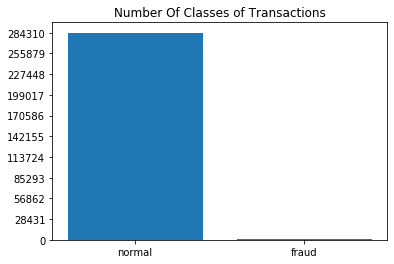

In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
bars = ('normal', 'fraud')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, [classes[0],classes[1]])
plt.title("Number Of Classes of Transactions")
# Create names on the x-axis
plt.xticks(y_pos, bars)
mm = max(classes[0],classes[1])
plt.yticks([i for i in range(0,mm+1,mm//10)]) 
plt.show()


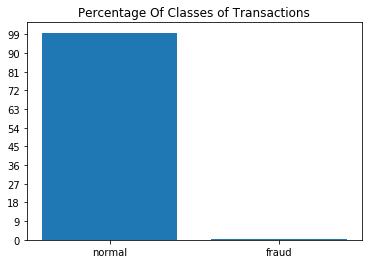

In [6]:
# get the percentage distribution
# Create bars
plt.bar(y_pos, [normal_share,fraud_share])
plt.title("Percentage Of Classes of Transactions")
# Create names on the x-axis
plt.xticks(y_pos, bars)
mm = max(normal_share,fraud_share)
plt.yticks([i for i in range(0,int(mm+0.5),int(mm/10))]) 
plt.show()

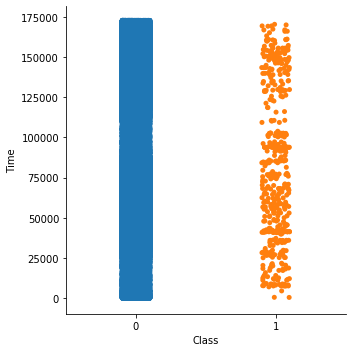

In [7]:
# Create a scatter plot to observe the distribution of classes with time
sns.catplot(data = credit_card_df, x = 'Class', y='Time')

### We can see that transactions are distributed fairly with time

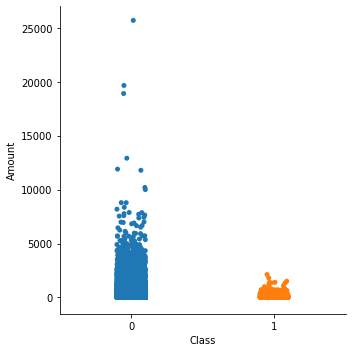

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.catplot(data = credit_card_df, x = 'Class', y='Amount')

### Here also, most of the transactions are small, also for fraudulent transactions, we see not major changes

In [4]:
# Drop unnecessary columns - 'time' as this is based on distance from 1st transaction
# it is not very useful as it is just preserving the cronological order of the transactions.

credit_card_df.drop(columns=['Time'], inplace = True)

### Splitting the data into train & test data

In [5]:
#Seperating class variable as Target
y= credit_card_df.pop('Class')

In [6]:
from sklearn import model_selection
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(credit_card_df ,y, train_size=0.7,test_size=0.3,
                                                                    stratify=y ,random_state=42)

In [7]:
#Normalising the amount column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train['Amount'] = sc.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Amount'] = sc.transform(X_test['Amount'].values.reshape(-1, 1))

C:\Users\Archit.srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Archit.srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
#Checking the distribution of y_train
y_train

249927    0
214082    0
106005    0
58619     0
191638    0
         ..
3441      0
233802    0
85418     0
29062     0
17677     0
Name: Class, Length: 199364, dtype: int64

In [9]:
#Checking the distribution of X_train
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,-0.184399,-0.222719,...,-0.038329,-0.231385,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758,-0.321082
214082,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,-0.318277,0.517022,...,-0.030437,0.281190,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755,0.243475
106005,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,-1.288745,0.086419,...,2.189260,0.346463,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833,4.797594
58619,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,0.128383,...,0.225957,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,-0.331514
191638,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,0.474428,-0.283699,...,0.154309,0.167939,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344,-0.331514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,-0.415022,0.713439,1.221551,-2.108216,0.187067,-1.281616,1.118548,-0.345326,0.463473,-0.999876,...,0.075377,0.132886,0.756938,-0.290888,0.558730,0.037363,-0.871689,0.239482,-0.020422,-0.345305
233802,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,0.212619,...,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,-0.325587
85418,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,...,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,-0.203089
29062,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,...,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,-0.169777


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [10]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

*************
V1
*************


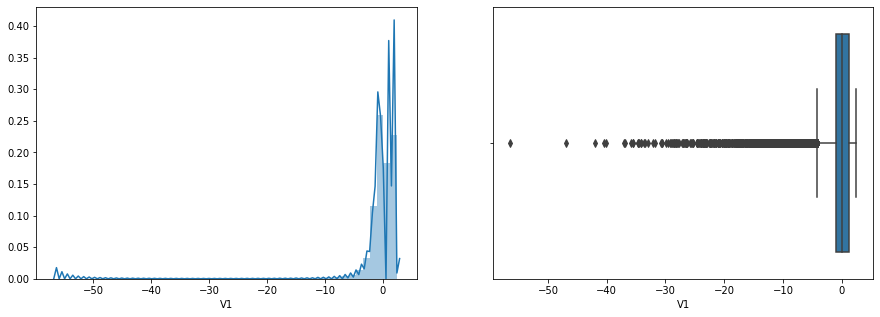

*************
V2
*************


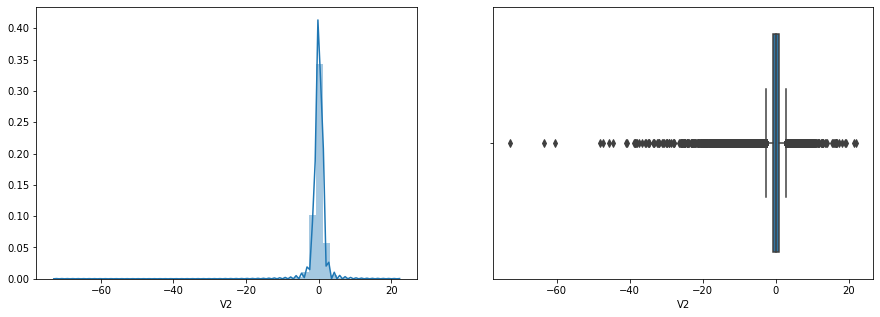

*************
V3
*************


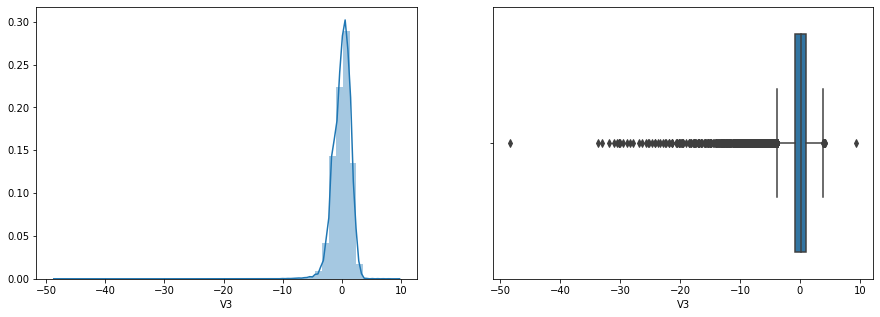

*************
V4
*************


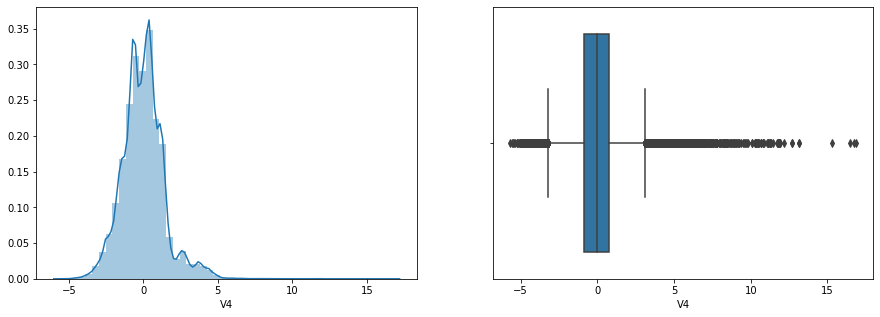

*************
V5
*************


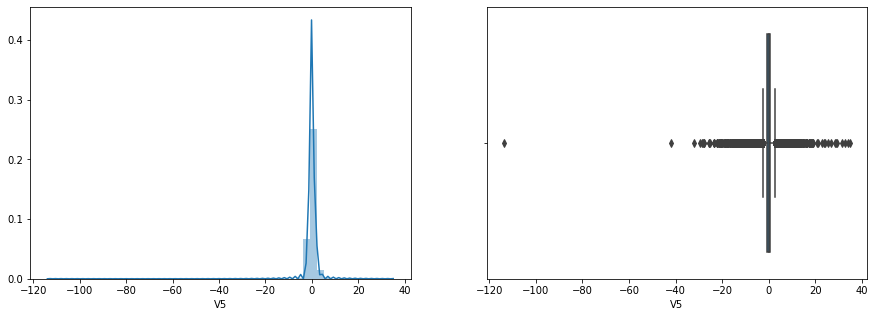

*************
V6
*************


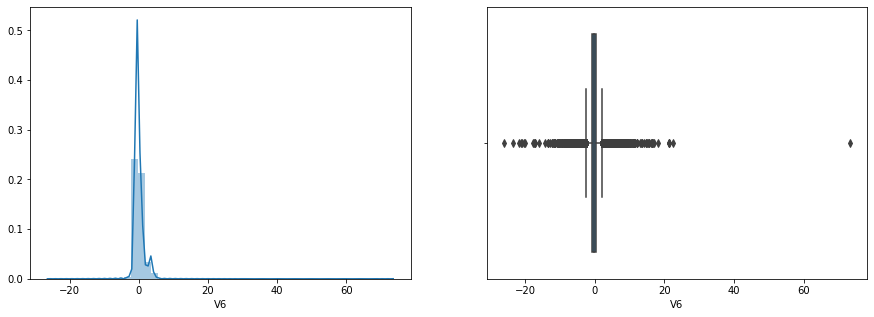

*************
V7
*************


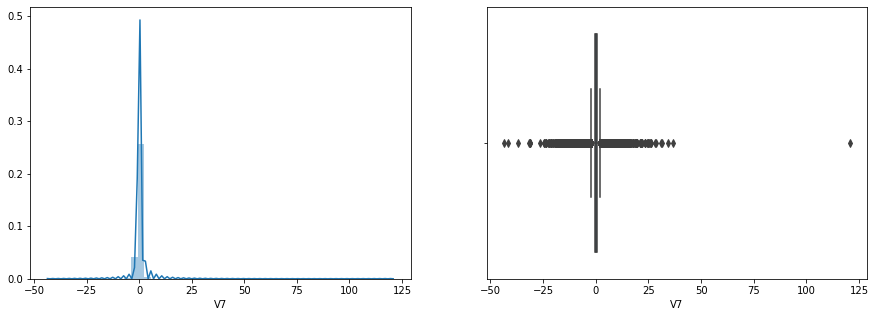

*************
V8
*************


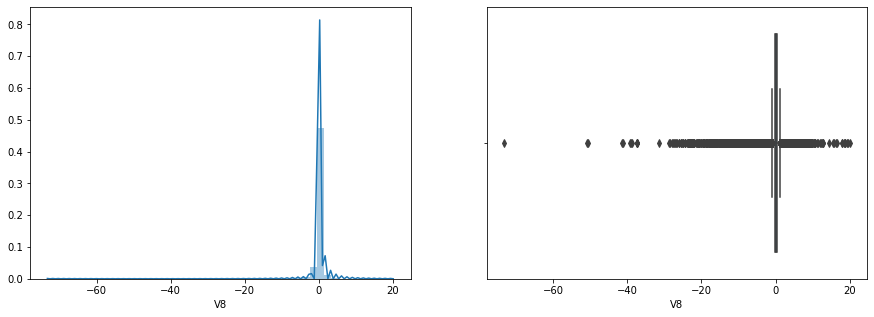

*************
V9
*************


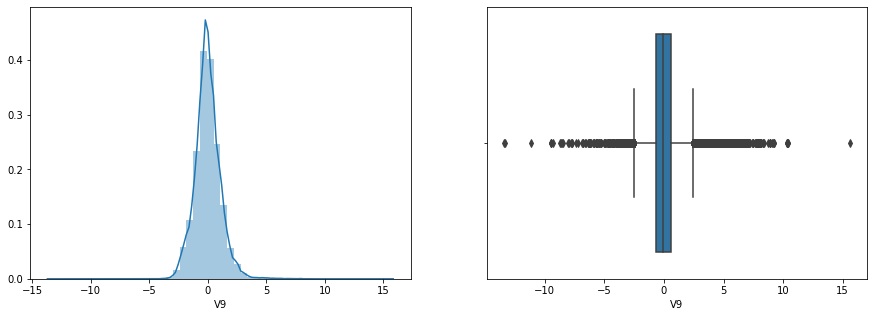

*************
V10
*************


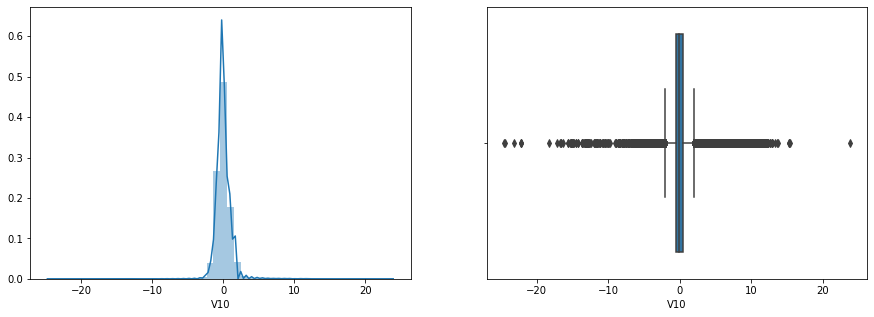

*************
V11
*************


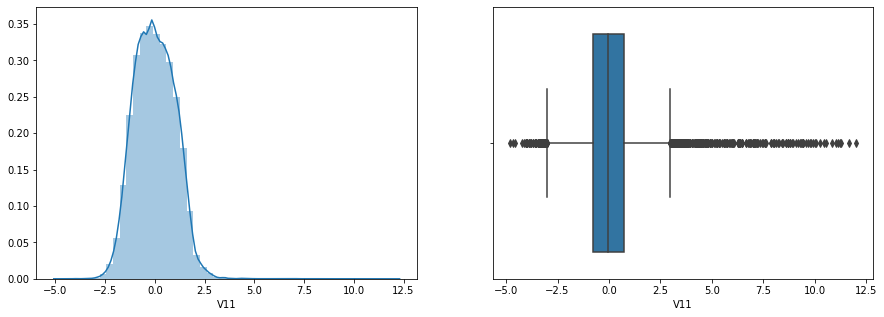

*************
V12
*************


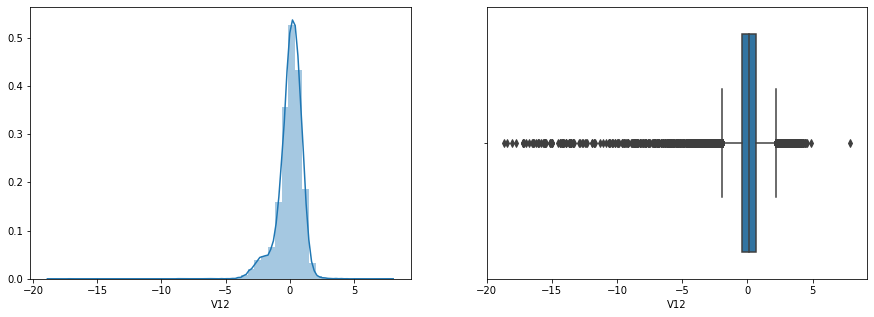

*************
V13
*************


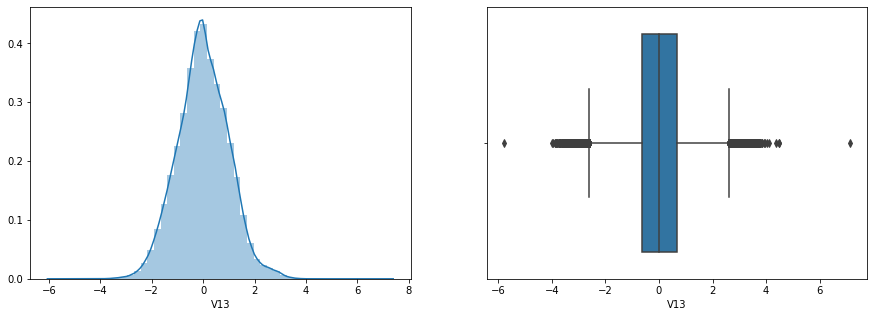

*************
V14
*************


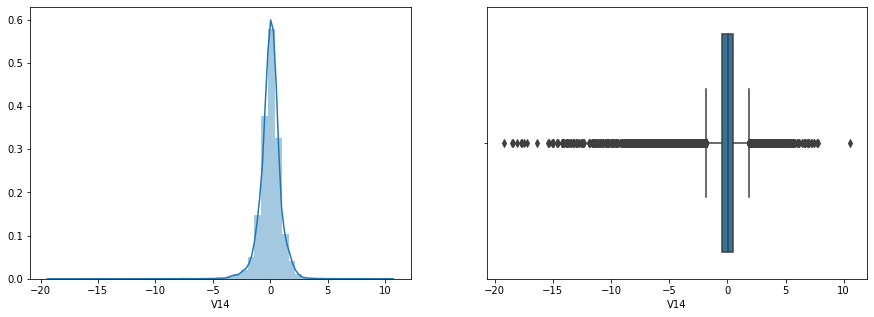

*************
V15
*************


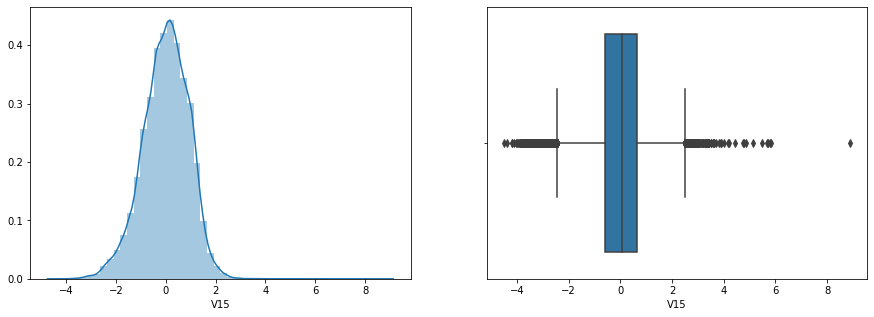

*************
V16
*************


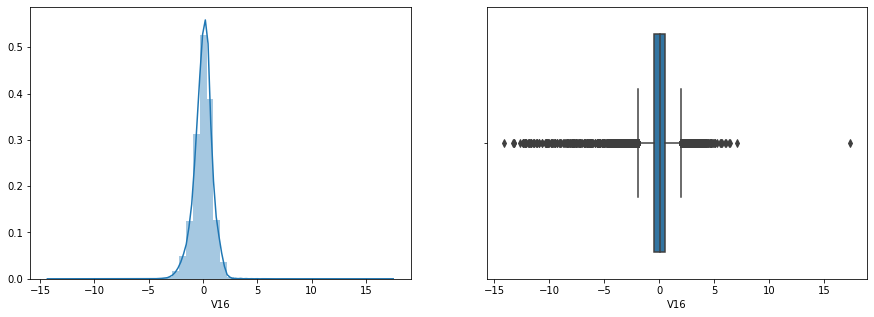

*************
V17
*************


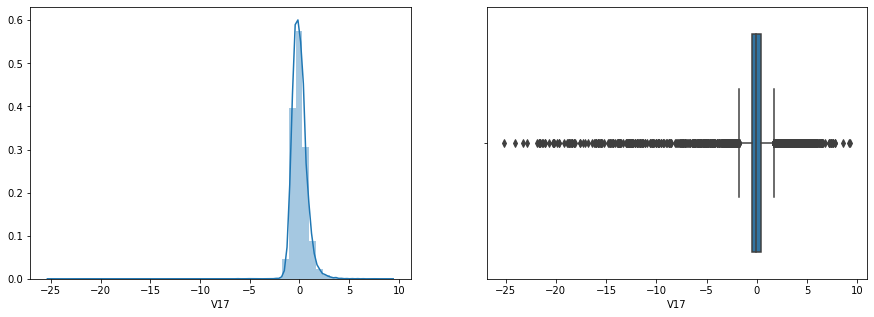

*************
V18
*************


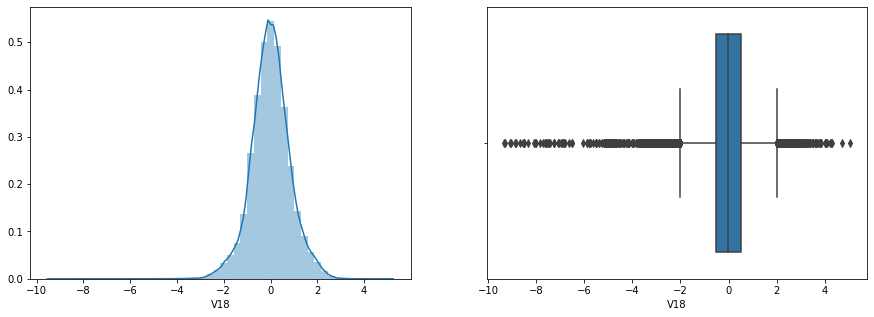

*************
V19
*************


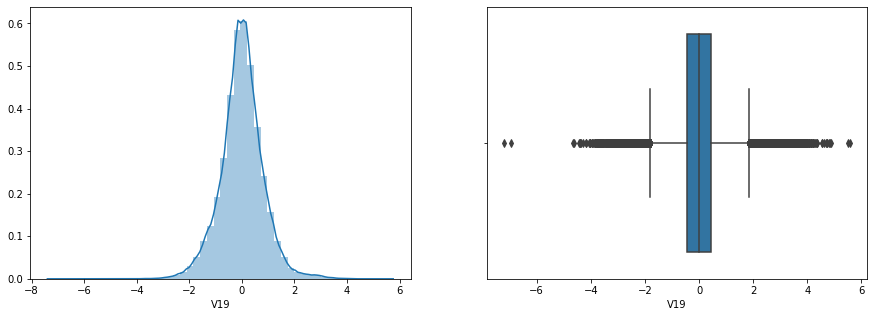

*************
V20
*************


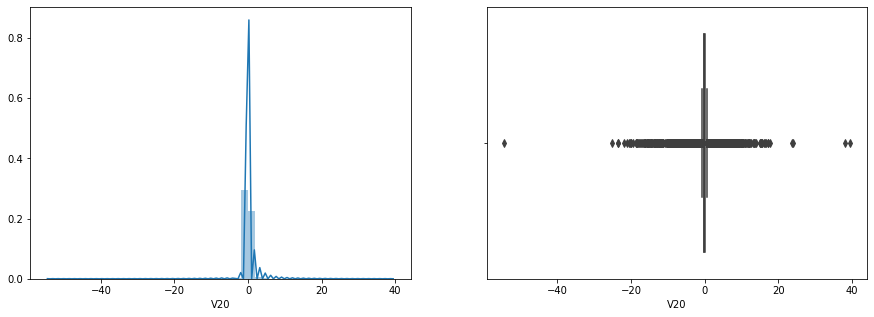

*************
V21
*************


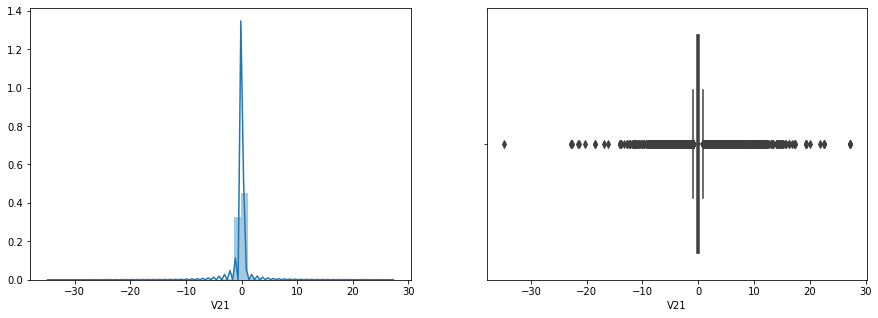

*************
V22
*************


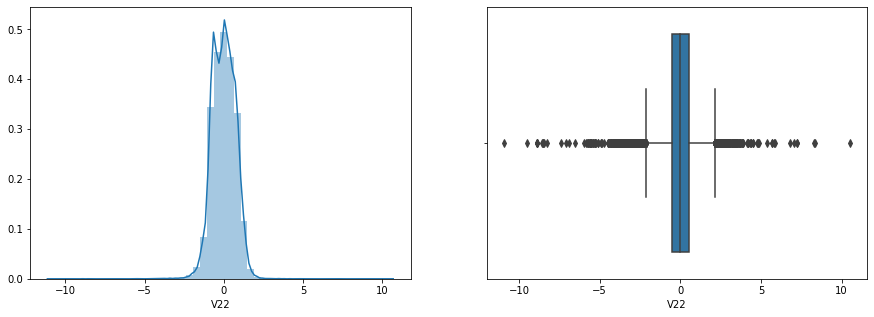

*************
V23
*************


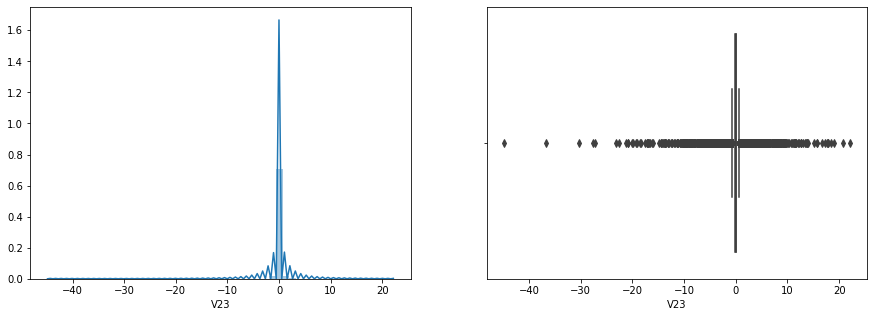

*************
V24
*************


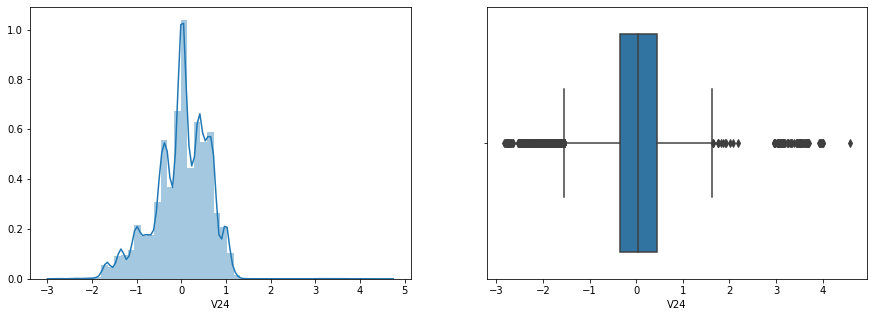

*************
V25
*************


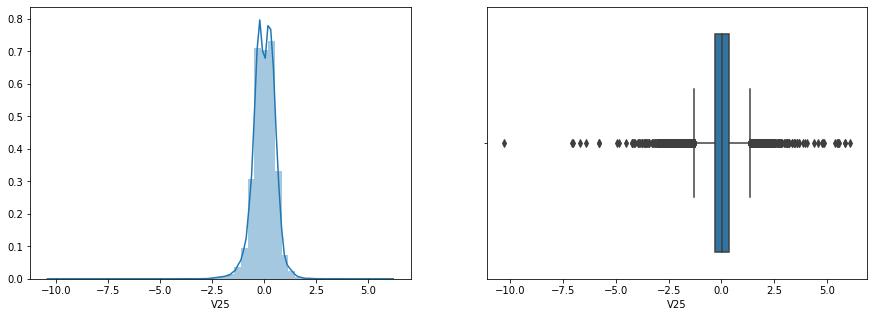

*************
V26
*************


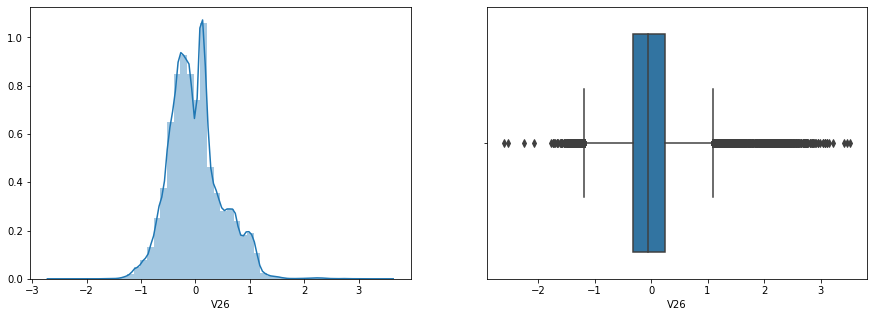

*************
V27
*************


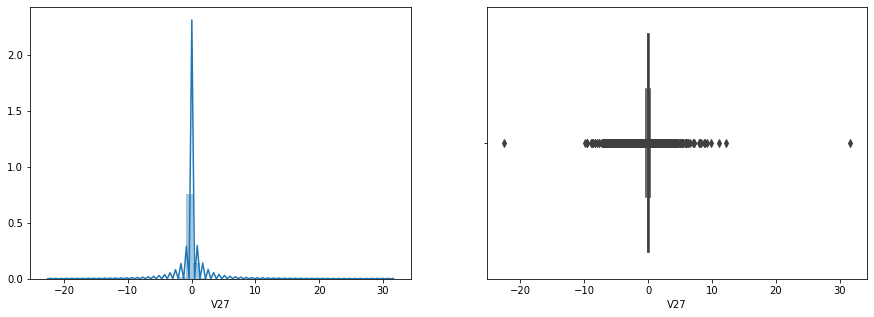

*************
V28
*************


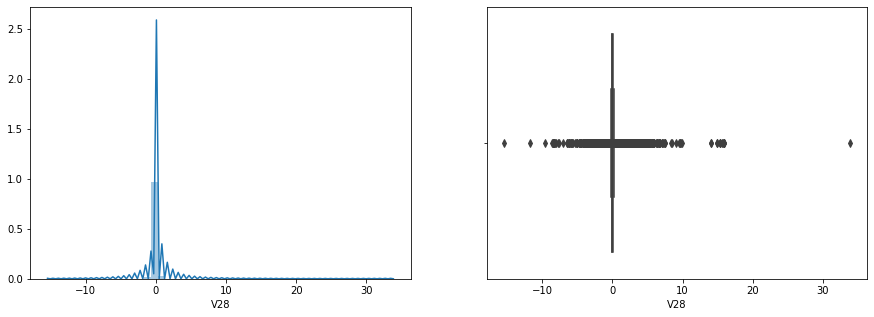

*************
Amount
*************


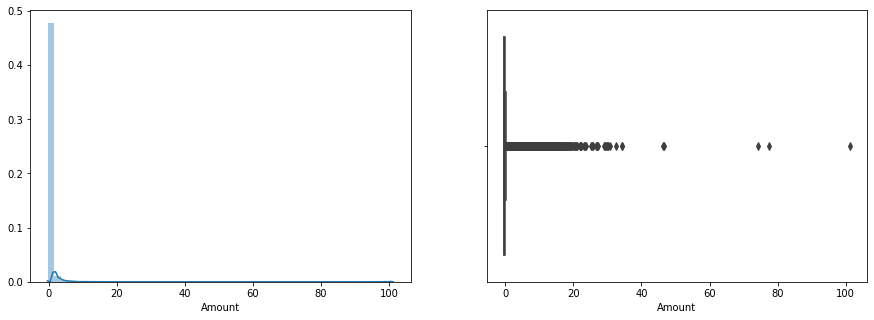

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
for col in X_train.columns:
    print('*************')
    print(col)
    print('*************')
    fig, axis = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(X_train[col],ax=axis[0])
    sns.boxplot(X_train[col],ax=axis[1])
    plt.show()

In [16]:
#lets see the skewness values. If skewness >1 or skewness <-1 , then data is highly skewed.
skewness = X_train.skew()
print(skewness)

V1        -3.350182
V2        -4.834316
V3        -2.322368
V4         0.698531
V5        -3.127732
V6         2.025515
V7         3.646023
V8        -8.851522
V9         0.546540
V10        1.092815
V11        0.372803
V12       -2.359216
V13        0.062582
V14       -2.026111
V15       -0.311842
V16       -1.113892
V17       -3.867831
V18       -0.258044
V19        0.114026
V20       -2.226351
V21        3.452233
V22       -0.220427
V23       -6.168663
V24       -0.549984
V25       -0.414398
V26        0.576731
V27       -0.690027
V28       10.618027
Amount    18.888550
dtype: float64


### Clearly there is skewness present in the distribution. Hence proceeding with Power Transformation.

In [11]:
#Checking shape of dataframes after splitting
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


In [12]:
from sklearn.preprocessing import PowerTransformer

yj = PowerTransformer(method='yeo-johnson')

# perform power transforms 
X_train_fit = yj.fit(X_train).transform(X_train)
X_test_trans = yj.fit(X_train).transform(X_test)
lmbda_yj = round(yj.lambdas_[0], 2)

In [13]:
#Converting numpy arrays to dataframes
X_train_p=pd.DataFrame(X_train_fit)
X_train_p.columns=X_train.columns
X_test_p=pd.DataFrame(X_test_trans)
X_test_p.columns=X_test.columns
print(X_train_p.shape)
print(X_test_p.shape)

(199364, 29)
(85443, 29)


In [16]:
X_train_p

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.267697,0.404782,-0.037582,-0.495586,0.417461,-0.450219,0.677525,-0.079224,-0.119844,-0.170534,...,-0.052398,-0.305036,-0.796136,0.056456,-0.669016,-0.954144,0.386449,0.578464,0.267038,-0.827435
1,1.167168,-0.201782,-1.385696,0.868101,0.434724,-0.791180,0.737052,-0.437967,-0.246955,0.508288,...,-0.042231,0.398622,0.722406,-0.385755,-0.641055,0.951240,-0.898773,-0.195537,-0.166521,1.439423
2,-0.792373,-2.385479,-0.987745,0.403150,-1.478402,-0.554012,1.280349,-0.714879,-1.218243,0.119978,...,2.863557,0.486079,-1.922162,-1.734577,0.838645,-0.304635,1.660302,-0.783775,0.704921,2.086525
3,-0.538573,0.640442,-0.551757,-0.515036,1.826026,2.172282,0.039457,0.777160,-0.250948,0.158587,...,0.289018,-0.251382,-0.976642,0.224379,1.768707,-1.469473,0.177960,0.016490,0.784726,-0.917375
4,-0.596658,0.056559,0.052907,-1.351635,1.933233,2.527105,-0.156943,0.944995,0.474378,-0.229042,...,0.196280,0.245843,1.050549,-0.527474,1.382820,-0.198843,1.242931,0.173308,-0.093808,-0.917375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,-0.487156,0.409229,0.851238,-1.631751,0.121874,-1.051432,0.895899,-0.400364,0.464874,-0.939733,...,0.094265,0.198271,1.047268,-0.479034,0.945329,0.034656,-2.094149,0.587426,-0.053755,-1.040274
199360,1.384201,-0.404138,-0.555034,0.170443,-0.218951,0.407204,-0.657944,0.156275,0.916034,0.235541,...,-0.226996,0.373537,1.231380,0.148381,0.392141,-0.408064,1.260839,-0.090316,-0.172107,-0.865957
199361,-0.957891,0.368932,1.193481,0.060880,0.412826,1.015100,0.489687,0.057574,0.455556,0.140445,...,-0.292521,-0.083417,0.395536,0.166174,-1.033903,-0.830569,0.621506,-1.099570,0.148675,0.024762
199362,0.520697,-0.036973,0.220855,1.060992,-0.287009,-0.198338,0.083050,-0.103592,0.339114,-0.083765,...,-0.195321,-0.068936,-0.082735,-0.094317,0.629701,1.162569,-0.669910,0.066527,0.086217,0.216293


In [14]:
#Resetting index as X train and test indexes are reset after power processing
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

*************
V1
*************


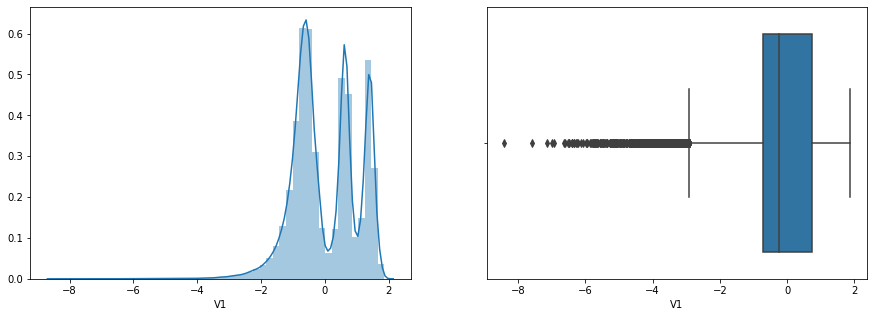

*************
V2
*************


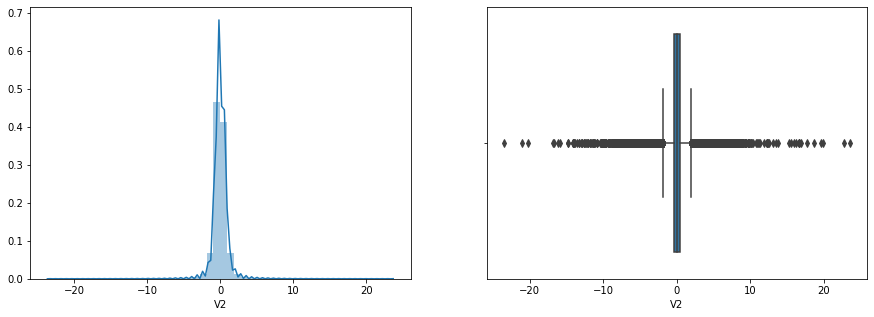

*************
V3
*************


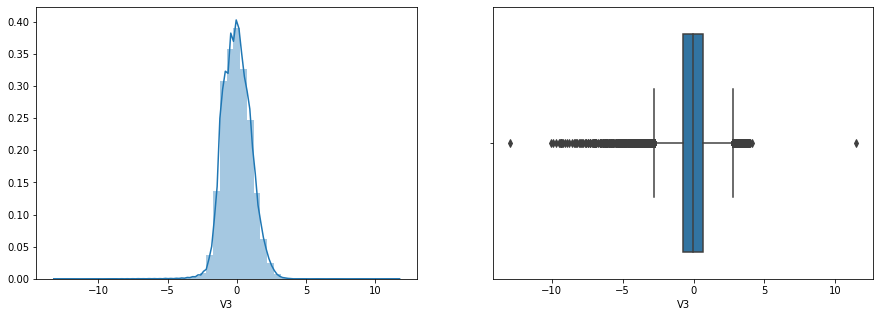

*************
V4
*************


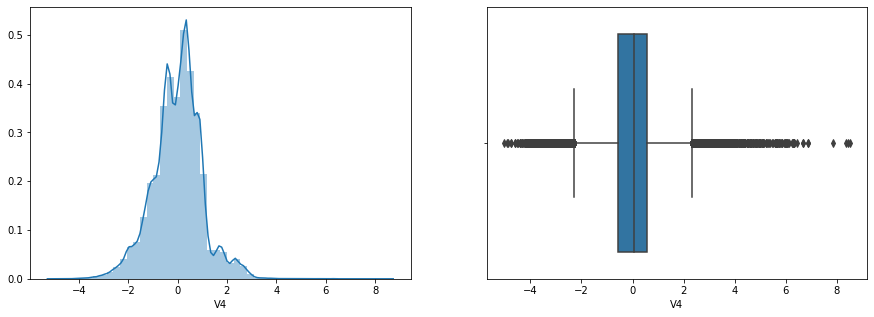

*************
V5
*************


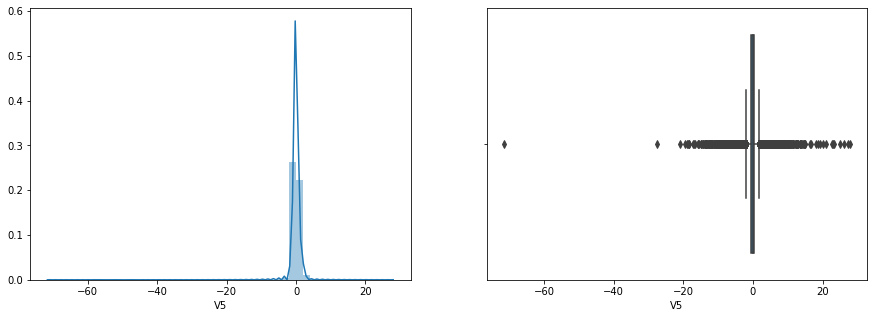

*************
V6
*************


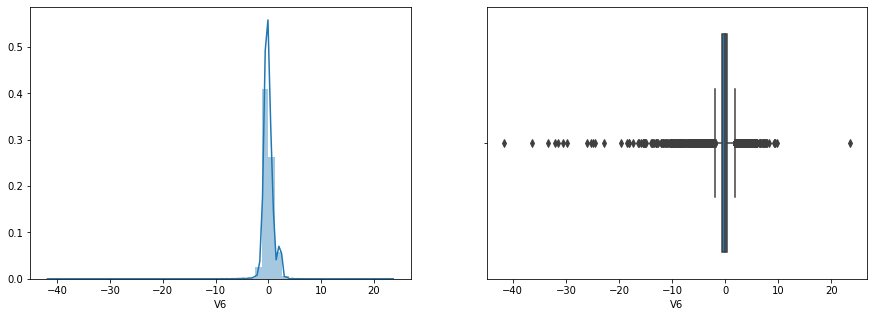

*************
V7
*************


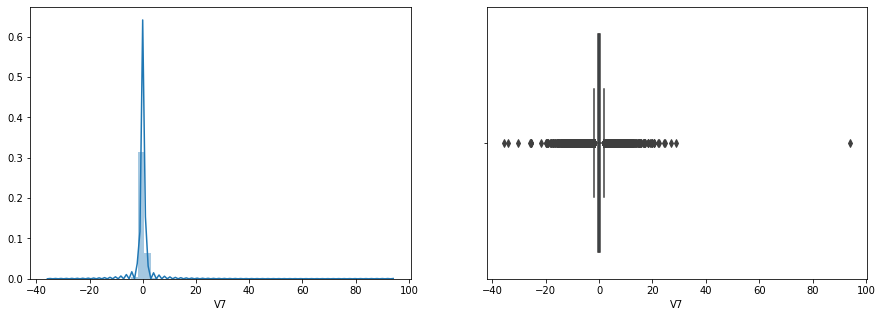

*************
V8
*************


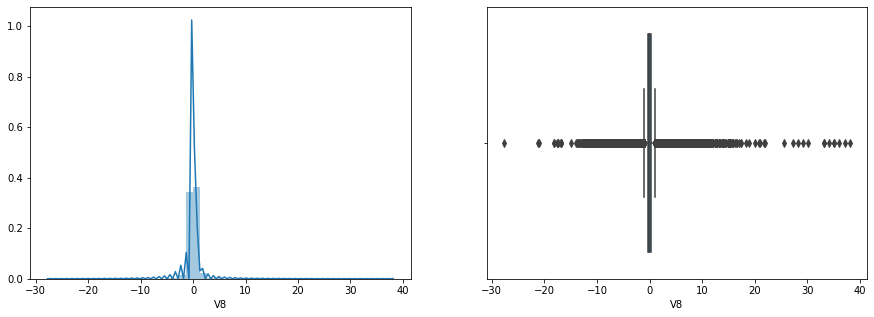

*************
V9
*************


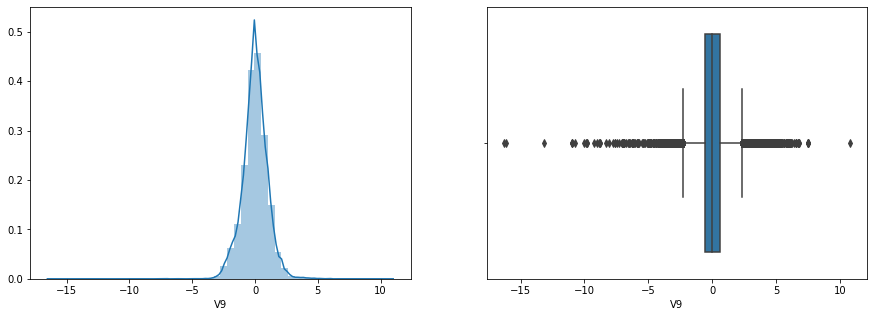

*************
V10
*************


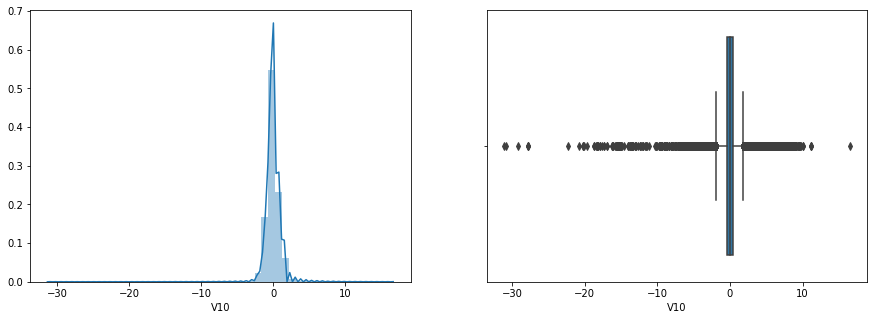

*************
V11
*************


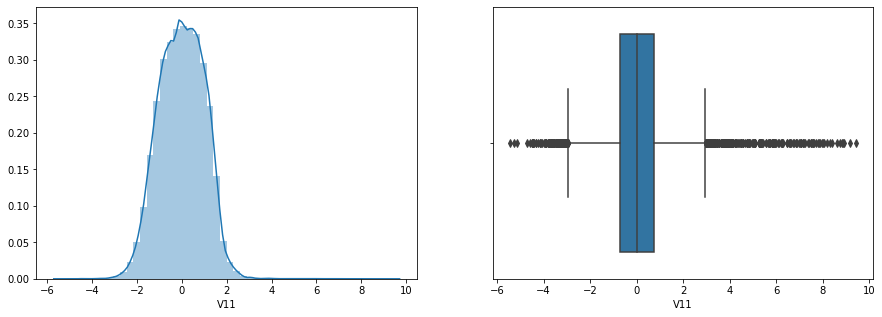

*************
V12
*************


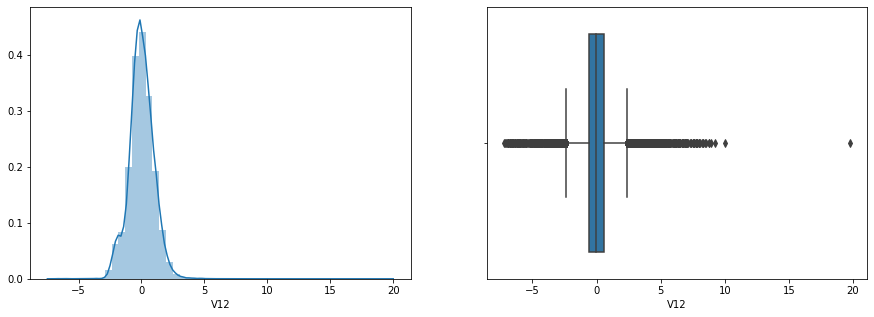

*************
V13
*************


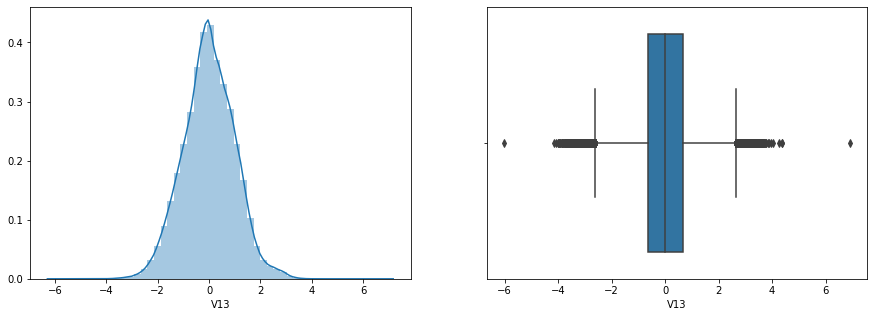

*************
V14
*************


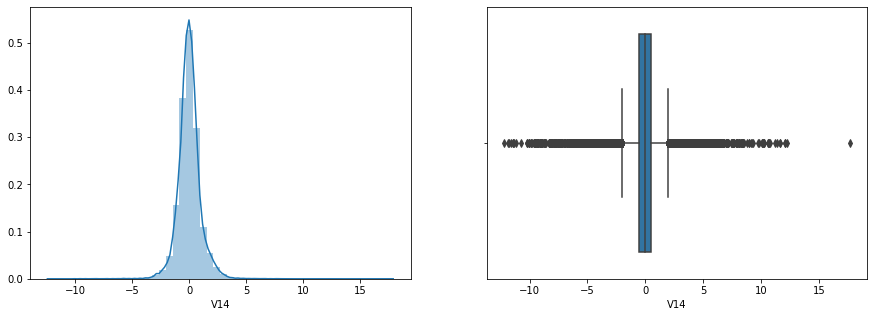

*************
V15
*************


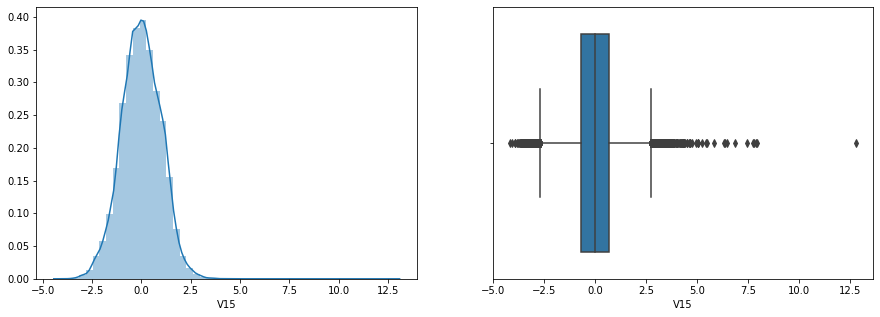

*************
V16
*************


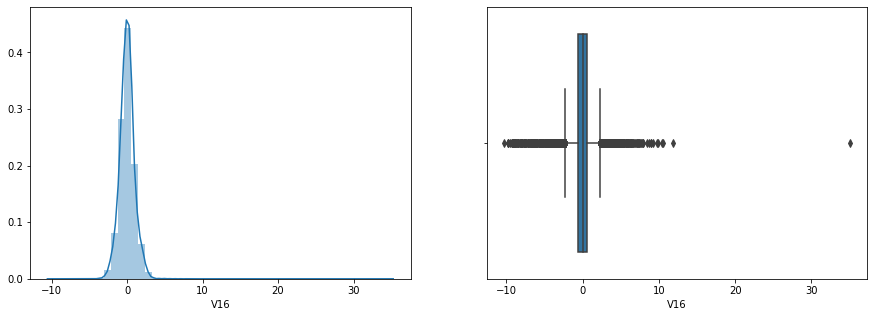

*************
V17
*************


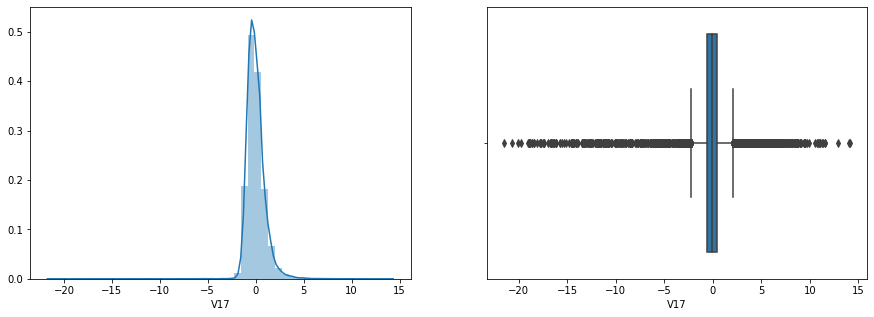

*************
V18
*************


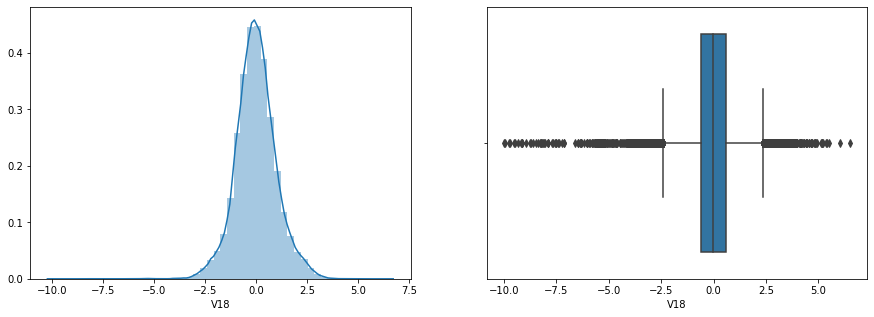

*************
V19
*************


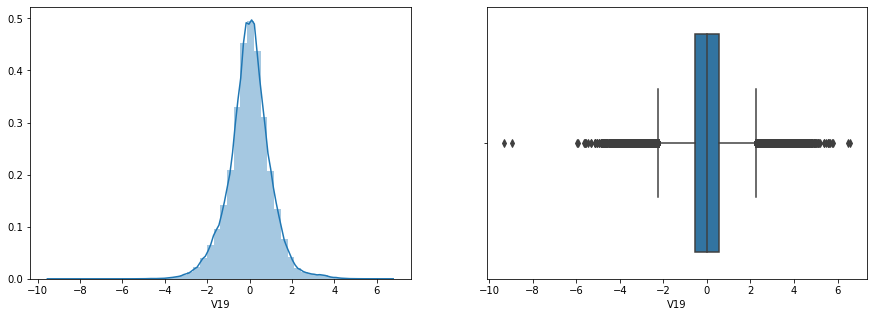

*************
V20
*************


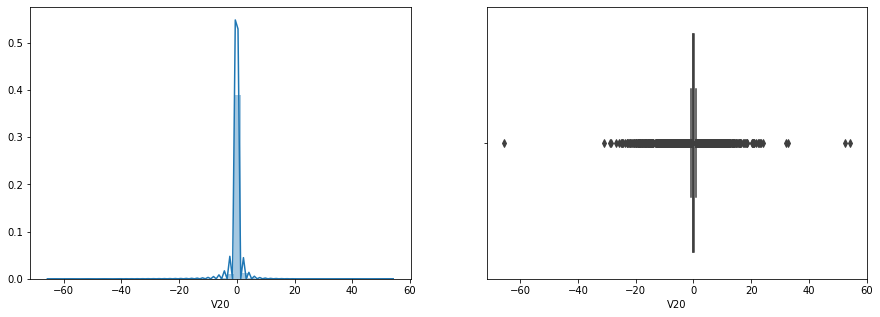

*************
V21
*************


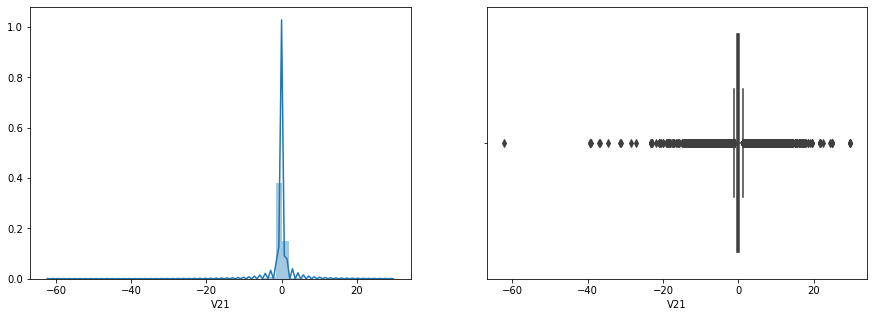

*************
V22
*************


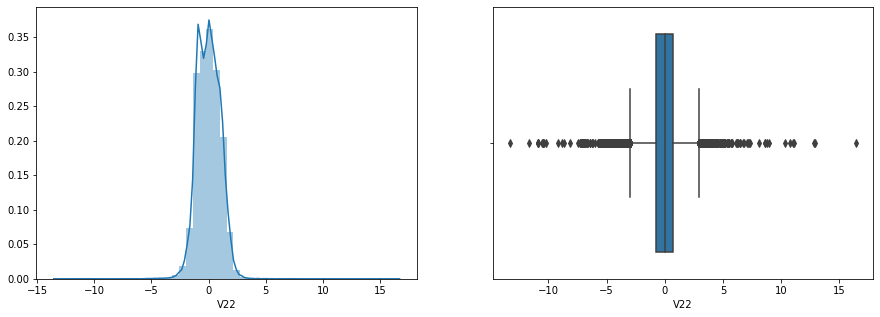

*************
V23
*************


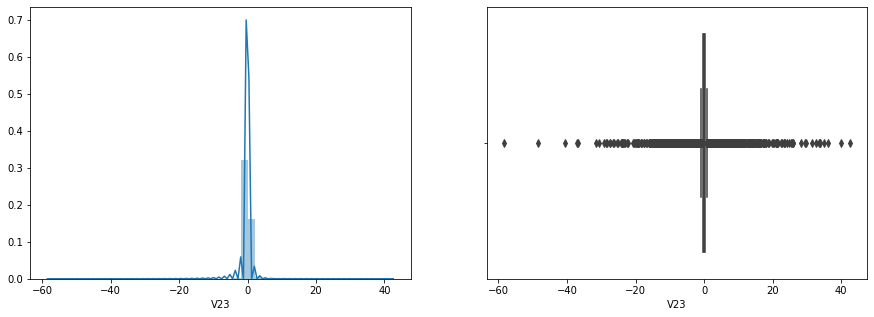

*************
V24
*************


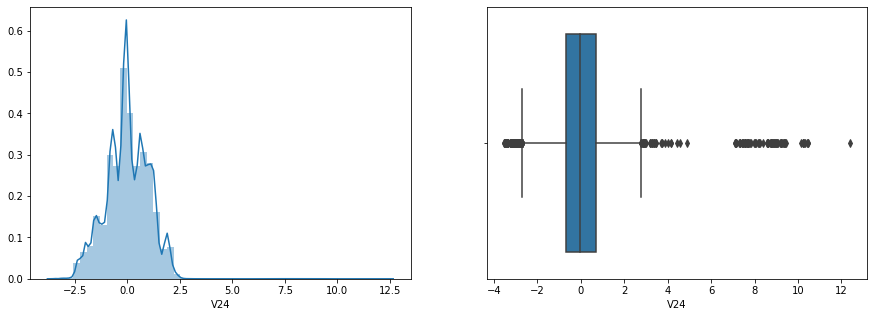

*************
V25
*************


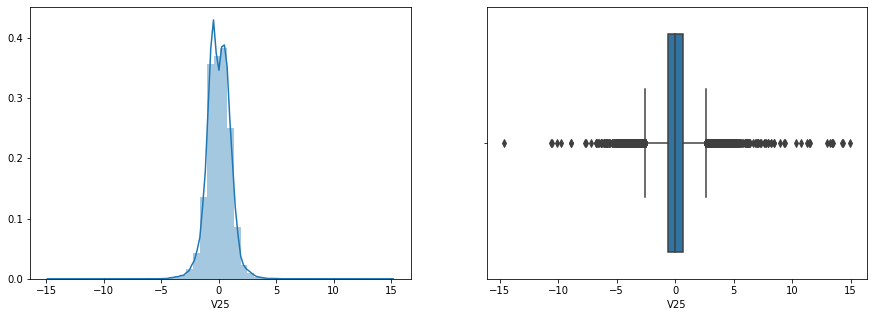

*************
V26
*************


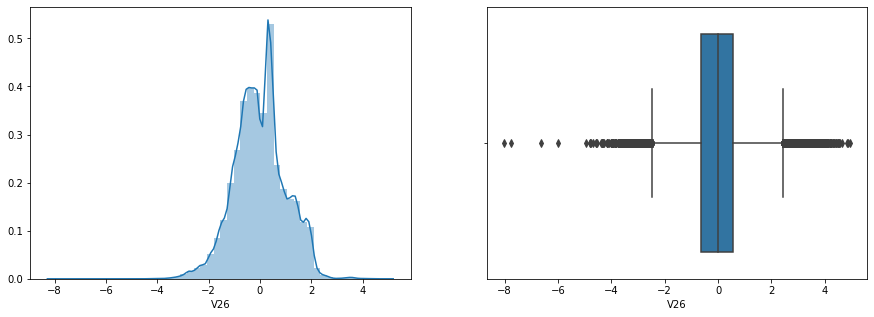

*************
V27
*************


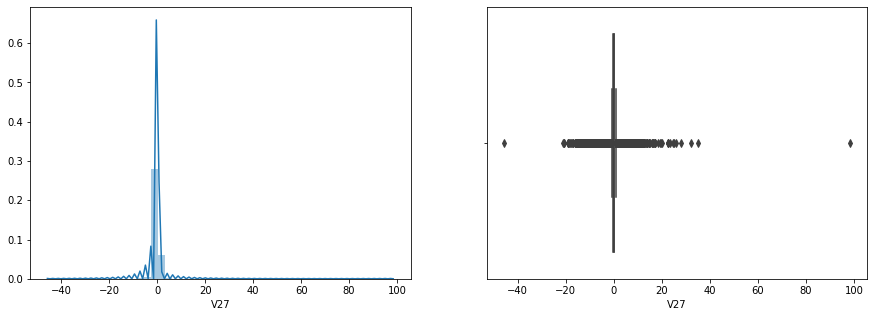

*************
V28
*************


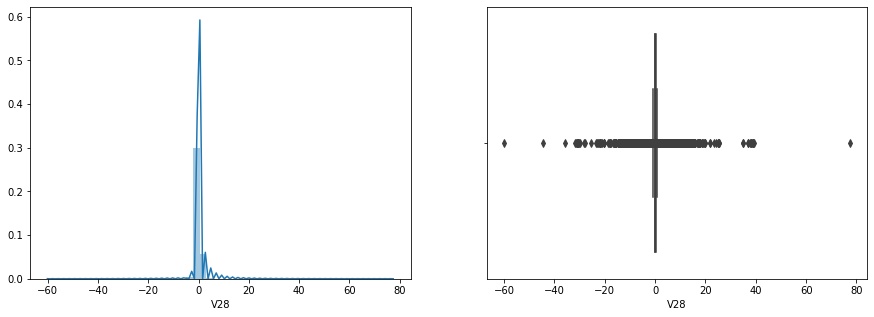

*************
Amount
*************


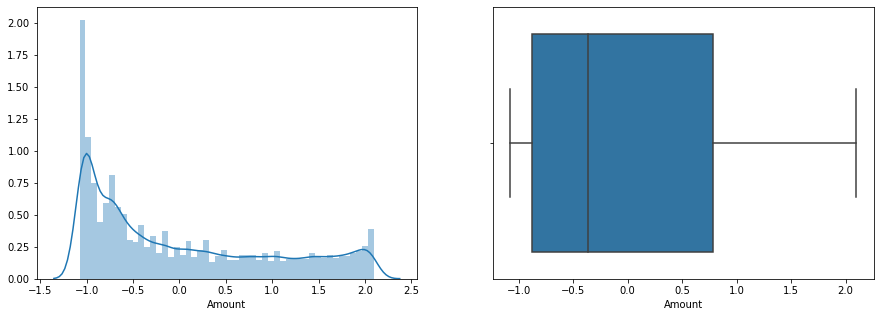

In [24]:
# plot the histogram of a variable from the dataset to see the skewness
for col in X_train_p.columns:
    print('*************')
    print(col)
    print('*************')
    fig, axis = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(X_train_p[col],ax=axis[0])
    sns.boxplot(X_train_p[col],ax=axis[1])
    plt.show()

### Clearly skewness has reduced further when comparing the new plots (after power transformation) to old plots.
- Example : V1 , V2

## Model Building
- Building different models on the imbalanced dataset and see the result

In [79]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,make_scorer
from sklearn.metrics import roc_auc_score,roc_curve,scorer,precision_recall_curve,recall_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

### Logistic Regression

In [80]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_p)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199334
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -677.83
Date:                Mon, 22 Jun 2020   Deviance:                       1355.7
Time:                        11:01:46   Pearson chi2:                 2.00e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0288      0.193    -46.684      0.000      -9.408      -8.650
V1            -0.1837      0.097     -1.886      0.059      -0.375       0.007
V2            -0.2561      0.085     -3.008      0.003      -0.423      -0.089
V3            -0.4063      0.094     -4.320      0.000      -0.591      -0.222
V4             0.9535      0.102      9.319      0.000       0.753       1.154
V5            -0.0504      0.086     -0.585      0.559      -0.219       0.119
V6             0.1680      0.090      1.859      0.063      -0.009       0.345
V7            -0.2593      0.078     -3.330      0.001      -0.412      -0.107
V8            -0.1944      0.054     -3.581      0.000      -0.301      -0.088
V9            -0.2001      0.105     -1.910      0.056      -0.405       0.005
V10           -0.1326      0.096     -1.381      0.167      -0.321       0.056
V11            0.0227      0.096      0.237      0.813      -0.165       0.211
V12           -0.5805      0.121     -4.803      0.000      -0.817      -0.344
V13           -0.3427      0.096     -3.577      0.000      -0.530      -0.155
V14           -0.7984      0.084     -9.515      0.000      -0.963      -0.634
V15           -0.1446      0.094     -1.541      0.123      -0.329       0.039
V16           -0.4704      0.100     -4.694      0.000      -0.667      -0.274
V17            0.0981      0.060      1.627      0.104      -0.020       0.216
V18            0.1512      0.101      1.503      0.133      -0.046       0.348
V19           -0.1948      0.085     -2.294      0.022      -0.361      -0.028
V20           -0.0817      0.056     -1.456      0.145      -0.192       0.028
V21            0.2640      0.069      3.847      0.000       0.129       0.398
V22            0.4445      0.119      3.736      0.000       0.211       0.678
V23           -0.1069      0.050     -2.151      0.031      -0.204      -0.010
V24            0.0719      0.104      0.689      0.491      -0.133       0.276
V25            0.1265      0.084      1.513      0.130      -0.037       0.290
V26           -0.0201      0.119     -0.168      0.866      -0.254       0.214
V27           -0.0894      0.056     -1.599      0.110      -0.199       0.020
V28           -0.0458      0.034     -1.339      0.181      -0.113       0.021
Amount        -0.0464      0.110     -0.423      0.672      -0.261       0.168
==============================================================================
"""

In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
X=X_train_p
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,Amount,1.75
1,V2,1.64
0,V1,1.52
2,V3,1.29
4,V5,1.21
7,V8,1.09
11,V12,1.09
6,V7,1.08
5,V6,1.05
19,V20,1.05


In [82]:
# VIF's are already below 2 which is good enough. P value is high for V5,V11,V24,V26,Amount. 
final_list=list(X_train_p.columns)
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V11')

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train_p[final_list], y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
#Comparing the model with StatsModels
logm3 = sm.GLM(y_train,(sm.add_constant(X_train_p[final_list])), family = sm.families.Binomial())
modres = logm3.fit()
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199335
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -677.86
Date:                Mon, 22 Jun 2020   Deviance:                       1355.7
Time:                        11:03:48   Pearson chi2:                 1.95e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0364      0.191    -47.312      0.000      -9.411      -8.662
V1            -0.1843      0.097     -1.892      0.059      -0.375       0.007
V2            -0.2564      0.085     -3.011      0.003      -0.423      -0.089
V3            -0.4106      0.092     -4.444      0.000      -0.592      -0.230
V4             0.9540      0.102      9.323      0.000       0.753       1.155
V5            -0.0499      0.086     -0.579      0.562      -0.219       0.119
V6             0.1687      0.090      1.867      0.062      -0.008       0.346
V7            -0.2593      0.078     -3.330      0.001      -0.412      -0.107
V8            -0.1946      0.054     -3.585      0.000      -0.301      -0.088
V9            -0.2015      0.105     -1.921      0.055      -0.407       0.004
V10           -0.1360      0.095     -1.425      0.154      -0.323       0.051
V12           -0.5811      0.121     -4.788      0.000      -0.819      -0.343
V13           -0.3420      0.096     -3.568      0.000      -0.530      -0.154
V14           -0.8052      0.079    -10.184      0.000      -0.960      -0.650
V15           -0.1422      0.093     -1.524      0.128      -0.325       0.041
V16           -0.4728      0.100     -4.740      0.000      -0.668      -0.277
V17            0.0976      0.060      1.618      0.106      -0.021       0.216
V18            0.1523      0.101      1.516      0.130      -0.045       0.349
V19           -0.1940      0.085     -2.287      0.022      -0.360      -0.028
V20           -0.0829      0.056     -1.478      0.139      -0.193       0.027
V21            0.2643      0.069      3.850      0.000       0.130       0.399
V22            0.4451      0.119      3.744      0.000       0.212       0.678
V23           -0.1077      0.050     -2.168      0.030      -0.205      -0.010
V24            0.0699      0.104      0.673      0.501      -0.134       0.273
V25            0.1265      0.084      1.514      0.130      -0.037       0.290
V26           -0.0222      0.119     -0.187      0.852      -0.255       0.211
V27           -0.0914      0.056     -1.644      0.100      -0.200       0.018
V28           -0.0465      0.034     -1.361      0.173      -0.113       0.020
Amount        -0.0492      0.109     -0.452      0.651      -0.263       0.164
==============================================================================
"""

In [85]:
X=X_train_p[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,Amount,1.75
1,V2,1.64
0,V1,1.52
2,V3,1.29
4,V5,1.21
7,V8,1.09
6,V7,1.08
10,V12,1.07
5,V6,1.05
18,V20,1.05


In [86]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V26')
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_p[final_list])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199336
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -677.88
Date:                Mon, 22 Jun 2020   Deviance:                       1355.8
Time:                        11:04:28   Pearson chi2:                 1.94e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0341      0.190    -47.435      0.000      -9.407      -8.661
V1            -0.1860      0.097     -1.919      0.055      -0.376       0.004
V2            -0.2537      0.084     -3.020      0.003      -0.418      -0.089
V3            -0.4115      0.092     -4.462      0.000      -0.592      -0.231
V4             0.9528      0.102      9.314      0.000       0.752       1.153
V5            -0.0496      0.086     -0.574      0.566      -0.219       0.120
V6             0.1666      0.090      1.858      0.063      -0.009       0.342
V7            -0.2573      0.077     -3.334      0.001      -0.409      -0.106
V8            -0.1951      0.054     -3.601      0.000      -0.301      -0.089
V9            -0.1975      0.103     -1.922      0.055      -0.399       0.004
V10           -0.1367      0.095     -1.433      0.152      -0.324       0.050
V12           -0.5777      0.120     -4.809      0.000      -0.813      -0.342
V13           -0.3430      0.096     -3.583      0.000      -0.531      -0.155
V14           -0.8053      0.079    -10.179      0.000      -0.960      -0.650
V15           -0.1412      0.093     -1.515      0.130      -0.324       0.041
V16           -0.4739      0.100     -4.756      0.000      -0.669      -0.279
V17            0.0950      0.059      1.615      0.106      -0.020       0.210
V18            0.1542      0.100      1.540      0.124      -0.042       0.351
V19           -0.1976      0.083     -2.388      0.017      -0.360      -0.035
V20           -0.0820      0.056     -1.466      0.143      -0.192       0.028
V21            0.2627      0.068      3.856      0.000       0.129       0.396
V22            0.4422      0.118      3.751      0.000       0.211       0.673
V23           -0.1078      0.050     -2.168      0.030      -0.205      -0.010
V24            0.0701      0.104      0.675      0.499      -0.133       0.274
V25            0.1243      0.083      1.501      0.133      -0.038       0.287
V27           -0.0922      0.055     -1.666      0.096      -0.201       0.016
V28           -0.0469      0.034     -1.376      0.169      -0.114       0.020
Amount        -0.0483      0.109     -0.443      0.657      -0.262       0.165
==============================================================================
"""

In [87]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('Amount')
#Comparing the model with StatsModels
logm5 = sm.GLM(y_train,(sm.add_constant(X_train_p[final_list])), family = sm.families.Binomial())
modres = logm5.fit()
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199337
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -677.98
Date:                Mon, 22 Jun 2020   Deviance:                       1356.0
Time:                        11:04:40   Pearson chi2:                 1.95e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0358      0.190    -47.436      0.000      -9.409      -8.662
V1            -0.1783      0.096     -1.865      0.062      -0.366       0.009
V2            -0.2402      0.079     -3.053      0.002      -0.394      -0.086
V3            -0.4079      0.092     -4.437      0.000      -0.588      -0.228
V4             0.9553      0.102      9.334      0.000       0.755       1.156
V5            -0.0381      0.083     -0.461      0.645      -0.200       0.124
V6             0.1621      0.089      1.825      0.068      -0.012       0.336
V7            -0.2587      0.078     -3.335      0.001      -0.411      -0.107
V8            -0.1977      0.054     -3.668      0.000      -0.303      -0.092
V9            -0.1930      0.102     -1.887      0.059      -0.394       0.007
V10           -0.1403      0.095     -1.472      0.141      -0.327       0.047
V12           -0.5778      0.120     -4.814      0.000      -0.813      -0.343
V13           -0.3423      0.096     -3.574      0.000      -0.530      -0.155
V14           -0.8026      0.079    -10.177      0.000      -0.957      -0.648
V15           -0.1377      0.093     -1.482      0.138      -0.320       0.044
V16           -0.4676      0.099     -4.745      0.000      -0.661      -0.274
V17            0.0938      0.059      1.594      0.111      -0.022       0.209
V18            0.1519      0.100      1.521      0.128      -0.044       0.348
V19           -0.1974      0.083     -2.386      0.017      -0.360      -0.035
V20           -0.0811      0.057     -1.425      0.154      -0.193       0.030
V21            0.2612      0.068      3.839      0.000       0.128       0.395
V22            0.4390      0.118      3.732      0.000       0.208       0.670
V23           -0.1091      0.050     -2.164      0.030      -0.208      -0.010
V24            0.0716      0.104      0.690      0.490      -0.132       0.275
V25            0.1255      0.083      1.516      0.130      -0.037       0.288
V27           -0.0921      0.056     -1.653      0.098      -0.201       0.017
V28           -0.0452      0.034     -1.318      0.188      -0.112       0.022
==============================================================================
"""

In [88]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V5')
#Comparing the model with StatsModels
logm6 = sm.GLM(y_train,(sm.add_constant(X_train_p[final_list])), family = sm.families.Binomial())
modres = logm6.fit()
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199338
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -678.08
Date:                Mon, 22 Jun 2020   Deviance:                       1356.2
Time:                        11:04:50   Pearson chi2:                 1.98e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0304      0.190    -47.570      0.000      -9.403      -8.658
V1            -0.1817      0.096     -1.901      0.057      -0.369       0.006
V2            -0.2312      0.077     -3.019      0.003      -0.381      -0.081
V3            -0.4122      0.092     -4.500      0.000      -0.592      -0.233
V4             0.9588      0.103      9.303      0.000       0.757       1.161
V6             0.1753      0.082      2.136      0.033       0.014       0.336
V7            -0.2505      0.076     -3.278      0.001      -0.400      -0.101
V8            -0.1868      0.049     -3.839      0.000      -0.282      -0.091
V9            -0.1834      0.101     -1.817      0.069      -0.381       0.014
V10           -0.1490      0.094     -1.588      0.112      -0.333       0.035
V12           -0.5723      0.120     -4.773      0.000      -0.807      -0.337
V13           -0.3431      0.096     -3.574      0.000      -0.531      -0.155
V14           -0.7972      0.078    -10.211      0.000      -0.950      -0.644
V15           -0.1365      0.093     -1.468      0.142      -0.319       0.046
V16           -0.4670      0.100     -4.691      0.000      -0.662      -0.272
V17            0.0847      0.056      1.522      0.128      -0.024       0.194
V18            0.1518      0.101      1.504      0.132      -0.046       0.350
V19           -0.1946      0.083     -2.351      0.019      -0.357      -0.032
V20           -0.0799      0.058     -1.388      0.165      -0.193       0.033
V21            0.2607      0.069      3.805      0.000       0.126       0.395
V22            0.4288      0.115      3.714      0.000       0.203       0.655
V23           -0.1103      0.051     -2.176      0.030      -0.210      -0.011
V24            0.0729      0.103      0.707      0.480      -0.129       0.275
V25            0.1233      0.082      1.495      0.135      -0.038       0.285
V27           -0.0918      0.056     -1.644      0.100      -0.201       0.018
V28           -0.0427      0.034     -1.247      0.213      -0.110       0.024
==============================================================================
"""

In [89]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V24')
#Comparing the model with StatsModels
logm7 = sm.GLM(y_train,(sm.add_constant(X_train_p[final_list])), family = sm.families.Binomial())
modres = logm7.fit()
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199339
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -678.33
Date:                Mon, 22 Jun 2020   Deviance:                       1356.7
Time:                        11:05:00   Pearson chi2:                 1.94e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0193      0.188    -47.872      0.000      -9.389      -8.650
V1            -0.1826      0.096     -1.910      0.056      -0.370       0.005
V2            -0.2314      0.077     -3.022      0.003      -0.381      -0.081
V3            -0.4127      0.092     -4.497      0.000      -0.593      -0.233
V4             0.9553      0.103      9.265      0.000       0.753       1.157
V6             0.1733      0.083      2.087      0.037       0.011       0.336
V7            -0.2505      0.077     -3.261      0.001      -0.401      -0.100
V8            -0.1869      0.049     -3.836      0.000      -0.282      -0.091
V9            -0.1800      0.101     -1.790      0.074      -0.377       0.017
V10           -0.1477      0.094     -1.574      0.115      -0.331       0.036
V12           -0.5725      0.120     -4.785      0.000      -0.807      -0.338
V13           -0.3393      0.096     -3.552      0.000      -0.526      -0.152
V14           -0.7896      0.077    -10.223      0.000      -0.941      -0.638
V15           -0.1418      0.093     -1.531      0.126      -0.323       0.040
V16           -0.4646      0.099     -4.680      0.000      -0.659      -0.270
V17            0.0800      0.055      1.456      0.145      -0.028       0.188
V18            0.1526      0.101      1.518      0.129      -0.044       0.350
V19           -0.1877      0.082     -2.295      0.022      -0.348      -0.027
V20           -0.0795      0.058     -1.377      0.169      -0.193       0.034
V21            0.2575      0.068      3.765      0.000       0.123       0.392
V22            0.4229      0.115      3.685      0.000       0.198       0.648
V23           -0.1138      0.051     -2.243      0.025      -0.213      -0.014
V25            0.1220      0.082      1.483      0.138      -0.039       0.283
V27           -0.0911      0.056     -1.627      0.104      -0.201       0.019
V28           -0.0444      0.035     -1.287      0.198      -0.112       0.023
==============================================================================
"""

In [90]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V28')
#Comparing the model with StatsModels
logm8 = sm.GLM(y_train,(sm.add_constant(X_train_p[final_list])), family = sm.families.Binomial())
modres = logm8.fit()
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199340
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -679.13
Date:                Mon, 22 Jun 2020   Deviance:                       1358.3
Time:                        11:05:10   Pearson chi2:                 1.98e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0132      0.188    -47.971      0.000      -9.381      -8.645
V1            -0.1805      0.097     -1.862      0.063      -0.370       0.009
V2            -0.2101      0.074     -2.826      0.005      -0.356      -0.064
V3            -0.3909      0.090     -4.351      0.000      -0.567      -0.215
V4             0.9357      0.101      9.281      0.000       0.738       1.133
V6             0.1608      0.079      2.024      0.043       0.005       0.317
V7            -0.2584      0.078     -3.314      0.001      -0.411      -0.106
V8            -0.1922      0.049     -3.937      0.000      -0.288      -0.096
V9            -0.1727      0.099     -1.744      0.081      -0.367       0.021
V10           -0.1213      0.089     -1.365      0.172      -0.295       0.053
V12           -0.5826      0.119     -4.883      0.000      -0.816      -0.349
V13           -0.3392      0.095     -3.554      0.000      -0.526      -0.152
V14           -0.8066      0.076    -10.612      0.000      -0.956      -0.658
V15           -0.1404      0.093     -1.516      0.130      -0.322       0.041
V16           -0.4684      0.099     -4.718      0.000      -0.663      -0.274
V17            0.0821      0.055      1.495      0.135      -0.026       0.190
V18            0.1484      0.100      1.483      0.138      -0.048       0.345
V19           -0.1942      0.081     -2.392      0.017      -0.353      -0.035
V20           -0.0485      0.052     -0.940      0.347      -0.149       0.053
V21            0.2576      0.069      3.746      0.000       0.123       0.392
V22            0.4310      0.115      3.753      0.000       0.206       0.656
V23           -0.1110      0.053     -2.099      0.036      -0.215      -0.007
V25            0.1094      0.082      1.334      0.182      -0.051       0.270
V27           -0.0869      0.057     -1.522      0.128      -0.199       0.025
==============================================================================
"""

In [91]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V20')
#Comparing the model with StatsModels
logm9 = sm.GLM(y_train,(sm.add_constant(X_train_p[final_list])), family = sm.families.Binomial())
modres = logm9.fit()
logm9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199341
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -679.60
Date:                Mon, 22 Jun 2020   Deviance:                       1359.2
Time:                        11:05:20   Pearson chi2:                 1.94e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0080      0.187    -48.114      0.000      -9.375      -8.641
V1            -0.1870      0.095     -1.963      0.050      -0.374      -0.000
V2            -0.1957      0.070     -2.778      0.005      -0.334      -0.058
V3            -0.4068      0.087     -4.668      0.000      -0.578      -0.236
V4             0.9188      0.098      9.402      0.000       0.727       1.110
V6             0.1670      0.079      2.100      0.036       0.011       0.323
V7            -0.2740      0.074     -3.679      0.000      -0.420      -0.128
V8            -0.2076      0.045     -4.640      0.000      -0.295      -0.120
V9            -0.1567      0.096     -1.641      0.101      -0.344       0.031
V10           -0.0922      0.078     -1.182      0.237      -0.245       0.061
V12           -0.5890      0.118     -4.983      0.000      -0.821      -0.357
V13           -0.3405      0.095     -3.566      0.000      -0.528      -0.153
V14           -0.8229      0.072    -11.360      0.000      -0.965      -0.681
V15           -0.1425      0.093     -1.537      0.124      -0.324       0.039
V16           -0.4425      0.096     -4.608      0.000      -0.631      -0.254
V17            0.0810      0.055      1.477      0.140      -0.027       0.189
V18            0.1262      0.098      1.290      0.197      -0.065       0.318
V19           -0.1779      0.079     -2.244      0.025      -0.333      -0.023
V21            0.2452      0.067      3.668      0.000       0.114       0.376
V22            0.4493      0.113      3.959      0.000       0.227       0.672
V23           -0.1142      0.051     -2.226      0.026      -0.215      -0.014
V25            0.1300      0.079      1.641      0.101      -0.025       0.285
V27           -0.0792      0.054     -1.463      0.144      -0.185       0.027
==============================================================================
"""

In [92]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V10')
#Comparing the model with StatsModels
logm10 = sm.GLM(y_train,(sm.add_constant(X_train_p[final_list])), family = sm.families.Binomial())
modres = logm10.fit()
logm10.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199342
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -680.32
Date:                Mon, 22 Jun 2020   Deviance:                       1360.6
Time:                        11:05:29   Pearson chi2:                 1.74e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0422      0.186    -48.668      0.000      -9.406      -8.678
V1            -0.1918      0.094     -2.046      0.041      -0.375      -0.008
V2            -0.2136      0.067     -3.192      0.001      -0.345      -0.082
V3            -0.4414      0.082     -5.383      0.000      -0.602      -0.281
V4             0.8987      0.093      9.626      0.000       0.716       1.082
V6             0.1655      0.077      2.138      0.033       0.014       0.317
V7            -0.2799      0.074     -3.766      0.000      -0.426      -0.134
V8            -0.1998      0.045     -4.453      0.000      -0.288      -0.112
V9            -0.1873      0.088     -2.139      0.032      -0.359      -0.016
V12           -0.6195      0.117     -5.306      0.000      -0.848      -0.391
V13           -0.3328      0.095     -3.490      0.000      -0.520      -0.146
V14           -0.8527      0.068    -12.479      0.000      -0.987      -0.719
V15           -0.1535      0.092     -1.665      0.096      -0.334       0.027
V16           -0.4595      0.093     -4.955      0.000      -0.641      -0.278
V17            0.0773      0.055      1.416      0.157      -0.030       0.184
V18            0.1320      0.096      1.370      0.171      -0.057       0.321
V19           -0.1858      0.078     -2.386      0.017      -0.338      -0.033
V21            0.2554      0.066      3.870      0.000       0.126       0.385
V22            0.4506      0.113      3.984      0.000       0.229       0.672
V23           -0.1182      0.052     -2.272      0.023      -0.220      -0.016
V25            0.1323      0.079      1.678      0.093      -0.022       0.287
V27           -0.0551      0.048     -1.157      0.247      -0.149       0.038
==============================================================================
"""

In [93]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V27')
#Comparing the model with StatsModels
logm11 = sm.GLM(y_train,(sm.add_constant(X_train_p[final_list])), family = sm.families.Binomial())
modres = logm11.fit()
logm11.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199343
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -680.96
Date:                Mon, 22 Jun 2020   Deviance:                       1361.9
Time:                        11:05:38   Pearson chi2:                 1.86e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0353      0.186    -48.628      0.000      -9.400      -8.671
V1            -0.2138      0.092     -2.335      0.020      -0.393      -0.034
V2            -0.2075      0.067     -3.081      0.002      -0.339      -0.075
V3            -0.4307      0.084     -5.110      0.000      -0.596      -0.266
V4             0.9017      0.094      9.571      0.000       0.717       1.086
V6             0.1670      0.080      2.099      0.036       0.011       0.323
V7            -0.2525      0.070     -3.584      0.000      -0.391      -0.114
V8            -0.1954      0.045     -4.296      0.000      -0.285      -0.106
V9            -0.1518      0.081     -1.879      0.060      -0.310       0.007
V12           -0.6249      0.116     -5.371      0.000      -0.853      -0.397
V13           -0.3261      0.095     -3.432      0.001      -0.512      -0.140
V14           -0.8617      0.069    -12.518      0.000      -0.997      -0.727
V15           -0.1455      0.092     -1.586      0.113      -0.325       0.034
V16           -0.4527      0.093     -4.887      0.000      -0.634      -0.271
V17            0.0717      0.054      1.317      0.188      -0.035       0.178
V18            0.1321      0.097      1.368      0.171      -0.057       0.321
V19           -0.1904      0.078     -2.446      0.014      -0.343      -0.038
V21            0.2505      0.066      3.787      0.000       0.121       0.380
V22            0.4543      0.113      4.017      0.000       0.233       0.676
V23           -0.1214      0.051     -2.401      0.016      -0.220      -0.022
V25            0.1309      0.079      1.651      0.099      -0.024       0.286
==============================================================================
"""

In [94]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V15')
#Comparing the model with StatsModels
logm12 = sm.GLM(y_train,(sm.add_constant(X_train_p[final_list])), family = sm.families.Binomial())
modres = logm12.fit()
logm12.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199344
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -682.23
Date:                Mon, 22 Jun 2020   Deviance:                       1364.5
Time:                        11:05:47   Pearson chi2:                 1.80e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0376      0.186    -48.529      0.000      -9.403      -8.673
V1            -0.1879      0.091     -2.072      0.038      -0.366      -0.010
V2            -0.2086      0.067     -3.117      0.002      -0.340      -0.077
V3            -0.4152      0.083     -4.992      0.000      -0.578      -0.252
V4             0.9137      0.095      9.630      0.000       0.728       1.100
V6             0.1838      0.078      2.361      0.018       0.031       0.336
V7            -0.2664      0.070     -3.824      0.000      -0.403      -0.130
V8            -0.1941      0.045     -4.276      0.000      -0.283      -0.105
V9            -0.1631      0.081     -2.024      0.043      -0.321      -0.005
V12           -0.6250      0.119     -5.258      0.000      -0.858      -0.392
V13           -0.3206      0.096     -3.349      0.001      -0.508      -0.133
V14           -0.8589      0.069    -12.367      0.000      -0.995      -0.723
V16           -0.4423      0.092     -4.822      0.000      -0.622      -0.263
V17            0.0572      0.053      1.076      0.282      -0.047       0.161
V18            0.1469      0.095      1.541      0.123      -0.040       0.334
V19           -0.2078      0.076     -2.718      0.007      -0.358      -0.058
V21            0.2638      0.065      4.040      0.000       0.136       0.392
V22            0.4650      0.113      4.102      0.000       0.243       0.687
V23           -0.1243      0.050     -2.495      0.013      -0.222      -0.027
V25            0.1452      0.079      1.846      0.065      -0.009       0.299
==============================================================================
"""

In [95]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V17')
#Comparing the model with StatsModels
logm13 = sm.GLM(y_train,(sm.add_constant(X_train_p[final_list])), family = sm.families.Binomial())
modres = logm13.fit()
logm13.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199345
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -682.80
Date:                Mon, 22 Jun 2020   Deviance:                       1365.6
Time:                        11:05:56   Pearson chi2:                 1.88e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0075      0.184    -49.069      0.000      -9.367      -8.648
V1            -0.1857      0.090     -2.057      0.040      -0.363      -0.009
V2            -0.1888      0.065     -2.925      0.003      -0.315      -0.062
V3            -0.4168      0.083     -5.010      0.000      -0.580      -0.254
V4             0.9161      0.096      9.581      0.000       0.729       1.104
V6             0.1783      0.078      2.277      0.023       0.025       0.332
V7            -0.2578      0.069     -3.730      0.000      -0.393      -0.122
V8            -0.2029      0.045     -4.537      0.000      -0.291      -0.115
V9            -0.1617      0.081     -2.004      0.045      -0.320      -0.004
V12           -0.5908      0.116     -5.087      0.000      -0.818      -0.363
V13           -0.3208      0.096     -3.329      0.001      -0.510      -0.132
V14           -0.8613      0.070    -12.318      0.000      -0.998      -0.724
V16           -0.4089      0.086     -4.766      0.000      -0.577      -0.241
V18            0.1954      0.084      2.323      0.020       0.031       0.360
V19           -0.2171      0.076     -2.846      0.004      -0.367      -0.068
V21            0.2548      0.065      3.940      0.000       0.128       0.382
V22            0.4550      0.113      4.030      0.000       0.234       0.676
V23           -0.1197      0.049     -2.435      0.015      -0.216      -0.023
V25            0.1412      0.079      1.793      0.073      -0.013       0.296
==============================================================================
"""

In [96]:
X=X_train_p[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,V1,1.29
2,V3,1.19
1,V2,1.12
6,V8,1.08
5,V7,1.07
8,V12,1.05
3,V4,1.03
10,V14,1.03
7,V9,1.02
11,V16,1.01


In [97]:
# Finalizing this model as p-value and vif's look good now
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train_p[final_list], y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation on train data to determine Threshold

In [98]:
# Predicted probabilities
y_train_pred = logsk.predict_proba(X_train_p[final_list])
# Converting y_pred to a dataframe which is an array
y_train_pred_df = pd.DataFrame(y_train_pred)
# Converting to column dataframe
y_train_pred_df_1 = y_train_pred_df.iloc[:,[1]]
# Let's see the head
y_train_pred_df_1.head()

,1
0,0.000021
1,0.000275
2,0.000366
3,0.000079
4,0.000197


In [99]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [100]:
y_train_pred_final = pd.concat([y_train_df,y_train_pred_df_1],axis=1)
# Renaming the column 
y_train_pred_final= y_train_pred_final.rename(columns={ 1 : 'Conversion_Prob'})
# Rearranging the columns
y_train_pred_final 

,Class,Conversion_Prob
0,0,0.000021
1,0,0.000275
2,0,0.000366
3,0,0.000079
4,0,0.000197
...,...,...
199359,0,0.000009
199360,0,0.000191
199361,0,0.000233
199362,0,0.000320


In [101]:
# Creating a matrix by considering different cutoffs.
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    y_train_pred_final[i]=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>i else 0)
    
# Let's see the head of y_pred_final
y_train_pred_final.head()

,Class,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000021,1,0,0,0,0,0,0,0,0,0
1,0,0.000275,1,0,0,0,0,0,0,0,0,0
2,0,0.000366,1,0,0,0,0,0,0,0,0,0
3,0,0.000079,1,0,0,0,0,0,0,0,0,0
4,0,0.000197,1,0,0,0,0,0,0,0,0,0


In [102]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

#Calculating accuracy , specificity , sensitivity for different probabilities
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001725  1.000000  0.000000
0.1   0.1  0.999283  0.813953  0.999603
0.2   0.2  0.999358  0.787791  0.999724
0.3   0.3  0.999338  0.732558  0.999799
0.4   0.4  0.999308  0.688953  0.999844
0.5   0.5  0.999318  0.677326  0.999874
0.6   0.6  0.999268  0.639535  0.999889
0.7   0.7  0.999212  0.607558  0.999889
0.8   0.8  0.999152  0.572674  0.999889
0.9   0.9  0.999072  0.526163  0.999889


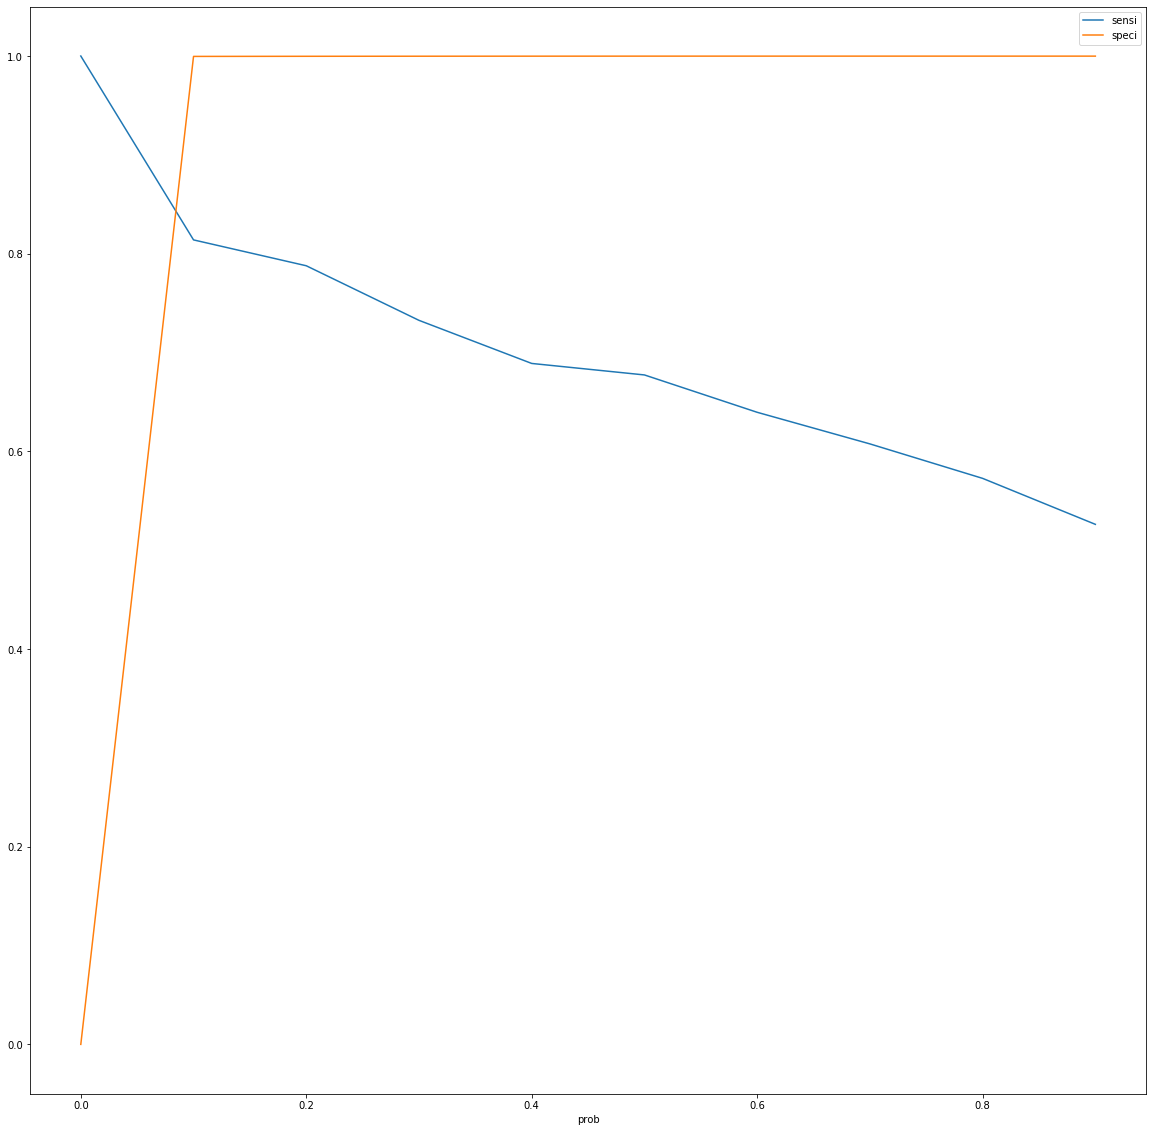

In [103]:
# Plotting same to find optimal cutoff (Accuracy anyways does not make sense as its 0.99 almost constant due to class imbalance)
cutoff_df.plot(x='prob',y=['sensi','speci'])
plt.show()
# 0.1 looks to be right probability for this dataset

#### 0.1 looks to be right probability for this dataset

#### Using Stratified Kfold & Hyper parameter Tuning for Logistic Regression

In [104]:
#Grid Search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10]}
clf = GridSearchCV(estimator=logreg,cv=kf,param_grid=param,scoring='roc_auc',refit=True,n_jobs=-1,verbose=1)
clf.fit(X_train_p[final_list], y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   28.6s finished


Best roc_auc: 0.9823, with best C: {'C': 5}


#### Average ROC for Stratified Kfold 

In [107]:
## from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_p[final_list], y_train):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train_p[final_list].loc[train_index],X_train_p[final_list].loc[test_index]
    ytr,yvl = y_train.loc[train_index],y_train.loc[test_index]
    
    #model - using the best 'C' value that we got in above step
    lr = LogisticRegression(C=5)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test_p[final_list])[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 5
ROC AUC score: 0.8405043408353103
2 of KFold 5
ROC AUC score: 0.8550473406649103
3 of KFold 5
ROC AUC score: 0.7608193190109799
4 of KFold 5
ROC AUC score: 0.8622560328216959
5 of KFold 5
ROC AUC score: 0.8381222401532215


In [108]:
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Cv [0.8405043408353103, 0.8550473406649103, 0.7608193190109799, 0.8622560328216959, 0.8381222401532215] 
Mean cv Score 0.8313498546972236


### Mean CV score of roc_auc_score is 0.831 for logistic regression model before sampling.

In [109]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test_p[final_list])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.000139
1,0.000149
2,0.000371
3,0.000104
4,0.000094


In [110]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [111]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Conversion_Prob'})
# Let's see the head of y_pred_final
y_pred_final.head()

,Class,Conversion_Prob
0,0,0.000139
1,0,0.000149
2,0,0.000371
3,0,0.000104
4,0,0.000094


In [112]:
# Creating new column 'predicted' with 1 if Conversion_Prob>0.1 else 0
y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.1 else 0)
# Let's see the head
y_pred_final.head()

,Class,Conversion_Prob,predicted
0,0,0.000139,0
1,0,0.000149,0
2,0,0.000371,0
3,0,0.000104,0
4,0,0.000094,0


In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

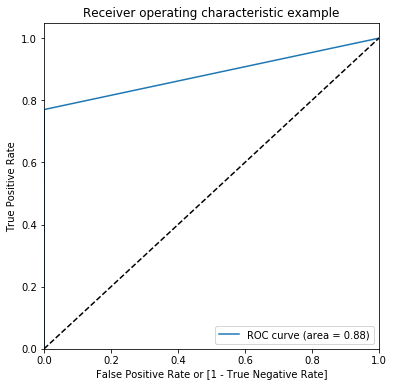

(array([0.00000000e+00, 4.80684683e-04, 1.00000000e+00]),
 array([0.        , 0.77027027, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [114]:
draw_roc(y_pred_final.Class, y_pred_final.predicted)

In [115]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted) roc_auc_score(yvl,lr.predict(xvl))
"{:2.3f}".format(metrics.roc_auc_score(y_pred_final.Class, y_pred_final.predicted))

'0.885'

### Final evaluation metric used is roc_auc score  for Logistic regression.
 - Mean CV score of roc_auc_score on train data :0.831  
 - roc_auc_score on test data :0.885 

### SVM

In [333]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_p, y_train)

SVC()

#### Hyperparameter Tuning with Stratified Kfold for SVM

In [334]:
# Performing Grid Search to pick best C and gamma values (taking 103.3 minutes to finish)
from sklearn.model_selection import GridSearchCV
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
params = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001]}
clf = GridSearchCV(svm.SVC(),cv=kf,param_grid=params,scoring='roc_auc',refit=True,n_jobs=-1,verbose=1)
clf.fit(X_train_p, y_train)
print('Best roc_auc: {:.4}, with best estimator: {}'.format(clf.best_score_, clf.best_estimator_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 100.9min finished


Best roc_auc: 0.9752, with best estimator: SVC(C=10, gamma=0.001)


In [335]:
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
#pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_p, y_train):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train_p.loc[train_index],X_train_p.loc[test_index]
    ytr,yvl = y_train.loc[train_index],y_train.loc[test_index]
    
    #model - using the best 'C' and gamma value that we got in above step
    clf = svm.SVC(C=10, gamma=0.001)
    clf.fit(xtr,ytr)
    score = roc_auc_score(yvl,clf.predict(xvl))  
    print('ROC AUC score:',score)
    cv_score.append(score)    
    #pred_test = clf.predict(X_test_p)[:,1]
    #pred_test_full +=pred_test
    i+=1

1 of KFold 3
ROC AUC score: 0.9173083981072473
2 of KFold 3
ROC AUC score: 0.9216712980561271
3 of KFold 3
ROC AUC score: 0.8726713527865487


In [336]:
#Mean of CV Score
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Cv [0.9173083981072473, 0.9216712980561271, 0.8726713527865487] 
Mean cv Score 0.9038836829833077


In [337]:
y_pred = clf.predict(X_test_p)
confusion_matrix(y_test, y_pred)

array([[85269,    26],
       [   34,   114]])

In [338]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [339]:
np.array(y_test)

array([0, 0, 0, ..., 0, 0, 0])

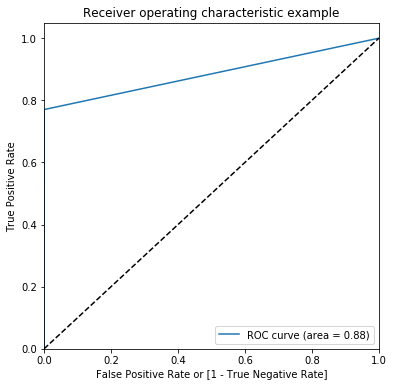

(array([0.00000000e+00, 3.04824433e-04, 1.00000000e+00]),
 array([0.        , 0.77027027, 1.        ]),
 array([2, 1, 0]))

In [340]:
draw_roc(np.array(y_test), y_pred)

In [341]:
"{:2.3f}".format(metrics.roc_auc_score(y_test, y_pred))

'0.885'

### For SVM:
- CV Mean score of roc_auc score on train data is - 0.90
- roc_auc score on Test data is - 0.89

### KNN 
#### Commented the below code for KNN as it was taking long time to execute and would not be ideal for real time. However appropriate k=3 and auc_roc score was coming up as 0.87 for test data when we executed 1st time. Below are the results and commented code for same.

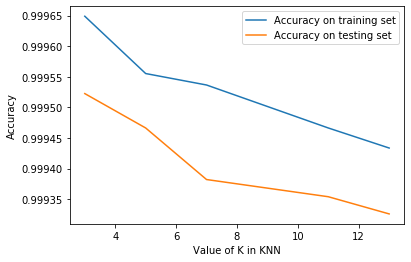

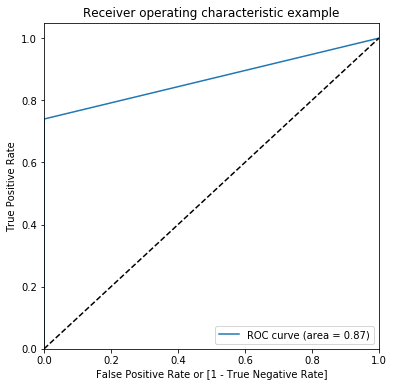

In [342]:
#from sklearn.neighbors import KNeighborsClassifier

k_range = [3,5,7,11,13] #range(1, 11)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_p,y_train)
    score1.append(knn.score(X_train_p,y_train))
    score2.append(knn.score(X_test_p,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_p,y_train)
print('Accuracy of KNN n=3 on the testing dataset is :{:.3f}'.format(knn.score(X_test,y_test)))#0.99

y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)


roc_auc_score(y_test,y_pred) # 0.869

draw_roc(np.array(y_test), y_pred)

In [343]:
#from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
#param_grid = {'n_neighbors':np.arange(1,20)}

In [344]:
#knn = KNeighborsClassifier()
#knn_cv= GridSearchCV(knn,param_grid,cv=5)
#knn_cv.fit(X_train_p,y_train)

In [345]:
#knn_cv.best_score_

In [346]:
#knn_cv.best_params_

### Random Forest

In [162]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
scorer = {'AUC': 'roc_auc','recall_score': make_scorer(recall_score)}

In [29]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier #import the package

param_grid = {
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 401, 200), 
    'n_estimators': range(30, 90, 30),
    'max_depth': [5, 10],
    'max_features': [8, 14]
}
# Create the model
rf = RandomForestClassifier(oob_score = True, random_state = 0)

In [30]:
#perform cross validation
rf_grid =GridSearchCV(rf, param_grid, scoring=scorer, refit='AUC', cv = folds, n_jobs = -1,verbose = 1)

In [29]:
#perform hyperparameter tuning
rf_grid.fit(X_train_p, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 41.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'

In [33]:
# Cross-Validation Results
pd.set_option('display.max_columns', 500)
pd.DataFrame(rf_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,37.515178,0.798700,0.332732,0.045351,5,8,100,200,30,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.986914,0.982005,0.981672,0.938110,0.964751,0.970690,0.017936,28,0.652174,0.565217,0.536232,0.681159,0.558824,0.598721,0.057048,11
1,78.477693,1.343736,0.658552,0.195823,5,8,100,200,60,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.986665,0.990697,0.978831,0.939474,0.975763,0.974286,0.018206,17,0.652174,0.608696,0.536232,0.652174,0.588235,0.607502,0.043459,9
2,40.925232,1.535996,0.314231,0.010099,5,8,100,400,30,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.989464,0.988052,0.981931,0.937632,0.964346,0.972285,0.019497,25,0.594203,0.579710,0.536232,0.637681,0.529412,0.575448,0.039750,19
3,99.975817,1.692048,0.586489,0.059589,5,8,100,400,60,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.988345,0.990868,0.978003,0.940009,0.971787,0.973802,0.018256,20,0.623188,0.565217,0.536232,0.652174,0.558824,0.587127,0.043366,17
4,52.910444,4.625845,0.386196,0.063987,5,8,200,200,30,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.993008,0.987493,0.972189,0.950476,0.967874,0.974208,0.015082,18,0.521739,0.521739,0.405797,0.550725,0.485294,0.497059,0.050131,25
5,95.738860,1.267244,0.654115,0.046538,5,8,200,200,60,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.991441,0.989707,0.970319,0.949203,0.967781,0.973690,0.015605,21,0.521739,0.521739,0.405797,0.521739,0.500000,0.494203,0.044998,29
6,49.255809,1.300434,0.356241,0.036635,5,8,200,400,30,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.993008,0.987493,0.972189,0.950476,0.967874,0.974208,0.015082,18,0.521739,0.521739,0.405797,0.550725,0.485294,0.497059,0.050131,25
7,97.681832,1.536112,0.624760,0.042169,5,8,200,400,60,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.991441,0.989707,0.970319,0.949203,0.967781,0.973690,0.015605,21,0.521739,0.521739,0.405797,0.521739,0.500000,0.494203,0.044998,29
8,78.225305,2.779529,0.312684,0.025019,5,14,100,200,30,"{'max_depth': 5, 'max_features': 14, 'min_samp...",0.985735,0.990299,0.958356,0.940158,0.961691,0.967248,0.018531,31,0.695652,0.637681,0.565217,0.666667,0.617647,0.636573,0.044378,3
9,146.838027,1.538911,0.570075,0.036035,5,14,100,200,60,"{'max_depth': 5, 'max_features': 14, 'min_samp...",0.986345,0.990773,0.973834,0.939185,0.967730,0.971573,0.018197,26,0.681159,0.637681,0.579710,0.681159,0.617647,0.639471,0.038799,1


In [32]:
#print the optimum value of hyperparameters
print('We can get AUC of',rf_grid.best_score_,'using',rf_grid.best_params_)

We can get AUC of 0.9775830747988247 using {'max_depth': 10, 'max_features': 14, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 60}


#### AUC Score for random forest - 0.978

### XGBoost

In [52]:
# XGBoost
param_xgb1 = {'n_estimators':[1000],
 'max_depth':[6],
 'min_child_weight':[3],
 'gamma':[0],
 'subsample':[0.8],
 'colsample_bytree':[0.8],
 'objective': ['binary:logistic'],
 'nthread':[-1],
 'scale_pos_weight':[1],
 'seed':[0],
 'tree_method':['hist'],
 'early_stopping_rounds':[10]
}
xgb1 = XGBClassifier(learning_rate =0.1)

xgb_grid_init =GridSearchCV(xgb1, param_xgb1, scoring=scorer, refit='AUC', cv = folds, n_jobs = -1,verbose = 1)

In [53]:
xgb_grid_init.fit(X_train_p, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.6min remaining:  9.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logi...
             param_grid={'colsample_bytree': [0.8],
                         'early_stopping_rounds': [10], 'gamma': [0],
                         'max_depth': [6], 'min_child_weight': [3],
                         'n_estimators': [1000], 'nthread': [-1],
                         'objective': ['binary:logistic'],
                         'scale_pos_weight': [1], 'seed': [0],
  

In [55]:
# Cross-Validation Results
pd.set_option('display.max_columns', 500)
pd.DataFrame(xgb_grid_init.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_early_stopping_rounds,param_gamma,param_max_depth,param_min_child_weight,param_n_estimators,param_nthread,param_objective,param_scale_pos_weight,param_seed,param_subsample,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,399.069395,5.80585,2.767989,0.537494,0.8,10,0,6,3,1000,-1,binary:logistic,1,0,0.8,"{'colsample_bytree': 0.8, 'early_stopping_roun...",0.996466,0.986948,0.973341,0.963989,0.979041,0.979957,0.011145,1,0.855072,0.811594,0.768116,0.782609,0.779412,0.799361,0.031331,1


In [58]:
#print the optimum value of hyperparameters
print('We can get AUC of',xgb_grid_init.best_score_,'using',xgb_grid_init.best_params_)

We can get AUC of 0.9799571341602841 using {'colsample_bytree': 0.8, 'early_stopping_rounds': 10, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 1000, 'nthread': -1, 'objective': 'binary:logistic', 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8}


In [ ]:
#Even with single xgb(not done any hyperparameter tuning), we are getting a very good AUC(~0.98) as well as recall(~80%)
#on train data
#let's do some hyperparameter tuning

In [29]:
param_xgb2 = {'n_estimators':[1000],
 'max_depth':[5, 8],
 'min_child_weight':[1, 5],
 'gamma':[0],
 'subsample':[0.6,0.9],
 'colsample_bytree':[0.6,0.9],
 'objective': ['binary:logistic'],
 'nthread':[-1],
 'scale_pos_weight':[1],
 'learning_rate':[0.05,0.2],
 'seed':[0],
 'reg_alpha':[ 1e-2, 0.1],
 'tree_method':['hist'],
 'early_stopping_rounds':[10]
}
xgb2 = XGBClassifier(learning_rate =0.1)

xgb_grid =GridSearchCV(xgb2, param_xgb2, scoring=scorer, refit='AUC', cv = folds, n_jobs = -1,verbose = 1)

In [30]:
xgb_grid.fit(X_train_p, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 64.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 262.1min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 503.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logi...
                         'learning_rate': [0.05, 0.2], 'max_depth': [5, 8],
                         'min_child_weight': [1, 5], 'n_estimators': [1000],
                         'nthread': [-1], 'objective': ['binary:logistic'],
                         'reg_alpha': [0.01, 0.1], 'scale_pos_weight': [1],
                         'seed': [0], 'subsample': [0.6, 0.9]},
           

In [34]:
# Cross-Validation Results
pd.set_option('display.max_rows', 500)
a = pd.DataFrame(xgb_grid.cv_results_)
a

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_early_stopping_rounds,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,...,std_test_AUC,rank_test_AUC,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,1206.171701,32.410459,6.098126,0.103732,0.6,10,0,0.05,5,1,...,0.010356,11,0.855072,0.811594,0.782609,0.782609,0.779412,0.802259,0.028881,12
1,1078.541935,261.831581,6.657080,0.204928,0.6,10,0,0.05,5,1,...,0.008949,5,0.884058,0.797101,0.768116,0.797101,0.779412,0.805158,0.040963,5
2,696.065473,8.058510,6.137538,0.135099,0.6,10,0,0.05,5,1,...,0.010927,33,0.869565,0.797101,0.768116,0.768116,0.779412,0.796462,0.038058,34
3,788.063765,10.453627,6.655988,0.207179,0.6,10,0,0.05,5,1,...,0.008050,3,0.855072,0.811594,0.768116,0.782609,0.779412,0.799361,0.031331,20
4,577.095065,9.321309,4.684599,0.121718,0.6,10,0,0.05,5,5,...,0.010117,29,0.840580,0.797101,0.753623,0.782609,0.764706,0.787724,0.030333,53
5,687.900614,11.048514,5.265371,0.117854,0.6,10,0,0.05,5,5,...,0.010521,40,0.884058,0.811594,0.724638,0.797101,0.779412,0.799361,0.051594,20
6,587.744736,11.576549,4.668063,0.141210,0.6,10,0,0.05,5,5,...,0.009681,6,0.869565,0.797101,0.724638,0.782609,0.764706,0.787724,0.047585,53
7,691.858426,11.014310,5.337657,0.142761,0.6,10,0,0.05,5,5,...,0.010171,20,0.884058,0.797101,0.724638,0.797101,0.779412,0.796462,0.051231,30
8,795.611528,15.173689,6.134746,0.122700,0.6,10,0,0.05,8,1,...,0.010798,13,0.840580,0.797101,0.782609,0.782609,0.779412,0.796462,0.022897,30
9,893.582167,17.440568,6.728475,0.295121,0.6,10,0,0.05,8,1,...,0.009254,2,0.869565,0.811594,0.782609,0.782609,0.779412,0.805158,0.034262,5


In [32]:
#print the optimum value of hyperparameters
print('We can get AUC of',xgb_grid.best_score_,'using',xgb_grid.best_params_)

We can get AUC of 0.98244374202561 using {'colsample_bytree': 0.6, 'early_stopping_rounds': 10, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 1000, 'nthread': -1, 'objective': 'binary:logistic', 'reg_alpha': 0.01, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.9}


## Best model seems xgboost

#### Proceeding with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [33]:
#initialise the model with optimum hyperparameters
clf =  XGBClassifier(colsample_bytree= 0.6,early_stopping_rounds= 10,learning_rate= 0.2, max_depth= 8, min_child_weight= 1,
                     n_estimators= 1000, nthread= -1, objective= 'binary:logistic', reg_alpha= 0.01, scale_pos_weight= 1, 
                     seed= 0,tree_method='hist', subsample= 0.9) 
clf.fit(X_train_p, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=10, gamma=0, learning_rate=0.2,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=1, nthread=-1,
              objective='binary:logistic', random_state=0, reg_alpha=0.01,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
              subsample=0.9, verbosity=1)

In [36]:
# roc_auc
auc = roc_auc_score(y_test, clf.predict_proba(X_test_p.values)[:,1])
print(auc) #--> #print the evaluation score on the X_test by choosing the best evaluation metric

0.975982480516744


In [38]:
# classification_report
class_rep = classification_report(y_test, clf.predict(X_test_p.values))
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.75      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 10
3rd Top var = 14


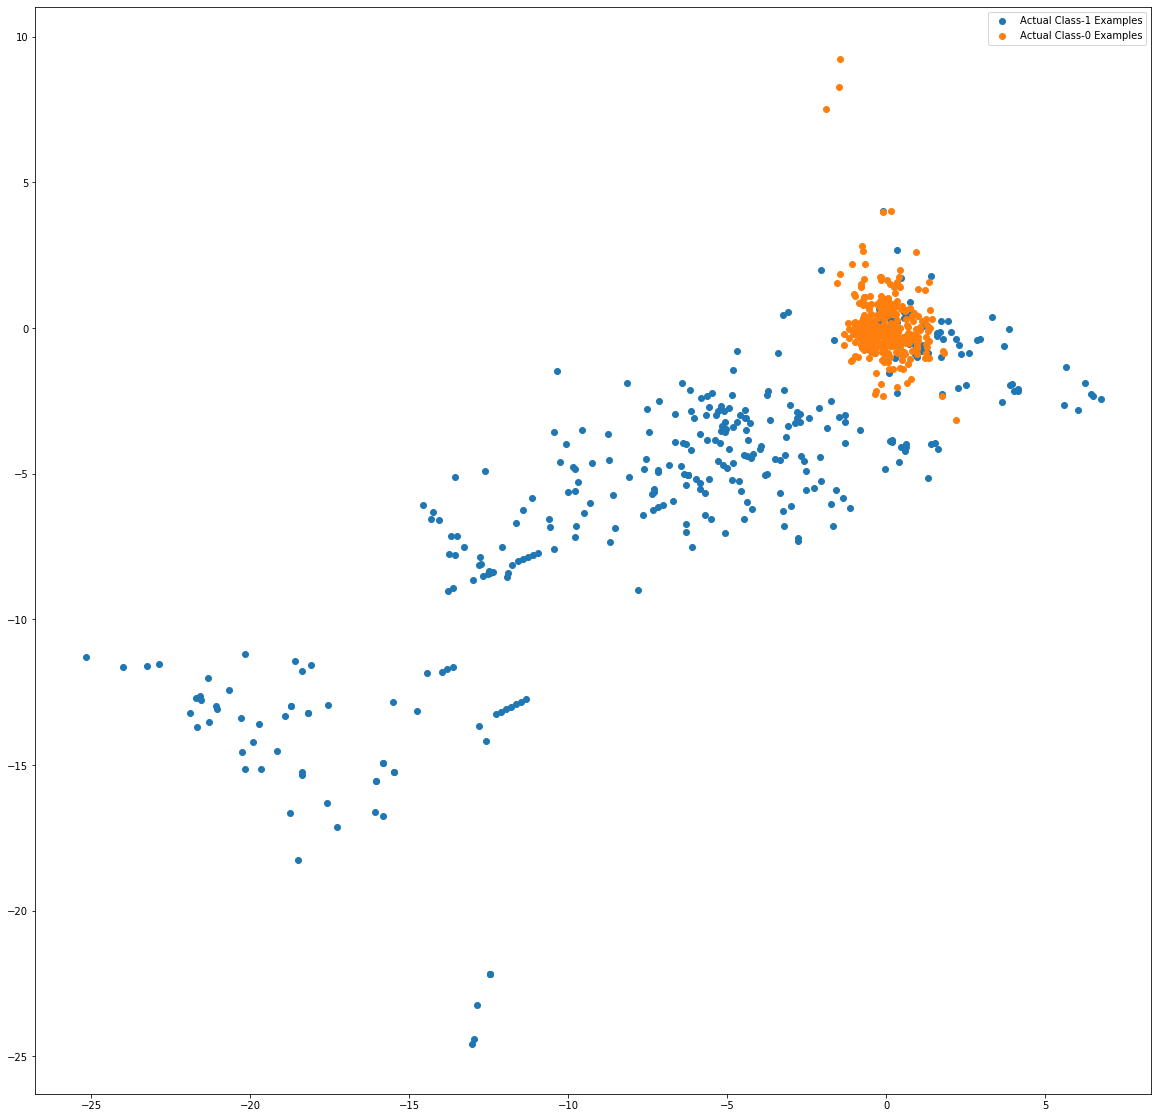

In [39]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- SMOTE
- ADASYN

### Print the class distribution after applying SMOTE 

Using TensorFlow backend.


(398040, 29)
(85443, 29)


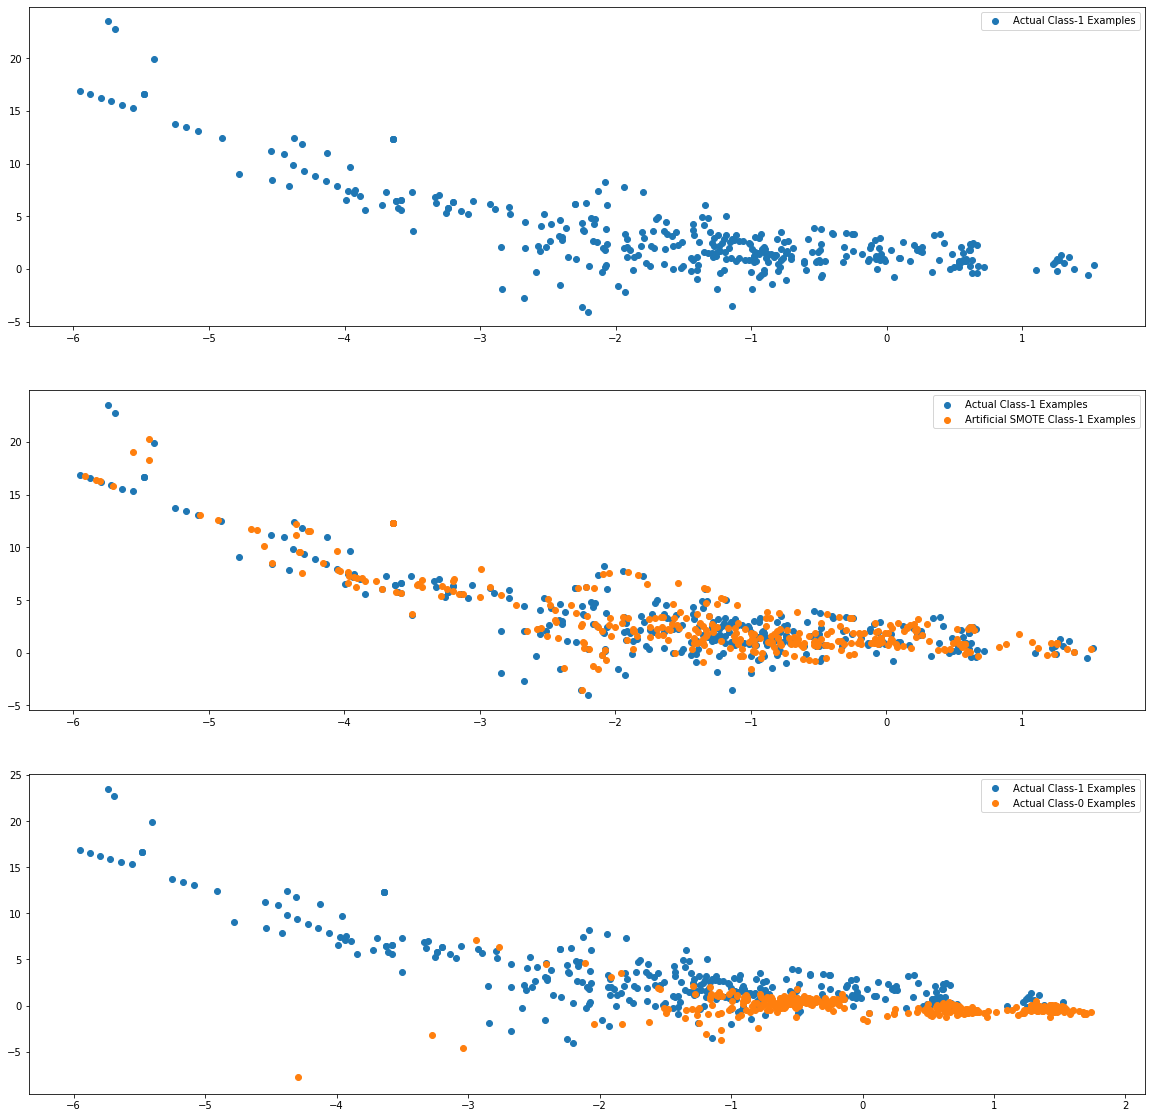

In [17]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_p, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train_p.shape[0]:]

X_train_1 = X_train_p.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_p.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()
print(X_train_smote.shape)
print(X_test_p.shape)
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [116]:
#Converting X train dataset into dataframe
X_train_smote=pd.DataFrame(X_train_smote)
X_train_smote.columns=X_train_p.columns
X_train_smote.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.267697,0.404782,-0.037582,-0.495586,0.417461,-0.450219,0.677525,-0.079224,-0.119844,-0.170534,...,-0.052398,-0.305036,-0.796136,0.056456,-0.669016,-0.954144,0.386449,0.578464,0.267038,-0.827435
1,1.167168,-0.201782,-1.385696,0.868101,0.434724,-0.791180,0.737052,-0.437967,-0.246955,0.508288,...,-0.042231,0.398622,0.722406,-0.385755,-0.641055,0.951240,-0.898773,-0.195537,-0.166521,1.439423
2,-0.792373,-2.385479,-0.987745,0.403150,-1.478402,-0.554012,1.280349,-0.714879,-1.218243,0.119978,...,2.863557,0.486079,-1.922162,-1.734577,0.838645,-0.304635,1.660302,-0.783775,0.704921,2.086525
3,-0.538573,0.640442,-0.551757,-0.515036,1.826026,2.172282,0.039457,0.777160,-0.250948,0.158587,...,0.289018,-0.251382,-0.976642,0.224379,1.768707,-1.469473,0.177960,0.016490,0.784726,-0.917375
4,-0.596658,0.056559,0.052907,-1.351635,1.933233,2.527105,-0.156943,0.944995,0.474378,-0.229042,...,0.196280,0.245843,1.050549,-0.527474,1.382820,-0.198843,1.242931,0.173308,-0.093808,-0.917375


In [117]:
y_train_smote=pd.DataFrame(y_train_smote)
y_train_smote.head()

,0
0,0
1,0
2,0
3,0
4,0


### Logistic Regression on SMOTE Dataset

In [121]:
from sklearn import linear_model #import the package
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logm1 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398010
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jun 2020   Deviance:                          nan
Time:                        11:27:52   Pearson chi2:                 8.84e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4780      0.024   -188.574      0.000      -4.525      -4.431
V1             0.6579      0.019     34.354      0.000       0.620       0.695
V2            -0.4871      0.019    -25.427      0.000      -0.525      -0.450
V3             0.0580      0.011      5.073      0.000       0.036       0.080
V4             2.2399      0.020    113.464      0.000       2.201       2.279
V5             0.2513      0.012     20.565      0.000       0.227       0.275
V6            -0.0006      0.012     -0.052      0.958      -0.024       0.023
V7            -0.3259      0.013    -25.834      0.000      -0.351      -0.301
V8            -0.8802      0.013    -66.063      0.000      -0.906      -0.854
V9            -0.7001      0.023    -29.811      0.000      -0.746      -0.654
V10           -1.9374      0.034    -57.308      0.000      -2.004      -1.871
V11            0.8535      0.014     61.785      0.000       0.826       0.881
V12           -1.2455      0.021    -60.583      0.000      -1.286      -1.205
V13           -0.3926      0.010    -40.625      0.000      -0.412      -0.374
V14           -1.3569      0.018    -76.528      0.000      -1.392      -1.322
V15            0.0587      0.009      6.211      0.000       0.040       0.077
V16           -0.7820      0.018    -44.125      0.000      -0.817      -0.747
V17           -0.7593      0.019    -38.994      0.000      -0.797      -0.721
V18           -0.2364      0.015    -16.121      0.000      -0.265      -0.208
V19            0.1116      0.011     10.374      0.000       0.091       0.133
V20           -0.2442      0.014    -17.926      0.000      -0.271      -0.217
V21            0.3299      0.010     34.619      0.000       0.311       0.349
V22            0.2879      0.011     25.311      0.000       0.266       0.310
V23           -0.1867      0.006    -30.308      0.000      -0.199      -0.175
V24           -0.1139      0.011    -10.091      0.000      -0.136      -0.092
V25            0.0336      0.011      3.105      0.002       0.012       0.055
V26           -0.3013      0.013    -23.700      0.000      -0.326      -0.276
V27           -0.1312      0.015     -8.788      0.000      -0.160      -0.102
V28            0.0968      0.010      9.629      0.000       0.077       0.117
Amount        -0.0857      0.012     -7.216      0.000      -0.109      -0.062
==============================================================================
"""

In [122]:
X=X_train_smote
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,V10,26.25
16,V17,21.96
6,V7,19.27
1,V2,17.55
15,V16,16.41
13,V14,14.78
4,V5,13.19
2,V3,11.63
11,V12,11.28
17,V18,11.06


In [123]:
#Dropping columns with high VIF or high p-value
final_list=list(X_train_smote.columns)
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V10')

logm2 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[final_list])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398011
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47098.
Date:                Mon, 22 Jun 2020   Deviance:                       94196.
Time:                        11:29:10   Pearson chi2:                 1.55e+12
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8618      0.017   -226.327      0.000      -3.895      -3.828
V1             0.0513      0.011      4.467      0.000       0.029       0.074
V2            -0.0504      0.011     -4.739      0.000      -0.071      -0.030
V3            -0.2097      0.010    -21.502      0.000      -0.229      -0.191
V4             1.5307      0.012    132.746      0.000       1.508       1.553
V5            -0.0085      0.010     -0.834      0.405      -0.029       0.012
V6            -0.1552      0.011    -13.587      0.000      -0.178      -0.133
V7            -0.1541      0.009    -17.509      0.000      -0.171      -0.137
V8            -0.4270      0.008    -55.320      0.000      -0.442      -0.412
V9            -0.2059      0.011    -19.088      0.000      -0.227      -0.185
V11            0.5430      0.010     55.369      0.000       0.524       0.562
V12           -0.7196      0.012    -59.620      0.000      -0.743      -0.696
V13           -0.4312      0.009    -45.963      0.000      -0.450      -0.413
V14           -1.0621      0.011   -100.265      0.000      -1.083      -1.041
V15            0.0985      0.009     11.153      0.000       0.081       0.116
V16           -0.4408      0.011    -40.386      0.000      -0.462      -0.419
V17            0.0002      0.008      0.018      0.986      -0.016       0.017
V18           -0.0189      0.010     -1.830      0.067      -0.039       0.001
V19           -0.0967      0.008    -11.417      0.000      -0.113      -0.080
V20            0.0930      0.008     12.170      0.000       0.078       0.108
V21            0.1708      0.008     21.788      0.000       0.155       0.186
V22            0.2682      0.010     25.676      0.000       0.248       0.289
V23           -0.1704      0.006    -29.007      0.000      -0.182      -0.159
V24           -0.1075      0.011     -9.804      0.000      -0.129      -0.086
V25            0.3446      0.009     36.903      0.000       0.326       0.363
V26           -0.3751      0.012    -31.041      0.000      -0.399      -0.351
V27            0.1061      0.010     11.033      0.000       0.087       0.125
V28            0.1356      0.009     15.516      0.000       0.118       0.153
Amount        -0.0492      0.011     -4.290      0.000      -0.072      -0.027
==============================================================================
"""

In [124]:
X=X_train_smote[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,V17,21.91
6,V7,18.10
1,V2,17.54
14,V16,16.07
12,V14,13.70
4,V5,12.89
2,V3,11.58
10,V12,11.17
16,V18,10.93
9,V11,9.63


In [125]:
final_list.remove('V17')
logm3 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[final_list])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398012
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47098.
Date:                Mon, 22 Jun 2020   Deviance:                       94196.
Time:                        11:30:25   Pearson chi2:                 1.56e+12
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8618      0.017   -226.362      0.000      -3.895      -3.828
V1             0.0513      0.011      4.546      0.000       0.029       0.073
V2            -0.0504      0.011     -4.742      0.000      -0.071      -0.030
V3            -0.2097      0.010    -21.507      0.000      -0.229      -0.191
V4             1.5307      0.011    133.408      0.000       1.508       1.553
V5            -0.0085      0.010     -0.840      0.401      -0.028       0.011
V6            -0.1552      0.011    -13.587      0.000      -0.178      -0.133
V7            -0.1541      0.009    -17.515      0.000      -0.171      -0.137
V8            -0.4270      0.007    -58.454      0.000      -0.441      -0.413
V9            -0.2059      0.011    -19.118      0.000      -0.227      -0.185
V11            0.5430      0.010     56.882      0.000       0.524       0.562
V12           -0.7197      0.012    -60.761      0.000      -0.743      -0.696
V13           -0.4313      0.009    -45.991      0.000      -0.450      -0.413
V14           -1.0622      0.010   -109.946      0.000      -1.081      -1.043
V15            0.0986      0.009     11.184      0.000       0.081       0.116
V16           -0.4408      0.011    -40.799      0.000      -0.462      -0.420
V18           -0.0189      0.010     -1.836      0.066      -0.039       0.001
V19           -0.0967      0.008    -11.420      0.000      -0.113      -0.080
V20            0.0930      0.008     12.345      0.000       0.078       0.108
V21            0.1708      0.008     21.788      0.000       0.155       0.186
V22            0.2682      0.010     25.820      0.000       0.248       0.289
V23           -0.1704      0.006    -29.044      0.000      -0.182      -0.159
V24           -0.1075      0.011     -9.807      0.000      -0.129      -0.086
V25            0.3446      0.009     36.903      0.000       0.326       0.363
V26           -0.3751      0.012    -31.046      0.000      -0.399      -0.351
V27            0.1061      0.009     11.205      0.000       0.088       0.125
V28            0.1356      0.009     15.717      0.000       0.119       0.152
Amount        -0.0492      0.011     -4.292      0.000      -0.072      -0.027
==============================================================================
"""

In [126]:
X=X_train_smote[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,V7,17.87
1,V2,16.81
14,V16,13.93
12,V14,13.68
4,V5,12.47
2,V3,11.57
10,V12,10.86
9,V11,9.57
15,V18,8.57
8,V9,7.34


In [127]:
final_list.remove('V5')
logm4 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[final_list])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398013
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47098.
Date:                Mon, 22 Jun 2020   Deviance:                       94197.
Time:                        11:31:31   Pearson chi2:                 1.51e+12
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8613      0.017   -226.529      0.000      -3.895      -3.828
V1             0.0526      0.011      4.702      0.000       0.031       0.075
V2            -0.0478      0.010     -4.698      0.000      -0.068      -0.028
V3            -0.2095      0.010    -21.497      0.000      -0.229      -0.190
V4             1.5293      0.011    134.763      0.000       1.507       1.552
V6            -0.1512      0.010    -14.614      0.000      -0.171      -0.131
V7            -0.1537      0.009    -17.490      0.000      -0.171      -0.136
V8            -0.4244      0.007    -64.432      0.000      -0.437      -0.411
V9            -0.2052      0.011    -19.101      0.000      -0.226      -0.184
V11            0.5430      0.010     56.881      0.000       0.524       0.562
V12           -0.7194      0.012    -60.753      0.000      -0.743      -0.696
V13           -0.4317      0.009    -46.081      0.000      -0.450      -0.413
V14           -1.0622      0.010   -109.957      0.000      -1.081      -1.043
V15            0.0996      0.009     11.413      0.000       0.082       0.117
V16           -0.4402      0.011    -40.809      0.000      -0.461      -0.419
V18           -0.0195      0.010     -1.905      0.057      -0.040       0.001
V19           -0.0965      0.008    -11.403      0.000      -0.113      -0.080
V20            0.0936      0.008     12.449      0.000       0.079       0.108
V21            0.1707      0.008     21.790      0.000       0.155       0.186
V22            0.2672      0.010     25.881      0.000       0.247       0.287
V23           -0.1700      0.006    -29.070      0.000      -0.181      -0.158
V24           -0.1051      0.011     -9.947      0.000      -0.126      -0.084
V25            0.3456      0.009     37.352      0.000       0.328       0.364
V26           -0.3748      0.012    -31.035      0.000      -0.399      -0.351
V27            0.1064      0.009     11.236      0.000       0.088       0.125
V28            0.1361      0.009     15.795      0.000       0.119       0.153
Amount        -0.0458      0.011     -4.272      0.000      -0.067      -0.025
==============================================================================
"""

In [128]:
X=X_train_smote[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,V7,16.31
1,V2,14.69
13,V16,13.92
11,V14,13.67
2,V3,11.55
9,V12,10.86
8,V11,9.57
14,V18,8.12
7,V9,7.34
3,V4,6.70


In [129]:
final_list.remove('V7')
logm5 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[final_list])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398014
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47254.
Date:                Mon, 22 Jun 2020   Deviance:                       94507.
Time:                        11:32:29   Pearson chi2:                 7.67e+11
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8791      0.017   -226.789      0.000      -3.913      -3.846
V1             0.0510      0.011      4.590      0.000       0.029       0.073
V2            -0.0170      0.010     -1.698      0.090      -0.037       0.003
V3            -0.1894      0.010    -19.906      0.000      -0.208      -0.171
V4             1.5646      0.011    137.058      0.000       1.542       1.587
V6            -0.2076      0.010    -21.122      0.000      -0.227      -0.188
V8            -0.3813      0.006    -64.342      0.000      -0.393      -0.370
V9            -0.1778      0.011    -16.548      0.000      -0.199      -0.157
V11            0.5436      0.010     57.061      0.000       0.525       0.562
V12           -0.6867      0.012    -58.688      0.000      -0.710      -0.664
V13           -0.4402      0.009    -47.035      0.000      -0.459      -0.422
V14           -1.0476      0.010   -109.529      0.000      -1.066      -1.029
V15            0.0898      0.009     10.322      0.000       0.073       0.107
V16           -0.4501      0.011    -41.110      0.000      -0.472      -0.429
V18           -0.0251      0.010     -2.403      0.016      -0.046      -0.005
V19           -0.0874      0.009    -10.227      0.000      -0.104      -0.071
V20            0.0857      0.007     11.616      0.000       0.071       0.100
V21            0.1774      0.008     23.340      0.000       0.163       0.192
V22            0.2530      0.010     24.565      0.000       0.233       0.273
V23           -0.1843      0.006    -32.100      0.000      -0.196      -0.173
V24           -0.1268      0.011    -12.003      0.000      -0.147      -0.106
V25            0.3338      0.009     36.270      0.000       0.316       0.352
V26           -0.3352      0.012    -28.610      0.000      -0.358      -0.312
V27            0.1326      0.009     15.243      0.000       0.116       0.150
V28            0.1581      0.008     18.720      0.000       0.142       0.175
Amount        -0.0545      0.011     -5.092      0.000      -0.075      -0.034
==============================================================================
"""

In [130]:
X=X_train_smote[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,V16,13.66
10,V14,13.21
2,V3,11.00
8,V12,10.83
1,V2,10.38
7,V11,9.54
13,V18,7.40
6,V9,7.27
3,V4,6.69
0,V1,4.49


In [131]:
final_list.remove('V16')
logm6 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[final_list])), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398015
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48105.
Date:                Mon, 22 Jun 2020   Deviance:                       96209.
Time:                        11:33:22   Pearson chi2:                 4.40e+11
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8464      0.017   -227.140      0.000      -3.880      -3.813
V1            -0.0204      0.011     -1.922      0.055      -0.041       0.000
V2             0.0567      0.010      5.763      0.000       0.037       0.076
V3            -0.1811      0.010    -18.982      0.000      -0.200      -0.162
V4             1.5591      0.011    137.002      0.000       1.537       1.581
V6            -0.2339      0.010    -23.288      0.000      -0.254      -0.214
V8            -0.3673      0.006    -63.062      0.000      -0.379      -0.356
V9            -0.0969      0.011     -9.180      0.000      -0.118      -0.076
V11            0.5314      0.009     57.483      0.000       0.513       0.550
V12           -0.6444      0.011    -58.393      0.000      -0.666      -0.623
V13           -0.4672      0.009    -49.928      0.000      -0.486      -0.449
V14           -0.9915      0.009   -111.845      0.000      -1.009      -0.974
V15            0.0935      0.009     10.771      0.000       0.077       0.111
V18           -0.1436      0.010    -14.341      0.000      -0.163      -0.124
V19            0.0196      0.008      2.407      0.016       0.004       0.036
V20            0.1185      0.007     15.920      0.000       0.104       0.133
V21            0.2136      0.007     28.663      0.000       0.199       0.228
V22            0.3086      0.010     30.551      0.000       0.289       0.328
V23           -0.1942      0.006    -34.333      0.000      -0.205      -0.183
V24           -0.1205      0.011    -11.365      0.000      -0.141      -0.100
V25            0.3357      0.009     36.838      0.000       0.318       0.354
V26           -0.3473      0.012    -29.770      0.000      -0.370      -0.324
V27            0.1070      0.009     11.983      0.000       0.090       0.125
V28            0.1599      0.009     18.734      0.000       0.143       0.177
Amount        -0.0096      0.011     -0.909      0.363      -0.030       0.011
==============================================================================
"""

In [132]:
X=X_train_smote[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,V14,13.01
2,V3,10.99
8,V12,10.49
1,V2,10.36
7,V11,9.31
6,V9,7.27
3,V4,6.69
12,V18,5.01
0,V1,4.45
15,V21,3.86


In [133]:
final_list.remove('V14')
logm7 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[final_list])), family = sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398016
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57560.
Date:                Mon, 22 Jun 2020   Deviance:                   1.1512e+05
Time:                        11:34:13   Pearson chi2:                 5.56e+13
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7219      0.016   -240.097      0.000      -3.752      -3.691
V1            -0.1619      0.010    -16.659      0.000      -0.181      -0.143
V2             0.2988      0.009     32.433      0.000       0.281       0.317
V3            -0.5198      0.009    -58.356      0.000      -0.537      -0.502
V4             1.6214      0.011    152.695      0.000       1.601       1.642
V6            -0.3194      0.010    -33.211      0.000      -0.338      -0.301
V8            -0.4367      0.007    -61.521      0.000      -0.451      -0.423
V9            -0.1348      0.010    -13.945      0.000      -0.154      -0.116
V11            0.7801      0.008     99.057      0.000       0.765       0.796
V12           -0.7421      0.009    -86.816      0.000      -0.759      -0.725
V13           -0.4787      0.008    -59.959      0.000      -0.494      -0.463
V15            0.1533      0.008     18.977      0.000       0.137       0.169
V18            0.0335      0.008      4.169      0.000       0.018       0.049
V19           -0.0477      0.007     -6.482      0.000      -0.062      -0.033
V20            0.0605      0.007      8.525      0.000       0.047       0.074
V21            0.1828      0.006     28.808      0.000       0.170       0.195
V22            0.2011      0.009     22.428      0.000       0.183       0.219
V23           -0.0775      0.006    -13.658      0.000      -0.089      -0.066
V24           -0.1740      0.010    -17.585      0.000      -0.193      -0.155
V25            0.4202      0.008     50.221      0.000       0.404       0.437
V26           -0.2364      0.010    -24.142      0.000      -0.256      -0.217
V27            0.0295      0.008      3.646      0.000       0.014       0.045
V28            0.1630      0.009     18.828      0.000       0.146       0.180
Amount         0.0489      0.010      5.086      0.000       0.030       0.068
==============================================================================
"""

In [134]:
X=X_train_smote[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,V3,10.68
1,V2,10.09
8,V12,9.09
7,V11,8.00
6,V9,7.07
3,V4,6.19
11,V18,4.98
0,V1,4.45
14,V21,3.77
5,V8,3.52


In [135]:
final_list.remove('V3')
logm8 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[final_list])), family = sm.families.Binomial())
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398017
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jun 2020   Deviance:                          inf
Time:                        11:34:57   Pearson chi2:                 4.50e+15
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7898      0.016   -243.103      0.000      -3.820      -3.759
V1             0.0158      0.009      1.663      0.096      -0.003       0.034
V2             0.4470      0.009     49.924      0.000       0.429       0.465
V4             1.6594      0.010    159.244      0.000       1.639       1.680
V6            -0.5619      0.010    -56.950      0.000      -0.581      -0.543
V8            -0.4598      0.005    -86.396      0.000      -0.470      -0.449
V9            -0.1780      0.009    -18.965      0.000      -0.196      -0.160
V11            0.8474      0.008    110.774      0.000       0.832       0.862
V12           -0.7847      0.008    -93.964      0.000      -0.801      -0.768
V13           -0.4963      0.008    -63.479      0.000      -0.512      -0.481
V15            0.0882      0.008     11.274      0.000       0.073       0.104
V18            0.0325      0.008      4.163      0.000       0.017       0.048
V19           -0.0207      0.007     -2.894      0.004      -0.035      -0.007
V20            0.0663      0.008      8.804      0.000       0.052       0.081
V21            0.2101      0.006     33.674      0.000       0.198       0.222
V22            0.2217      0.009     24.600      0.000       0.204       0.239
V23           -0.0588      0.006     -9.673      0.000      -0.071      -0.047
V24           -0.2887      0.010    -28.144      0.000      -0.309      -0.269
V25            0.4502      0.008     54.233      0.000       0.434       0.466
V26           -0.2149      0.010    -22.402      0.000      -0.234      -0.196
V27            0.0512      0.009      6.002      0.000       0.035       0.068
V28            0.2056      0.009     23.300      0.000       0.188       0.223
Amount         0.2283      0.009     25.306      0.000       0.211       0.246
==============================================================================
"""

In [136]:
X=X_train_smote[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,V12,8.84
6,V11,7.72
1,V2,7.11
5,V9,7.04
2,V4,6.07
10,V18,4.98
0,V1,4.29
13,V21,3.77
4,V8,3.50
3,V6,3.19


In [137]:
final_list.remove('V12')
logm9 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[final_list])), family = sm.families.Binomial())
logm9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398018
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jun 2020   Deviance:                          inf
Time:                        11:35:36   Pearson chi2:                 4.50e+15
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4264      0.011   -313.525      0.000      -3.448      -3.405
V1            -0.1287      0.008    -17.135      0.000      -0.143      -0.114
V2             0.4125      0.006     65.572      0.000       0.400       0.425
V4             1.6695      0.008    215.110      0.000       1.654       1.685
V6            -0.6191      0.008    -81.146      0.000      -0.634      -0.604
V8            -0.4041      0.004   -114.673      0.000      -0.411      -0.397
V9            -0.0032      0.007     -0.428      0.669      -0.018       0.011
V11            0.8733      0.006    150.668      0.000       0.862       0.885
V13           -0.4571      0.006    -71.960      0.000      -0.470      -0.445
V15            0.0793      0.006     12.984      0.000       0.067       0.091
V18           -0.0068      0.005     -1.297      0.195      -0.017       0.003
V19           -0.0631      0.006    -11.319      0.000      -0.074      -0.052
V20            0.0062      0.006      0.969      0.332      -0.006       0.019
V21            0.2958      0.005     59.894      0.000       0.286       0.305
V22            0.2476      0.007     34.888      0.000       0.234       0.262
V23           -0.0647      0.005    -12.477      0.000      -0.075      -0.055
V24           -0.3620      0.008    -44.971      0.000      -0.378      -0.346
V25            0.3735      0.007     57.373      0.000       0.361       0.386
V26           -0.0942      0.007    -13.388      0.000      -0.108      -0.080
V27            0.1211      0.006     21.235      0.000       0.110       0.132
V28            0.2600      0.007     36.043      0.000       0.246       0.274
Amount         0.2987      0.007     43.556      0.000       0.285       0.312
==============================================================================
"""

In [138]:
X=X_train_smote[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,V2,7.10
5,V9,6.84
6,V11,6.50
2,V4,5.62
9,V18,4.82
0,V1,4.27
12,V21,3.72
4,V8,3.45
3,V6,3.08
13,V22,2.62


In [139]:
final_list.remove('V9')
logm10 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[final_list])), family = sm.families.Binomial())
logm10.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398019
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jun 2020   Deviance:                          inf
Time:                        11:36:12   Pearson chi2:                 4.50e+15
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4264      0.011   -320.760      0.000      -3.447      -3.405
V1            -0.1291      0.007    -17.251      0.000      -0.144      -0.114
V2             0.4129      0.006     67.603      0.000       0.401       0.425
V4             1.6703      0.007    235.682      0.000       1.656       1.684
V6            -0.6192      0.008    -81.797      0.000      -0.634      -0.604
V8            -0.4044      0.003   -115.841      0.000      -0.411      -0.398
V11            0.8736      0.006    152.300      0.000       0.862       0.885
V13           -0.4572      0.006    -72.124      0.000      -0.470      -0.445
V15            0.0795      0.006     13.011      0.000       0.068       0.091
V18           -0.0075      0.005     -1.473      0.141      -0.018       0.002
V19           -0.0631      0.006    -11.315      0.000      -0.074      -0.052
V20            0.0066      0.006      1.038      0.299      -0.006       0.019
V21            0.2960      0.005     60.132      0.000       0.286       0.306
V22            0.2477      0.007     35.062      0.000       0.234       0.262
V23           -0.0648      0.005    -12.539      0.000      -0.075      -0.055
V24           -0.3621      0.008    -45.037      0.000      -0.378      -0.346
V25            0.3739      0.006     57.588      0.000       0.361       0.387
V26           -0.0939      0.007    -13.452      0.000      -0.108      -0.080
V27            0.1206      0.006     21.178      0.000       0.109       0.132
V28            0.2588      0.007     36.013      0.000       0.245       0.273
Amount         0.2989      0.007     43.651      0.000       0.285       0.312
==============================================================================
"""

In [140]:
X=X_train_smote[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,V2,6.80
5,V11,6.26
2,V4,5.09
0,V1,4.26
8,V18,4.20
11,V21,3.57
4,V8,3.38
3,V6,3.07
12,V22,2.62
9,V19,2.14


In [141]:
final_list.remove('V18')
logm11 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[final_list])), family = sm.families.Binomial())
logm11.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398020
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jun 2020   Deviance:                          inf
Time:                        11:36:42   Pearson chi2:                 4.50e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8917      0.008   -360.035      0.000      -2.907      -2.876
V1            -0.1453      0.006    -23.323      0.000      -0.158      -0.133
V2             0.1933      0.004     43.793      0.000       0.185       0.202
V4             1.3671      0.006    242.578      0.000       1.356       1.378
V6            -0.4069      0.006    -67.672      0.000      -0.419      -0.395
V8            -0.2702      0.002   -110.338      0.000      -0.275      -0.265
V11            0.7046      0.005    155.742      0.000       0.696       0.713
V13           -0.3806      0.005    -71.206      0.000      -0.391      -0.370
V15            0.0780      0.005     14.966      0.000       0.068       0.088
V19           -0.0621      0.005    -13.558      0.000      -0.071      -0.053
V20           -0.0267      0.005     -4.891      0.000      -0.037      -0.016
V21            0.2605      0.004     71.495      0.000       0.253       0.268
V22            0.2180      0.006     37.454      0.000       0.207       0.229
V23           -0.0883      0.004    -20.080      0.000      -0.097      -0.080
V24           -0.2599      0.007    -39.113      0.000      -0.273      -0.247
V25            0.3252      0.005     61.356      0.000       0.315       0.336
V26           -0.1231      0.006    -20.900      0.000      -0.135      -0.112
V27            0.1518      0.004     35.604      0.000       0.143       0.160
V28            0.2878      0.006     48.161      0.000       0.276       0.299
Amount         0.2225      0.006     38.849      0.000       0.211       0.234
==============================================================================
"""

In [142]:
X=X_train_smote[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,V2,6.69
5,V11,5.95
2,V4,5.06
0,V1,4.08
10,V21,3.53
4,V8,3.35
3,V6,3.07
11,V22,2.56
9,V20,2.13
8,V19,1.86


In [143]:
final_list.remove('V2')
logm12 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote[final_list])), family = sm.families.Binomial())
logm12.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398021
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jun 2020   Deviance:                          inf
Time:                        11:37:09   Pearson chi2:                 4.50e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9067      0.008   -361.539      0.000      -2.922      -2.891
V1            -0.2623      0.006    -46.610      0.000      -0.273      -0.251
V4             1.4294      0.005    261.121      0.000       1.419       1.440
V6            -0.3855      0.006    -63.860      0.000      -0.397      -0.374
V8            -0.2151      0.002   -104.853      0.000      -0.219      -0.211
V11            0.7465      0.004    168.208      0.000       0.738       0.755
V13           -0.3764      0.005    -70.345      0.000      -0.387      -0.366
V15            0.0659      0.005     12.664      0.000       0.056       0.076
V19           -0.0632      0.005    -13.800      0.000      -0.072      -0.054
V20           -0.0131      0.005     -2.383      0.017      -0.024      -0.002
V21            0.2319      0.004     65.715      0.000       0.225       0.239
V22            0.2103      0.006     36.151      0.000       0.199       0.222
V23           -0.0714      0.004    -16.559      0.000      -0.080      -0.063
V24           -0.2597      0.007    -39.021      0.000      -0.273      -0.247
V25            0.3347      0.005     63.187      0.000       0.324       0.345
V26           -0.1445      0.006    -24.613      0.000      -0.156      -0.133
V27            0.1108      0.004     26.740      0.000       0.103       0.119
V28            0.3078      0.006     51.393      0.000       0.296       0.320
Amount         0.1294      0.005     24.308      0.000       0.119       0.140
==============================================================================
"""

In [144]:
X=X_train_smote[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,V11,5.76
1,V4,4.71
9,V21,3.52
2,V6,3.03
3,V8,2.84
0,V1,2.73
10,V22,2.49
8,V20,2.01
7,V19,1.84
15,V27,1.62


In [145]:
# Finalizing this model as p-value and vif's look good now
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train_smote[final_list], y_train_smote)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Evaluation (Determining the threshold value)

In [146]:
# Predicted probabilities
y_train_pred = logsk.predict_proba(X_train_smote[final_list])
# Converting y_pred to a dataframe which is an array
y_train_pred_df = pd.DataFrame(y_train_pred)
# Converting to column dataframe
y_train_pred_df_1 = y_train_pred_df.iloc[:,[1]]
# Let's see the head
y_train_pred_df_1.head()

,1
0,0.016243
1,0.638658
2,0.033795
3,0.000373
4,0.000105


In [147]:
y_train_pred_final = pd.concat([y_train_smote,y_train_pred_df_1],axis=1)
# Renaming the column 
y_train_pred_final= y_train_pred_final.rename(columns={0:'Class', 1 : 'Conversion_Prob'})
# Rearranging the columns
y_train_pred_final 

,Class,Conversion_Prob
0,0,0.016243
1,0,0.638658
2,0,0.033795
3,0,0.000373
4,0,0.000105
...,...,...
398035,1,0.970304
398036,1,0.999976
398037,1,0.999838
398038,1,0.990349


In [148]:
# Creating a matrix by considering different cutoffs.
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    y_train_pred_final[i]=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>i else 0)
    
# Let's see the head of y_pred_final
y_train_pred_final.head()

,Class,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.016243,1,0,0,0,0,0,0,0,0,0
1,0,0.638658,1,1,1,1,1,1,1,0,0,0
2,0,0.033795,1,0,0,0,0,0,0,0,0,0
3,0,0.000373,1,0,0,0,0,0,0,0,0,0
4,0,0.000105,1,0,0,0,0,0,0,0,0,0


In [149]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

#Calculating accuracy , specificity , sensitivity for different probabilities
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.862790  0.983987  0.741594
0.2   0.2  0.904819  0.964411  0.845227
0.3   0.3  0.919908  0.944242  0.895573
0.4   0.4  0.927874  0.929042  0.926706
0.5   0.5  0.932851  0.915486  0.950216
0.6   0.6  0.934107  0.901090  0.967124
0.7   0.7  0.930962  0.883152  0.978771
0.8   0.8  0.920608  0.853763  0.987454
0.9   0.9  0.896113  0.798679  0.993548


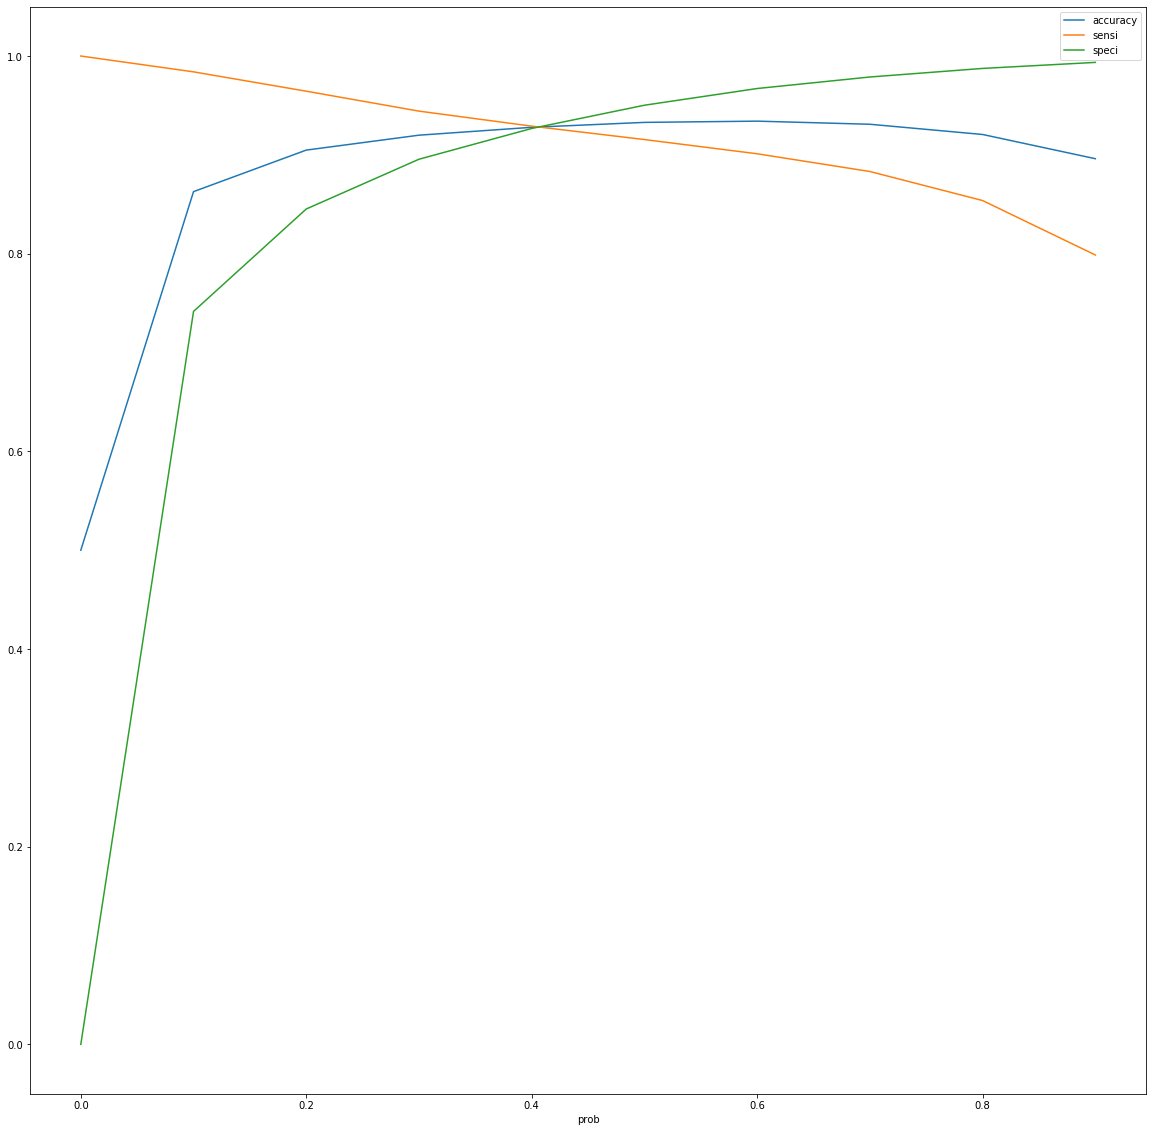

In [150]:
# Plotting same to find optimal cutoff 
cutoff_df.plot(x='prob',y=['accuracy','sensi','speci'])
plt.show()


#### 0.4 looks to be right probability threshold for this dataset

#### Hyper parameter tuning and Stratergic Kfold on train dataset

In [151]:
#Stratified Kfold and hyper parameter tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10]}
clf = GridSearchCV(estimator=logreg,cv=kf,param_grid=param,scoring='roc_auc',refit=True,n_jobs=-1,verbose=1)
clf.fit(X_train_smote[final_list], y_train_smote)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   39.6s finished


Best roc_auc: 0.9815, with best C: {'C': 10}


In [152]:
## from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_smote[final_list], y_train_smote):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train_smote[final_list].loc[train_index],X_train_smote[final_list].loc[test_index]
    ytr,yvl = y_train_smote.loc[train_index],y_train_smote.loc[test_index]
    
    #model - using the best 'C' value that we got in above step
    lr = LogisticRegression(C=10)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test_p[final_list])[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 5
ROC AUC score: 0.9332730378856396
2 of KFold 5
ROC AUC score: 0.9312255049743744
3 of KFold 5
ROC AUC score: 0.9330846146115969
4 of KFold 5
ROC AUC score: 0.9343156466686765
5 of KFold 5
ROC AUC score: 0.9325067832378655


In [153]:
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Cv [0.9332730378856396, 0.9312255049743744, 0.9330846146115969, 0.9343156466686765, 0.9325067832378655] 
Mean cv Score 0.9328811174756305


##### Evaluation on test data

In [154]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test_p[final_list])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.002971
1,0.211769
2,0.359481
3,0.015286
4,0.048919


In [155]:
y_test_df = pd.DataFrame(y_test)
y_test_df.columns=['Class']
y_test_df.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [156]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Conversion_Prob'})
# Let's see the head of y_pred_final
y_pred_final.head()

,Class,Conversion_Prob
0,0,0.002971
1,0,0.211769
2,0,0.359481
3,0,0.015286
4,0,0.048919


In [157]:
# Creating new column 'predicted' with 1 if Conversion_Prob>0.4 else 0
y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_pred_final.head()

,Class,Conversion_Prob,predicted
0,0,0.002971,0
1,0,0.211769,0
2,0,0.359481,0
3,0,0.015286,0
4,0,0.048919,0


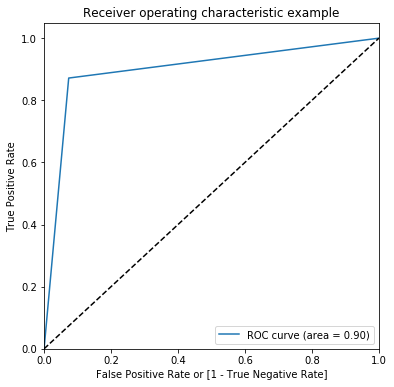

(array([0.        , 0.07357993, 1.        ]),
 array([0.        , 0.87162162, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [158]:
draw_roc(y_pred_final.Class, y_pred_final.predicted)

In [159]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted) roc_auc_score(yvl,lr.predict(xvl))
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Class, y_pred_final.predicted))

'0.90'

#### Metrics for logistic regression after applying SMOTE Technique on train dataset before modelling
- Avg. roc_auc_score on train data = 0.93
- roc_auc_score on test data  = 0.90 
    

##### SVM on SMOTE Dataset

In [389]:
clf = svm.SVC()
clf.fit(X_train_smote, y_train_smote)

SVC()

In [390]:
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
#pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_smote, y_train_smote):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train_smote.loc[train_index],X_train_smote.loc[test_index]
    ytr,yvl = y_train_smote.loc[train_index],y_train_smote.loc[test_index]
    
    #model
    clf = svm.SVC()
    clf.fit(xtr,ytr)
    score = roc_auc_score(yvl,clf.predict(xvl))  
    print('ROC AUC score:',score)
    cv_score.append(score)    
    #pred_test = clf.predict(X_test_p)[:,1]
    #pred_test_full +=pred_test
    i+=1

1 of KFold 3
ROC AUC score: 0.9836599336750076
2 of KFold 3
ROC AUC score: 0.9845191438046427
3 of KFold 3
ROC AUC score: 0.9843910159782937


In [391]:
#Mean of CV Score
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Cv [0.9836599336750076, 0.9845191438046427, 0.9843910159782937] 
Mean cv Score 0.984190031152648


In [392]:
y_pred = clf.predict(X_test_p)
confusion_matrix(y_test, y_pred)

array([[84099,  1196],
       [   30,   118]])

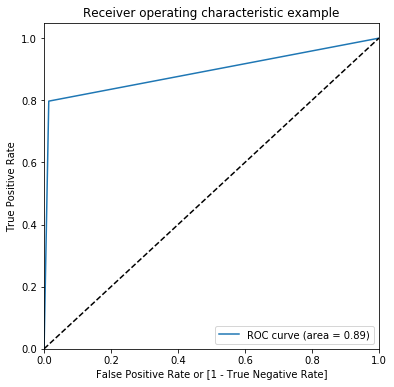

(array([0.        , 0.01402192, 1.        ]),
 array([0.       , 0.7972973, 1.       ]),
 array([2, 1, 0]))

In [393]:
draw_roc(np.array(y_test), y_pred)

In [394]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted) roc_auc_score(yvl,lr.predict(xvl))
"{:2.2f}".format(metrics.roc_auc_score(np.array(y_test), y_pred))

'0.89'

#### Metrics for SVM after applying SMOTE Technique on train dataset before modelling
- Avg. roc_auc_score on train data = 0.984
- roc_auc_score on test data  = 0.89 
- Clearly looks like model is overfitting on train data.

### Random Forest

In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier #import the package

param_grid_smote = {
    'min_samples_leaf': range(150, 450, 100),
    'min_samples_split': range(250, 451, 200), 
    'n_estimators': range(70, 200, 70),
    'max_depth': [10],
    #'max_features': [13, 15, 17]
}
# Create the model
rf_smote = RandomForestClassifier(oob_score = True, random_state = 0)


In [25]:
#perform cross validation
rf_grid_smote = GridSearchCV(rf_smote, param_grid_smote, scoring=scorer, refit='AUC', cv = folds, n_jobs = -1,verbose = 1)

In [26]:
#perform hyperparameter tuning
rf_grid_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 47.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_...
                                              oob_score=True, random_state=0,
                                              verbose=0, warm_star

In [33]:
# Cross-Validation Results
pd.set_option('display.max_columns', 500)
pd.DataFrame(rf_grid_smote.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,344.114243,8.890135,2.374291,0.534180,10,150,250,70,"{'max_depth': 10, 'min_samples_leaf': 150, 'mi...",0.999480,0.999566,0.999614,0.999523,0.999517,0.999540,0.000046,2,0.975731,0.974224,0.977892,0.976359,0.977163,0.976274,0.001258,2
1,575.132592,54.296155,4.178270,0.445388,10,150,250,140,"{'max_depth': 10, 'min_samples_leaf': 150, 'mi...",0.999528,0.999606,0.999631,0.999563,0.999532,0.999572,0.000041,1,0.977088,0.975631,0.977892,0.977238,0.977615,0.977093,0.000784,1
2,265.467016,19.389083,2.240053,0.270427,10,150,450,70,"{'max_depth': 10, 'min_samples_leaf': 150, 'mi...",0.999470,0.999502,0.999551,0.999480,0.999444,0.999489,0.000036,4,0.973545,0.974626,0.973847,0.975706,0.972993,0.974143,0.000943,4
3,478.944553,3.750470,3.850491,0.112930,10,150,450,140,"{'max_depth': 10, 'min_samples_leaf': 150, 'mi...",0.999488,0.999532,0.999573,0.999513,0.999481,0.999518,0.000033,3,0.975103,0.974701,0.974575,0.975706,0.973696,0.974756,0.000661,3
4,234.071550,2.291926,1.978496,0.031289,10,250,250,70,"{'max_depth': 10, 'min_samples_leaf': 250, 'mi...",0.999339,0.999407,0.999462,0.999373,0.999294,0.999375,0.000057,7,0.972817,0.971184,0.974249,0.974073,0.972214,0.972907,0.001150,7
5,468.797120,1.327342,3.925313,0.095121,10,250,250,140,"{'max_depth': 10, 'min_samples_leaf': 250, 'mi...",0.999356,0.999390,0.999450,0.999369,0.999335,0.999380,0.000039,5,0.972465,0.972189,0.974651,0.973043,0.972390,0.972947,0.000898,5
6,234.587794,2.445923,2.039324,0.126538,10,250,450,70,"{'max_depth': 10, 'min_samples_leaf': 250, 'mi...",0.999339,0.999407,0.999462,0.999373,0.999294,0.999375,0.000057,7,0.972817,0.971184,0.974249,0.974073,0.972214,0.972907,0.001150,7
7,469.165484,1.193965,4.012091,0.062874,10,250,450,140,"{'max_depth': 10, 'min_samples_leaf': 250, 'mi...",0.999356,0.999390,0.999450,0.999369,0.999335,0.999380,0.000039,5,0.972465,0.972189,0.974651,0.973043,0.972390,0.972947,0.000898,5
8,232.179462,2.525996,2.008070,0.049428,10,350,250,70,"{'max_depth': 10, 'min_samples_leaf': 350, 'mi...",0.999140,0.999209,0.999232,0.999156,0.999099,0.999167,0.000048,11,0.968169,0.967692,0.968722,0.969023,0.966712,0.968064,0.000816,11
9,463.380558,1.320253,3.953900,0.150739,10,350,250,140,"{'max_depth': 10, 'min_samples_leaf': 350, 'mi...",0.999135,0.999202,0.999303,0.999183,0.999140,0.999193,0.000061,9,0.967767,0.967139,0.970430,0.967340,0.967842,0.968104,0.001192,9


In [28]:
#print the optimum value of hyperparameters
print('We can get AUC of',rf_grid_smote.best_score_,'using',rf_grid_smote.best_params_)

We can get AUC of 0.9995721507247637 using {'max_depth': 10, 'min_samples_leaf': 150, 'min_samples_split': 250, 'n_estimators': 140}


In [29]:
# roc_auc
auc = roc_auc_score(y_test, rf_grid_smote.predict_proba(X_test_p)[:,1])
print(auc , "auc on Test data")

0.9744369699437406


In [30]:
# classification_report
class_rep = classification_report(y_test, rf_grid_smote.predict(X_test_p))
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.31      0.84      0.46       148

    accuracy                           1.00     85443
   macro avg       0.66      0.92      0.73     85443
weighted avg       1.00      1.00      1.00     85443



##### We see a remarkable increase in auc and recall in test data predictions for this model
- Avg. ROC_AUC Score on train data = 0.99
- ROC_AUC Score on test data=0.97

### XGBoost

In [31]:
#xgboost
#earlier we used 'colsample_bytree': 0.6, 'early_stopping_rounds': 10, 'gamma': 0, 'learning_rate': 0.2,
#'max_depth': 8, 'min_child_weight': 1,'n_estimators': 1000, 'nthread': -1, 'objective': 'binary:logistic',
#'reg_alpha': 0.01, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.9}

param_xgb_smote = {'n_estimators':[250],
 'max_depth':[10],
 'min_child_weight':[1],
 'subsample':[0.9],
 'colsample_bytree':[0.6],
 'objective': ['binary:logistic'],
 'nthread':[-1],
 'scale_pos_weight':[1],
 'learning_rate':[0.1,0.15],
 'seed':[0],
 'reg_alpha':[ 1e-2],
 'early_stopping_rounds':[10]
}

# Create the model
xgb_smote = XGBClassifier(nthread=-1,learning_rate =0.1)

#perform cross validation
xgb_grid_smote =GridSearchCV(xgb_smote, param_xgb_smote, scoring=scorer, refit='AUC', cv = folds, n_jobs = -1,verbose = 1)

In [32]:
xgb_grid_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 19.2min remaining: 12.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 22.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=-1, objective='binary:logist...
                         'early_stopping_rounds': [10],
                         'learning_rate': [0.1, 0.15], 'max_depth': [10],
                         'min_child_weight': [1], 'n_estimators': [250],
                         'nthread': [-1], 'objective': ['binary:logistic'],
                         'reg_alpha': [0.01], 'scale_pos_weight': [1],
                         'seed

In [33]:
# Cross-Validation Results
pd.set_option('display.max_columns', 500)
pd.DataFrame(xgb_grid_smote.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_early_stopping_rounds,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_nthread,param_objective,param_reg_alpha,param_scale_pos_weight,param_seed,param_subsample,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,1148.852120,3.571056,5.380181,0.830835,0.6,10,0.1,10,1,250,-1,binary:logistic,0.01,1,0,0.9,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999980,0.999995,0.999995,1.0,0.999989,0.999992,0.000007,2,1.0,1.0,0.999975,1.0,1.0,0.999995,0.00001,1
1,758.013737,365.450717,4.447730,1.272582,0.6,10,0.15,10,1,250,-1,binary:logistic,0.01,1,0,0.9,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999983,0.999997,0.999997,1.0,0.999989,0.999993,0.000006,1,1.0,1.0,0.999975,1.0,1.0,0.999995,0.00001,1


In [34]:
#print the optimum value of hyperparameters
print('We can get AUC of',xgb_grid_smote.best_score_,'using',xgb_grid_smote.best_params_)

We can get AUC of 0.9999929772203766 using {'colsample_bytree': 0.6, 'early_stopping_rounds': 10, 'learning_rate': 0.15, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 250, 'nthread': -1, 'objective': 'binary:logistic', 'reg_alpha': 0.01, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.9}


In [44]:
# roc_auc
auc = roc_auc_score(y_test, xgb_grid_smote.predict_proba(X_test_p.values)[:,1])
print(auc , "auc on Test data")

0.976449064692807 auc on Test data


In [45]:
# classification_report
class_rep = classification_report(y_test, xgb_grid_smote.predict(X_test_p.values))
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.81      0.84       148

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



- Avg. ROC_AUC Score on train data = 0.99
- ROC_AUC Score on test data=0.97

### Print the class distribution after applying ADASYN

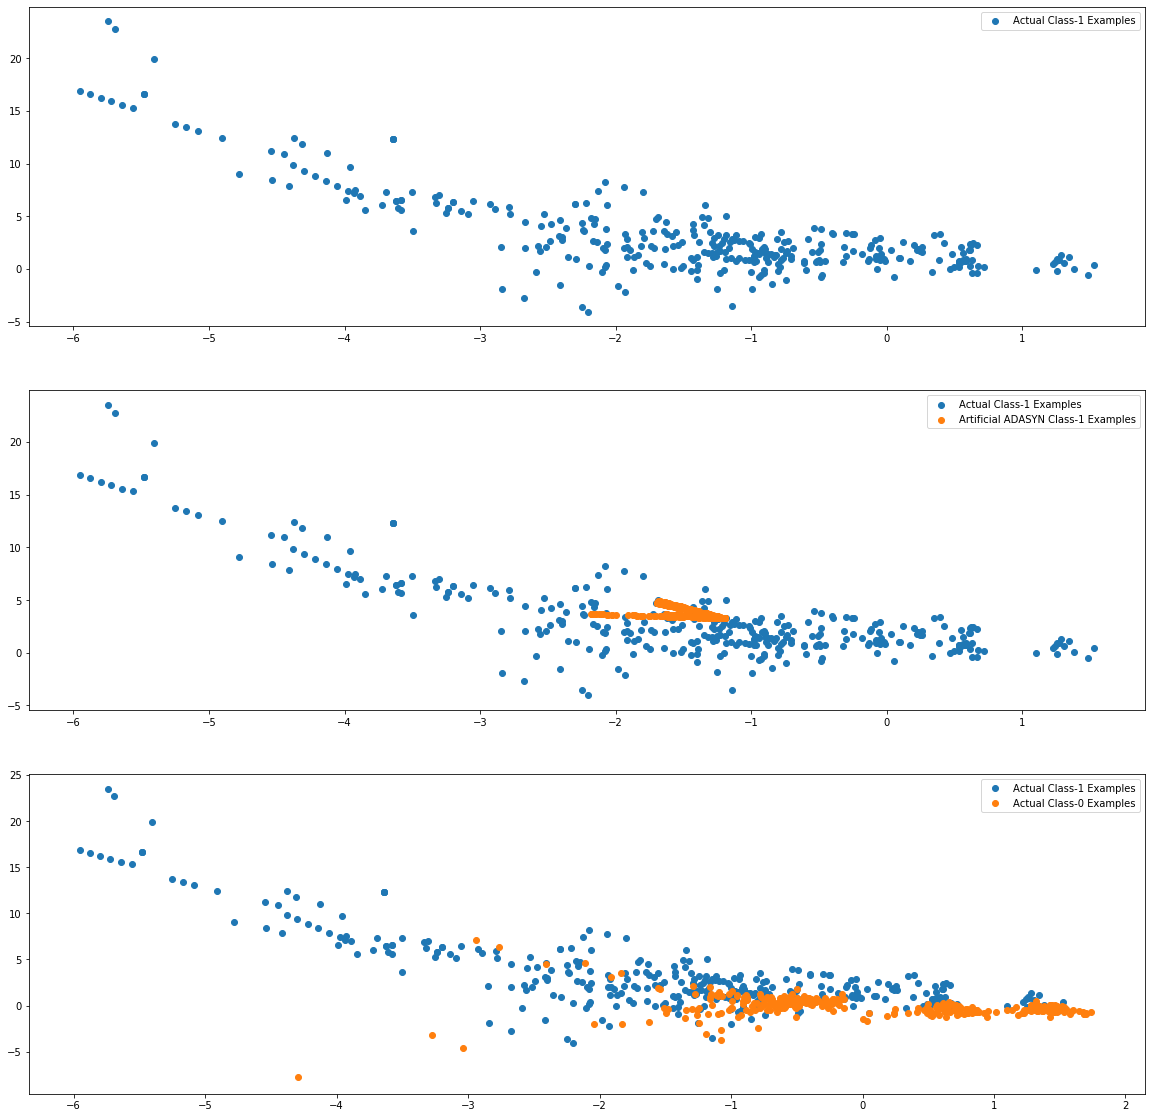

In [18]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_p, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train_p.shape[0]:]

X_train_1 = X_train_p.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_p.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# Converting train dataset to dataframe
X_train_adasyn=pd.DataFrame(X_train_adasyn)
X_train_adasyn.columns=X_train_p.columns
X_train_adasyn.head()

In [ ]:
y_train_adasyn=pd.DataFrame(y_train_adasyn)
y_train_adasyn.head()

### Logistic Regression on Adasyn Data

In [398]:
from sklearn import linear_model 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logm1 = sm.GLM(y_train_adasyn,(sm.add_constant(X_train_adasyn)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398055
Model:                            GLM   Df Residuals:                   398025
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jun 2020   Deviance:                          nan
Time:                        05:16:48   Pearson chi2:                 1.16e+17
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5785      0.017   -214.628      0.000      -3.611      -3.546
V1             0.9154      0.016     58.314      0.000       0.885       0.946
V2            -0.9447      0.017    -57.034      0.000      -0.977      -0.912
V3             0.0795      0.009      8.925      0.000       0.062       0.097
V4             2.6508      0.015    176.846      0.000       2.621       2.680
V5             0.2302      0.009     25.603      0.000       0.213       0.248
V6            -0.0139      0.009     -1.465      0.143      -0.032       0.005
V7            -0.4227      0.010    -42.295      0.000      -0.442      -0.403
V8            -1.1480      0.011   -102.584      0.000      -1.170      -1.126
V9            -1.0643      0.019    -56.543      0.000      -1.101      -1.027
V10           -2.6041      0.029    -89.461      0.000      -2.661      -2.547
V11            1.0304      0.011     96.704      0.000       1.010       1.051
V12           -1.4988      0.016    -95.647      0.000      -1.529      -1.468
V13           -0.2311      0.007    -33.779      0.000      -0.244      -0.218
V14           -1.7104      0.014   -121.233      0.000      -1.738      -1.683
V15           -0.0066      0.007     -0.973      0.331      -0.020       0.007
V16           -1.0132      0.013    -79.405      0.000      -1.038      -0.988
V17           -1.0810      0.016    -66.213      0.000      -1.113      -1.049
V18           -0.2897      0.010    -28.656      0.000      -0.310      -0.270
V19            0.2043      0.008     26.912      0.000       0.189       0.219
V20           -0.4566      0.012    -37.011      0.000      -0.481      -0.432
V21            0.4298      0.008     52.153      0.000       0.414       0.446
V22            0.3573      0.008     46.779      0.000       0.342       0.372
V23           -0.2566      0.005    -52.530      0.000      -0.266      -0.247
V24           -0.1500      0.008    -18.275      0.000      -0.166      -0.134
V25           -0.0005      0.008     -0.067      0.947      -0.016       0.015
V26           -0.2904      0.008    -35.220      0.000      -0.307      -0.274
V27           -0.2254      0.013    -17.052      0.000      -0.251      -0.199
V28            0.1970      0.009     21.193      0.000       0.179       0.215
Amount        -0.2122      0.008    -25.178      0.000      -0.229      -0.196
==============================================================================
"""

In [399]:
X=X_train_adasyn
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,V10,7.84
16,V17,7.06
1,V2,6.77
13,V14,6.18
15,V16,5.75
6,V7,4.82
17,V18,4.34
20,V21,4.28
4,V5,3.99
2,V3,3.72


In [400]:
#Dropping columns with high VIF or high p-value
final_list=list(X_train_adasyn.columns)
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V10')
logm2 = sm.GLM(y_train_adasyn,(sm.add_constant(X_train_adasyn[final_list])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398055
Model:                            GLM   Df Residuals:                   398026
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jun 2020   Deviance:                          inf
Time:                        05:17:22   Pearson chi2:                 4.50e+15
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7348      0.011   -255.210      0.000      -2.756      -2.714
V1             0.0187      0.009      2.184      0.029       0.002       0.036
V2            -0.0832      0.008     -9.990      0.000      -0.100      -0.067
V3            -0.2314      0.007    -32.548      0.000      -0.245      -0.217
V4             1.7711      0.009    201.432      0.000       1.754       1.788
V5             0.0449      0.008      5.752      0.000       0.030       0.060
V6            -0.2415      0.009    -27.846      0.000      -0.259      -0.225
V7            -0.0328      0.007     -4.834      0.000      -0.046      -0.019
V8            -0.4221      0.006    -74.022      0.000      -0.433      -0.411
V9            -0.0845      0.008    -10.452      0.000      -0.100      -0.069
V11            0.5502      0.007     81.013      0.000       0.537       0.564
V12           -0.6082      0.008    -76.138      0.000      -0.624      -0.593
V13           -0.3394      0.006    -52.319      0.000      -0.352      -0.327
V14           -1.1479      0.007   -155.179      0.000      -1.162      -1.133
V15            0.1199      0.006     19.324      0.000       0.108       0.132
V16           -0.3922      0.008    -51.474      0.000      -0.407      -0.377
V17            0.0592      0.006      9.451      0.000       0.047       0.071
V18            0.0606      0.007      8.111      0.000       0.046       0.075
V19           -0.1011      0.006    -16.995      0.000      -0.113      -0.089
V20            0.0697      0.007     10.633      0.000       0.057       0.083
V21            0.1683      0.006     26.387      0.000       0.156       0.181
V22            0.3008      0.007     43.211      0.000       0.287       0.314
V23           -0.1974      0.005    -43.763      0.000      -0.206      -0.189
V24           -0.1404      0.008    -18.273      0.000      -0.155      -0.125
V25            0.3650      0.007     54.158      0.000       0.352       0.378
V26           -0.3386      0.008    -44.258      0.000      -0.354      -0.324
V27            0.0776      0.008      9.674      0.000       0.062       0.093
V28            0.2120      0.008     28.088      0.000       0.197       0.227
Amount        -0.0872      0.008    -11.128      0.000      -0.103      -0.072
==============================================================================
"""

In [401]:
X=X_train_adasyn[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,V17,7.03
1,V2,6.75
14,V16,5.51
12,V14,5.18
6,V7,4.81
16,V18,4.30
19,V21,4.21
4,V5,3.92
2,V3,3.68
10,V12,3.51


In [402]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V17')
logm3 = sm.GLM(y_train_adasyn,(sm.add_constant(X_train_adasyn[final_list])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398055
Model:                            GLM   Df Residuals:                   398027
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jun 2020   Deviance:                          inf
Time:                        05:17:51   Pearson chi2:                 4.50e+15
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5696      0.009   -277.868      0.000      -2.588      -2.551
V1            -0.0173      0.008     -2.282      0.022      -0.032      -0.002
V2            -0.0198      0.008     -2.611      0.009      -0.035      -0.005
V3            -0.1947      0.006    -30.679      0.000      -0.207      -0.182
V4             1.6893      0.008    214.070      0.000       1.674       1.705
V5             0.1197      0.007     17.867      0.000       0.107       0.133
V6            -0.2085      0.007    -28.850      0.000      -0.223      -0.194
V7             0.0515      0.006      8.967      0.000       0.040       0.063
V8            -0.2894      0.004    -71.748      0.000      -0.297      -0.282
V9             0.0465      0.007      6.269      0.000       0.032       0.061
V11            0.4281      0.006     74.789      0.000       0.417       0.439
V12           -0.4093      0.007    -62.594      0.000      -0.422      -0.396
V13           -0.3905      0.006    -66.432      0.000      -0.402      -0.379
V14           -0.9544      0.005   -177.224      0.000      -0.965      -0.944
V15            0.1516      0.006     26.693      0.000       0.140       0.163
V16           -0.2314      0.007    -34.084      0.000      -0.245      -0.218
V18            0.1903      0.007     28.250      0.000       0.177       0.204
V19           -0.1256      0.006    -22.333      0.000      -0.137      -0.115
V20            0.0438      0.006      7.234      0.000       0.032       0.056
V21            0.1114      0.005     23.430      0.000       0.102       0.121
V22            0.2673      0.006     43.103      0.000       0.255       0.279
V23           -0.2070      0.004    -51.826      0.000      -0.215      -0.199
V24           -0.1053      0.007    -15.707      0.000      -0.118      -0.092
V25            0.3588      0.006     58.972      0.000       0.347       0.371
V26           -0.2412      0.007    -36.609      0.000      -0.254      -0.228
V27            0.0115      0.007      1.671      0.095      -0.002       0.025
V28            0.2061      0.007     28.589      0.000       0.192       0.220
Amount        -0.0606      0.007     -8.404      0.000      -0.075      -0.046
==============================================================================
"""

In [403]:
X=X_train_adasyn[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,V2,6.58
12,V14,5.16
14,V16,4.84
6,V7,4.74
18,V21,4.20
4,V5,3.71
2,V3,3.67
10,V12,3.45
15,V18,3.35
9,V11,3.34


In [404]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V2')
logm4 = sm.GLM(y_train_adasyn,(sm.add_constant(X_train_adasyn[final_list])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398055
Model:                            GLM   Df Residuals:                   398028
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jun 2020   Deviance:                          inf
Time:                        05:18:18   Pearson chi2:                 4.50e+15
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5708      0.009   -278.821      0.000      -2.589      -2.553
V1            -0.0128      0.007     -1.771      0.077      -0.027       0.001
V3            -0.1924      0.006    -30.892      0.000      -0.205      -0.180
V4             1.6900      0.008    214.177      0.000       1.675       1.705
V5             0.1248      0.006     19.812      0.000       0.112       0.137
V6            -0.2109      0.007    -29.578      0.000      -0.225      -0.197
V7             0.0528      0.006      9.281      0.000       0.042       0.064
V8            -0.2928      0.004    -75.838      0.000      -0.300      -0.285
V9             0.0502      0.007      6.824      0.000       0.036       0.065
V11            0.4270      0.006     74.631      0.000       0.416       0.438
V12           -0.4050      0.006    -62.645      0.000      -0.418      -0.392
V13           -0.3930      0.006    -67.602      0.000      -0.404      -0.382
V14           -0.9500      0.005   -179.643      0.000      -0.960      -0.940
V15            0.1516      0.006     26.701      0.000       0.140       0.163
V16           -0.2301      0.007    -33.896      0.000      -0.243      -0.217
V18            0.1906      0.007     28.321      0.000       0.177       0.204
V19           -0.1256      0.006    -22.346      0.000      -0.137      -0.115
V20            0.0455      0.006      7.639      0.000       0.034       0.057
V21            0.1118      0.005     23.517      0.000       0.102       0.121
V22            0.2666      0.006     43.004      0.000       0.254       0.279
V23           -0.2053      0.004    -51.865      0.000      -0.213      -0.197
V24           -0.1042      0.007    -15.560      0.000      -0.117      -0.091
V25            0.3572      0.006     59.096      0.000       0.345       0.369
V26           -0.2394      0.007    -36.481      0.000      -0.252      -0.227
V27            0.0104      0.007      1.515      0.130      -0.003       0.024
V28            0.2054      0.007     28.530      0.000       0.191       0.219
Amount        -0.0510      0.006     -8.286      0.000      -0.063      -0.039
==============================================================================
"""

In [405]:
X=X_train_adasyn[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,V14,5.15
13,V16,4.83
5,V7,4.42
17,V21,4.01
9,V12,3.45
8,V11,3.34
1,V3,3.32
14,V18,3.29
3,V5,3.05
6,V8,2.97


In [406]:
# Dropping columns with high P value 1 by 1 (Amount)
final_list.remove('V27')
logm5 = sm.GLM(y_train_adasyn,(sm.add_constant(X_train_adasyn[final_list])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398055
Model:                            GLM   Df Residuals:                   398029
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jun 2020   Deviance:                          inf
Time:                        05:18:42   Pearson chi2:                 4.50e+15
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6933      0.010   -263.113      0.000      -2.713      -2.673
V1             0.0471      0.008      5.995      0.000       0.032       0.062
V3            -0.2049      0.007    -30.561      0.000      -0.218      -0.192
V4             1.7503      0.009    204.059      0.000       1.733       1.767
V5             0.0916      0.007     13.070      0.000       0.078       0.105
V6            -0.2456      0.008    -30.716      0.000      -0.261      -0.230
V7            -0.0176      0.006     -2.808      0.005      -0.030      -0.005
V8            -0.4131      0.005    -86.960      0.000      -0.422      -0.404
V9            -0.0446      0.008     -5.659      0.000      -0.060      -0.029
V11            0.5328      0.006     84.185      0.000       0.520       0.545
V12           -0.5645      0.007    -76.475      0.000      -0.579      -0.550
V13           -0.3613      0.006    -57.942      0.000      -0.374      -0.349
V14           -1.1125      0.006   -177.666      0.000      -1.125      -1.100
V15            0.1282      0.006     21.232      0.000       0.116       0.140
V16           -0.3614      0.007    -48.741      0.000      -0.376      -0.347
V18            0.0877      0.007     11.871      0.000       0.073       0.102
V19           -0.0990      0.006    -16.750      0.000      -0.111      -0.087
V20            0.0811      0.006     13.023      0.000       0.069       0.093
V21            0.1448      0.006     25.800      0.000       0.134       0.156
V22            0.2946      0.007     44.164      0.000       0.282       0.308
V23           -0.1989      0.004    -46.239      0.000      -0.207      -0.190
V24           -0.1300      0.007    -17.876      0.000      -0.144      -0.116
V25            0.3587      0.006     55.429      0.000       0.346       0.371
V26           -0.3148      0.007    -43.505      0.000      -0.329      -0.301
V28            0.2234      0.008     29.651      0.000       0.209       0.238
Amount        -0.0475      0.007     -7.288      0.000      -0.060      -0.035
==============================================================================
"""

In [407]:
X=X_train_adasyn[final_list]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,V14,5.11
13,V16,4.81
5,V7,4.28
17,V21,4.01
9,V12,3.45
8,V11,3.33
1,V3,3.31
14,V18,3.27
3,V5,3.04
6,V8,2.95


In [408]:
# Finalizing this model as p-value and vif's look good now
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train_adasyn[final_list], y_train_adasyn)

LogisticRegression(C=1000000000.0)

##### Evaluation on train data to determine threshold

In [409]:
# Predicted probabilities
y_train_pred = logsk.predict_proba(X_train_adasyn[final_list])
# Converting y_pred to a dataframe which is an array
y_train_pred_df = pd.DataFrame(y_train_pred)
# Converting to column dataframe
y_train_pred_df_1 = y_train_pred_df.iloc[:,[1]]
# Let's see the head
y_train_pred_df_1.head()

,1
0,0.010945
1,0.385781
2,0.095619
3,0.010115
4,0.003847


In [410]:
y_train_pred_final = pd.concat([y_train_adasyn,y_train_pred_df_1],axis=1)
# Renaming the column 
y_train_pred_final= y_train_pred_final.rename(columns={0:'Class', 1 : 'Conversion_Prob'})
# Rearranging the columns
y_train_pred_final 

,Class,Conversion_Prob
0,0,0.010945
1,0,0.385781
2,0,0.095619
3,0,0.010115
4,0,0.003847
...,...,...
398050,1,0.991499
398051,1,0.999079
398052,1,0.998890
398053,1,0.989801


In [411]:
# Creating a matrix by considering different cutoffs.
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    y_train_pred_final[i]=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>i else 0)
    
# Let's see the head of y_pred_final
y_train_pred_final.head()

,Class,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.010945,1,0,0,0,0,0,0,0,0,0
1,0,0.385781,1,1,1,1,0,0,0,0,0,0
2,0,0.095619,1,0,0,0,0,0,0,0,0,0
3,0,0.010115,1,0,0,0,0,0,0,0,0,0
4,0,0.003847,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500019  1.000000  0.000000
0.1   0.1  0.809479  0.992253  0.626691
0.2   0.2  0.867365  0.976070  0.758652
0.3   0.3  0.885239  0.942387  0.828088
0.4   0.4  0.894248  0.909192  0.879304
0.5   0.5  0.896208  0.879041  0.913376
0.6   0.6  0.889294  0.842254  0.936338
0.7   0.7  0.872995  0.791655  0.954341
0.8   0.8  0.848388  0.727430  0.969355
0.9   0.9  0.814305  0.645062  0.983559


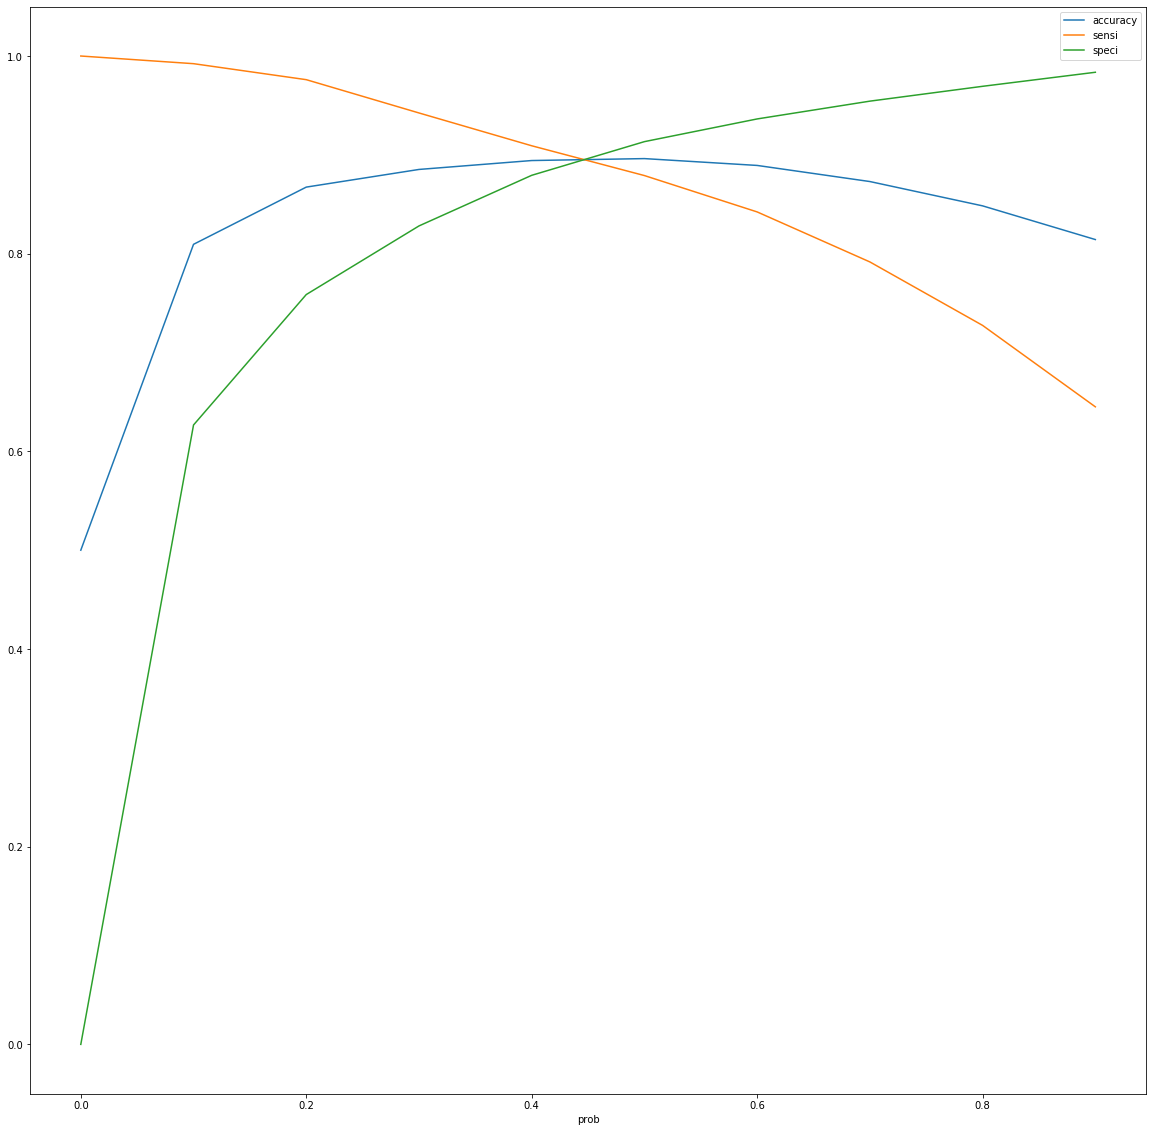

In [412]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

#Calculating accuracy , specificity , sensitivity for different probabilities
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Plotting same to find optimal cutoff 
cutoff_df.plot(x='prob',y=['accuracy','sensi','speci'])
plt.show()


#### 0.45 looks to be right probability for this dataset

In [413]:
#Stratified Kfold and hyper parameter tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10]}
clf = GridSearchCV(estimator=logreg,cv=kf,param_grid=param,scoring='roc_auc',refit=True,n_jobs=-1,verbose=1)
clf.fit(X_train_adasyn[final_list], y_train_adasyn)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   29.8s finished


Best roc_auc: 0.9651, with best C: {'C': 0.003}


In [414]:
from sklearn.metrics import roc_auc_score
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_adasyn[final_list], y_train_adasyn):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train_adasyn[final_list].loc[train_index],X_train_adasyn[final_list].loc[test_index]
    ytr,yvl = y_train_adasyn.loc[train_index],y_train_adasyn.loc[test_index]
    
    #model - using the best 'C' value that we got in above step
    lr = LogisticRegression(C=0.003)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test_p[final_list])[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 5
ROC AUC score: 0.8955050871813145
2 of KFold 5
ROC AUC score: 0.8959823750212805
3 of KFold 5
ROC AUC score: 0.8947765853496058
4 of KFold 5
ROC AUC score: 0.8966480795085005
5 of KFold 5
ROC AUC score: 0.8968742186779278


In [415]:
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Cv [0.8955050871813145, 0.8959823750212805, 0.8947765853496058, 0.8966480795085005, 0.8968742186779278] 
Mean cv Score 0.8959572691477259


##### Evaluation on test data

In [416]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test_p[final_list])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.003917
1,0.196833
2,0.345316
3,0.088755
4,0.072368


In [417]:
y_test_df = pd.DataFrame(y_test)
y_test_df.columns=['Class']
y_test_df.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [418]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Conversion_Prob'})
# Let's see the head of y_pred_final
y_pred_final.head()

,Class,Conversion_Prob
0,0,0.003917
1,0,0.196833
2,0,0.345316
3,0,0.088755
4,0,0.072368


In [419]:
# Creating new column 'predicted' with 1 if Conversion_Prob>0.4 else 0
y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.45 else 0)
# Let's see the head
y_pred_final.head()

,Class,Conversion_Prob,predicted
0,0,0.003917,0
1,0,0.196833,0
2,0,0.345316,0
3,0,0.088755,0
4,0,0.072368,0


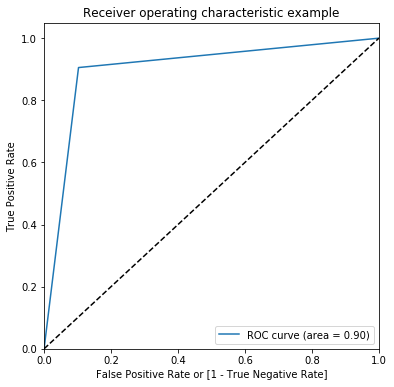

(array([0.        , 0.10288997, 1.        ]),
 array([0.        , 0.90540541, 1.        ]),
 array([2, 1, 0]))

In [420]:
draw_roc(y_pred_final.Class, y_pred_final.predicted)

In [421]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted) roc_auc_score(yvl,lr.predict(xvl))
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Class, y_pred_final.predicted))

'0.90'

#### Metrics for Logistic regression on ADASYN DATA
    Avg ROC_AUC score on train data =0.895
        ROC_AUC score on test data  =0.90

### SVM on ADASYN

### commenting this cell (Hyper parameter tuning) as its taking a lot of time to execute and is it not suitable for real time.
from sklearn.model_selection import GridSearchCV
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
params = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001]}
clf = GridSearchCV(svm.SVC(),cv=kf,param_grid=params,scoring='roc_auc',refit=True,n_jobs=-1,verbose=1)
clf.fit(X_train_adasyn, y_train_adasyn)
print('Best roc_auc: {:.4}, with best estimator: {}'.format(clf.best_score_, clf.best_estimator_))

In [422]:
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
#pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_adasyn, y_train_adasyn):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train_adasyn.loc[train_index],X_train_adasyn.loc[test_index]
    ytr,yvl = y_train_adasyn.loc[train_index],y_train_adasyn.loc[test_index]
    
    #model
    clf = svm.SVC()
    clf.fit(xtr,ytr)
    score = roc_auc_score(yvl,clf.predict(xvl))  
    print('ROC AUC score:',score)
    cv_score.append(score)    
    #pred_test = clf.predict(X_test_p)[:,1]
    #pred_test_full +=pred_test
    i+=1

1 of KFold 3
ROC AUC score: 0.9926590332193653
2 of KFold 3
ROC AUC score: 0.9925836633417379
3 of KFold 3
ROC AUC score: 0.9927344076410768


In [423]:
#Mean of CV Score
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Cv [0.9926590332193653, 0.9925836633417379, 0.9927344076410768] 
Mean cv Score 0.9926590347340599


In [424]:
y_pred = clf.predict(X_test_p)
confusion_matrix(y_test, y_pred)

array([[84024,  1271],
       [   47,   101]])

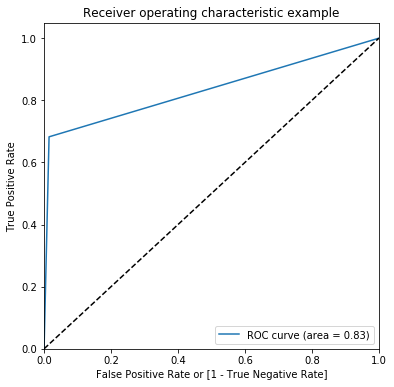

(array([0.        , 0.01490123, 1.        ]),
 array([0.        , 0.68243243, 1.        ]),
 array([2, 1, 0]))

In [425]:
draw_roc(np.array(y_test), y_pred)

In [426]:
"{:2.3f}".format(metrics.roc_auc_score(y_test, y_pred))

'0.834'

#### Metrics for SVM on ADASYN DATA
    Avg ROC_AUC score on train data =0.99
        ROC_AUC score on test data  =0.83
#### Clearly SVM model is overfitting on train data.

### Random Forest

In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier #import the package

param_grid_ada = {
    'min_samples_leaf': [100,150],
    'min_samples_split': [150,200], 
    'n_estimators': [145, 150],
    'max_depth': [10]
}
# Create the model
rf_ada = RandomForestClassifier(oob_score = True, random_state = 0)

In [25]:
#perform cross validation
rf_grid_ada = GridSearchCV(rf_ada, param_grid_ada, scoring=scorer, refit='AUC', cv = folds, n_jobs = -1,verbose = 1)

In [26]:
rf_grid_ada.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 58.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, rando

In [27]:
# Cross-Validation Results
pd.set_option('display.max_columns', 500)
pd.DataFrame(rf_grid_ada.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,924.147057,55.419047,8.810147,2.092801,10,100,150,145,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999550,0.999615,0.999665,0.999539,0.999491,0.999572,0.000061,1,0.998694,0.998719,0.998267,0.998091,0.998317,0.998417,0.000248,1
1,921.060919,103.726991,8.960602,1.379958,10,100,150,150,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999552,0.999611,0.999661,0.999536,0.999490,0.999570,0.000060,3,0.998593,0.998643,0.998141,0.998091,0.998267,0.998347,0.000229,5
2,818.218647,28.961251,5.225329,2.220583,10,100,200,145,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999550,0.999615,0.999665,0.999539,0.999491,0.999572,0.000061,1,0.998694,0.998719,0.998267,0.998091,0.998317,0.998417,0.000248,1
3,725.928738,48.667486,5.551450,1.507989,10,100,200,150,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999552,0.999611,0.999661,0.999536,0.999490,0.999570,0.000060,3,0.998593,0.998643,0.998141,0.998091,0.998267,0.998347,0.000229,5
4,611.852669,63.605107,5.108456,0.681769,10,150,150,145,"{'max_depth': 10, 'min_samples_leaf': 150, 'mi...",0.999389,0.999529,0.999611,0.999460,0.999444,0.999486,0.000076,5,0.998091,0.998870,0.998593,0.997915,0.998267,0.998347,0.000344,5
5,487.293380,6.444042,4.187546,0.247262,10,150,150,150,"{'max_depth': 10, 'min_samples_leaf': 150, 'mi...",0.999381,0.999529,0.999604,0.999451,0.999437,0.999480,0.000078,7,0.998091,0.998870,0.998643,0.997990,0.998267,0.998372,0.000334,3
6,476.497233,12.333835,4.124716,0.248033,10,150,200,145,"{'max_depth': 10, 'min_samples_leaf': 150, 'mi...",0.999389,0.999529,0.999611,0.999460,0.999444,0.999486,0.000076,5,0.998091,0.998870,0.998593,0.997915,0.998267,0.998347,0.000344,5
7,487.941824,3.310232,2.933716,0.670454,10,150,200,150,"{'max_depth': 10, 'min_samples_leaf': 150, 'mi...",0.999381,0.999529,0.999604,0.999451,0.999437,0.999480,0.000078,7,0.998091,0.998870,0.998643,0.997990,0.998267,0.998372,0.000334,3


In [28]:
#print the optimum value of hyperparameters
print('We can get AUC of',rf_grid_ada.best_score_,'using',rf_grid_ada.best_params_)

We can get AUC of 0.9995719153729932 using {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 150, 'n_estimators': 145}


In [29]:
# roc_auc
auc = roc_auc_score(y_test, rf_grid_ada.predict_proba(X_test_p)[:,1])
print(auc , "auc on Test data")

0.9739426600526312 auc on Test data


In [30]:
# classification_report
class_rep = classification_report(y_test, rf_grid_ada.predict(X_test_p))
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.86      0.20       148

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443



- Avg. ROC_AUC Score on train data = 0.99
- ROC_AUC Score on test data=0.974

### XGBoost

In [46]:
#xgboost

#earlier we used 'colsample_bytree': 0.6, 'early_stopping_rounds': 10, 'gamma': 0, 'learning_rate': 0.2,
#'max_depth': 8, 'min_child_weight': 1,'n_estimators': 1000, 'nthread': -1, 'objective': 'binary:logistic',
#'reg_alpha': 0.01, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.9}

param_xgb_ada = {'n_estimators':[250, 400],
 'max_depth':[10],
 'min_child_weight':[1],
 'subsample':[0.9],
 'colsample_bytree':[0.6],
 'objective': ['binary:logistic'],
 'nthread':[-1],
 'scale_pos_weight':[1],
 'learning_rate':[0.15],
 'seed':[0],
 'reg_alpha':[ 1e-2],
 'early_stopping_rounds':[10]
}

# Create the model
xgb_ada = XGBClassifier(nthread=-1,learning_rate =0.1)

#perform cross validation
xgb_grid_ada = GridSearchCV(xgb_ada, param_xgb_ada, scoring=scorer, refit='AUC', cv = folds, n_jobs = -1,verbose = 1)

In [47]:
xgb_grid_ada.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 16.2min remaining: 10.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 20.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=-1, objective='binary:logist...
                         'early_stopping_rounds': [10], 'learning_rate': [0.15],
                         'max_depth': [10], 'min_child_weight': [1],
                         'n_estimators': [250, 400], 'nthread': [-1],
                         'objective': ['binary:logistic'], 'reg_alpha': [0.01],
                         'scale_pos_weight': [1], 'seed': [0],
                 

In [48]:
# Cross-Validation Results
pd.set_option('display.max_columns', 500)
pd.DataFrame(xgb_grid_ada.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_early_stopping_rounds,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_nthread,param_objective,param_reg_alpha,param_scale_pos_weight,param_seed,param_subsample,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,793.885567,7.073582,5.662562,0.275714,0.6,10,0.15,10,1,250,-1,binary:logistic,0.01,1,0,0.9,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999980,1.0,0.999995,1.0,0.999972,0.999989,0.000011,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,747.358957,264.558533,5.319305,1.043503,0.6,10,0.15,10,1,400,-1,binary:logistic,0.01,1,0,0.9,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999984,1.0,0.999996,1.0,0.999972,0.999990,0.000011,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [49]:
#print the optimum value of hyperparameters
print('We can get AUC of',xgb_grid_ada.best_score_,'using',xgb_grid_ada.best_params_)

We can get AUC of 0.9999903348600219 using {'colsample_bytree': 0.6, 'early_stopping_rounds': 10, 'learning_rate': 0.15, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 400, 'nthread': -1, 'objective': 'binary:logistic', 'reg_alpha': 0.01, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.9}


In [50]:
# roc_auc
auc = roc_auc_score(y_test, xgb_grid_ada.predict_proba(X_test_p.values)[:,1])
print(auc , "auc on Test data")

0.9771762705903042 auc on Test data


In [51]:
# classification_report
class_rep = classification_report(y_test, xgb_grid_ada.predict(X_test_p.values))
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.81      0.84       148

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [163]:
# Experimenting more

param_xgb_ada_m = {'n_estimators':[400],
 'max_depth':[8,10,12],
 'min_child_weight':[1],
 'subsample':[0.7,0.9],
 'colsample_bytree':[0.6],
 'objective': ['binary:logistic'],
 'nthread':[-1],
 'scale_pos_weight':[1],
 'learning_rate':[0.15,0.18],
 'seed':[0],
 'reg_alpha':[ 1e-2,0.05],
 'tree_method':['hist'],
 #'predictor':['gpu_predictor'],
 'early_stopping_rounds':[10]
}

# Create the model
xgb_ada_m = XGBClassifier(nthread=-1,learning_rate =0.1)

#perform cross validation
xgb_grid_ada_m =GridSearchCV(xgb_ada_m, param_xgb_ada_m, scoring=scorer, refit='AUC', cv = folds, n_jobs = -1,verbose = 1)

In [164]:
xgb_grid_ada_m.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 30.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=-1, objective='binary:logist...
                         'max_depth': [8, 10, 12], 'min_child_weight': [1],
                         'n_estimators': [400], 'nthread': [-1],
                         'objective': ['binary:logistic'],
                         'reg_alpha': [0.01, 0.05], 'scale_pos_weight': [1],
                         'seed': [0], 'subsample': [0.7, 0.9],
                         'tree_method': 

In [165]:
# Cross-Validation Results
pd.set_option('display.max_columns', 500)
pd.DataFrame(xgb_grid_ada_m.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_early_stopping_rounds,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_nthread,param_objective,param_reg_alpha,param_scale_pos_weight,param_seed,param_subsample,param_tree_method,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,131.323530,0.964296,10.522607,0.314118,0.6,10,0.15,8,1,400,-1,binary:logistic,0.01,1,0,0.7,hist,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999993,0.999994,0.999996,0.999999,0.999967,0.999990,0.000012,15,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,140.314471,5.794853,9.370964,0.889639,0.6,10,0.15,8,1,400,-1,binary:logistic,0.01,1,0,0.9,hist,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999993,0.999991,0.999994,1.000000,0.999975,0.999990,0.000008,13,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,124.005654,0.724134,8.335684,0.151649,0.6,10,0.15,8,1,400,-1,binary:logistic,0.05,1,0,0.7,hist,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999983,0.999997,0.999989,0.999999,0.999976,0.999989,0.000008,22,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,121.286298,6.192936,8.262484,0.078064,0.6,10,0.15,8,1,400,-1,binary:logistic,0.05,1,0,0.9,hist,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999989,0.999993,0.999989,1.000000,0.999971,0.999988,0.000010,24,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,109.262042,3.702452,8.263505,0.167369,0.6,10,0.15,10,1,400,-1,binary:logistic,0.01,1,0,0.7,hist,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999988,0.999999,0.999993,1.000000,0.999975,0.999991,0.000009,9,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,109.311518,0.364617,8.130471,0.122900,0.6,10,0.15,10,1,400,-1,binary:logistic,0.01,1,0,0.9,hist,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999993,0.999998,0.999992,1.000000,0.999976,0.999992,0.000009,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
6,100.645922,0.694188,8.043781,0.017682,0.6,10,0.15,10,1,400,-1,binary:logistic,0.05,1,0,0.7,hist,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999995,0.999996,0.999990,1.000000,0.999974,0.999991,0.000009,10,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
7,109.754552,0.578860,8.862412,0.167465,0.6,10,0.15,10,1,400,-1,binary:logistic,0.05,1,0,0.9,hist,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999991,1.000000,0.999985,1.000000,0.999974,0.999990,0.000010,19,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
8,111.807183,2.141639,8.637280,0.447019,0.6,10,0.15,12,1,400,-1,binary:logistic,0.01,1,0,0.7,hist,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999987,0.999998,0.999993,1.000000,0.999977,0.999991,0.000008,11,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
9,119.248161,2.494226,8.340629,0.192602,0.6,10,0.15,12,1,400,-1,binary:logistic,0.01,1,0,0.9,hist,"{'colsample_bytree': 0.6, 'early_stopping_roun...",0.999985,0.999997,0.999989,1.000000,0.999974,0.999989,0.000009,20,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [166]:
#print the optimum value of hyperparameters
print('We can get AUC of',xgb_grid_ada_m.best_score_,'using',xgb_grid_ada_m.best_params_)

We can get AUC of 0.9999942773576003 using {'colsample_bytree': 0.6, 'early_stopping_rounds': 10, 'learning_rate': 0.18, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 400, 'nthread': -1, 'objective': 'binary:logistic', 'reg_alpha': 0.01, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.7, 'tree_method': 'hist'}


In [167]:
# roc_auc
auc = roc_auc_score(y_test, xgb_grid_ada_m.predict_proba(X_test_p.values)[:,1])
print(auc , "auc on Test data")

0.9740538401699664 auc on Test data


In [168]:
# classification_report
class_rep = classification_report(y_test, xgb_grid_ada_m.predict(X_test_p.values))
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.80      0.82       148

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### We will finally use adasyn with XGBoost without hist parameter

In [120]:
# perform the best oversampling method on X_train & y_train
#{'colsample_bytree': 0.6, 'early_stopping_rounds': 10, 'learning_rate': 0.15, 'max_depth': 10,
# 'min_child_weight': 1, 'n_estimators': 400,'nthread': -1, 'objective': 'binary:logistic', 
# 'reg_alpha': 0.01, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.9}


#initialise the model with optimum hyperparameters
clf_final =  XGBClassifier(colsample_bytree= 0.6,early_stopping_rounds= 10,learning_rate= 0.15, max_depth= 10, min_child_weight= 1,
                     n_estimators= 400, nthread= -1, objective= 'binary:logistic', reg_alpha= 0.01, scale_pos_weight= 1, 
                     seed= 0, subsample= 0.9) 
clf_final.fit(X_train_adasyn, y_train_adasyn) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=10, gamma=0, learning_rate=0.15,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
              n_estimators=400, n_jobs=1, nthread=-1,
              objective='binary:logistic', random_state=0, reg_alpha=0.01,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
              subsample=0.9, verbosity=1)

In [20]:
# roc_auc
auc = roc_auc_score(y_test, clf_final.predict_proba(X_test_p.values)[:,1])
print(auc) #--> #print the evaluation score on the X_test by choosing the best evaluation metric

0.9771762705903042


In [21]:
# classification_report
class_rep = classification_report(y_test, clf_final.predict(X_test_p.values))
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.81      0.84       148

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



### Print the important features of the best model to understand the dataset

Top var = 4
2nd Top var = 10
3rd Top var = 14


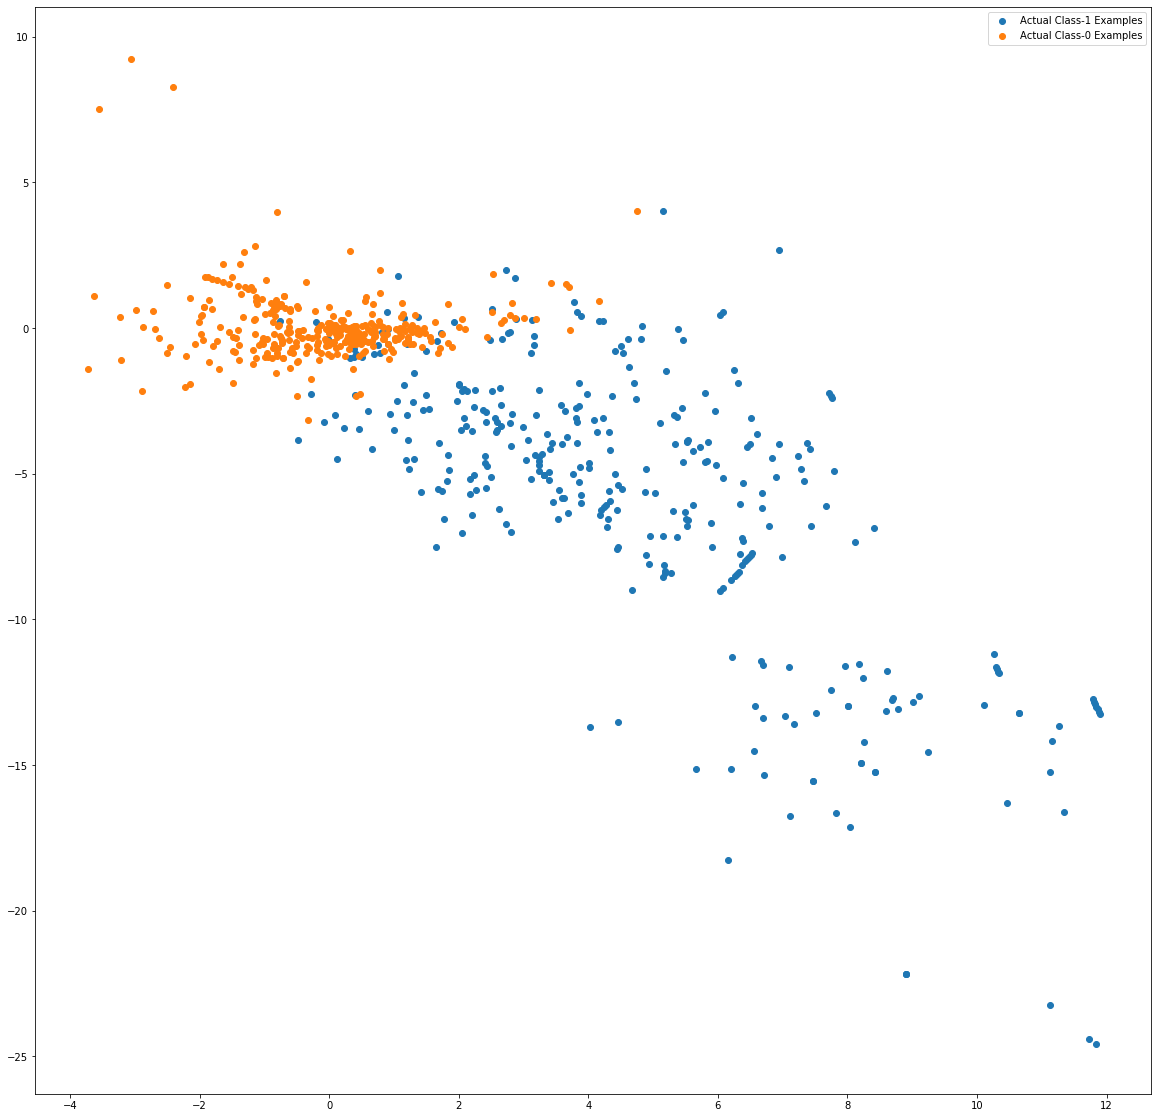

In [22]:
var_imp = []
for i in clf_final.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_final.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_final.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Let's check the different thresholds and plot a graph

In [23]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [24]:
print('Train auc =', roc_auc_score(y_test, clf_final.predict_proba(X_test_p.values)[:,1]))
fpr, tpr, thresholds = roc_curve(y_test, clf_final.predict_proba(X_test_p.values)[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9771762705903042
0.0004345379


In [25]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

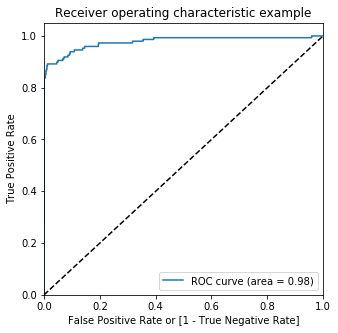

In [32]:
draw_roc(y_test, clf_final.predict_proba(X_test_p.values)[:,1])

 ### Finding Optimal Cutoff Point

In [66]:
kk = list(clf_final.predict_proba(X_test_p.values)[:,1])
numbers = [float(x)/10 for x in range(10)]
y_pred_final = pd.DataFrame(columns = numbers)
for i in numbers:
    k=i
    y_pred_final[i]=  np.array([1 if j >= i else 0 for j in kk ]) 
    #clf_final.predict_proba(X_test_p.values)[:,1].map(lambda x: 1 if x > i else 0)
y_pred_final.head()


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [68]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test, y_pred_final[i].values)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,precision]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.001732  1.000000  0.000000  0.001732
0.1   0.1  0.999052  0.837838  0.999332  0.685083
0.2   0.2  0.999263  0.824324  0.999566  0.767296
0.3   0.3  0.999391  0.824324  0.999695  0.824324
0.4   0.4  0.999403  0.817568  0.999719  0.834483
0.5   0.5  0.999462  0.810811  0.999789  0.869565
0.6   0.6  0.999450  0.797297  0.999801  0.874074
0.7   0.7  0.999450  0.783784  0.999824  0.885496
0.8   0.8  0.999462  0.783784  0.999836  0.892308
0.9   0.9  0.999485  0.763514  0.999894  0.926230


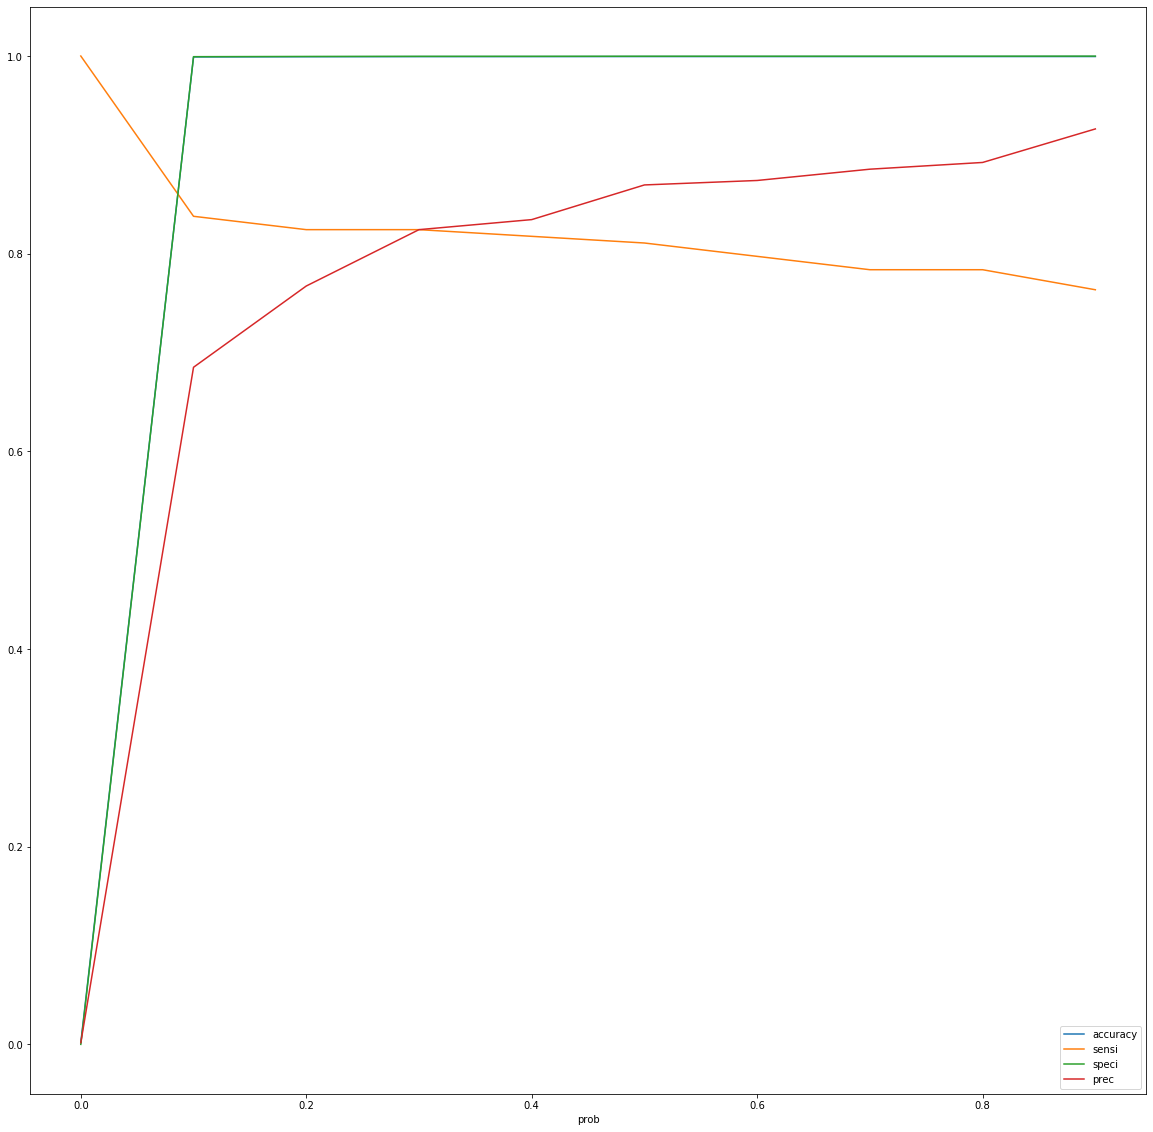

In [69]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','prec'])
plt.show()

In [78]:
## We can choose 0.3 as threshold as all metrics are above 80%

## checking the precision and recall scores
print(classification_report(y_test,y_pred_final[0.3]))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.82      0.82       148

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### This seems a pretty good model with 97.7% AUC on test data. 82% of recall, precision and F1-score

## Summary:
We have tried out following models and sampling technique combinations:
### 1.Imbalanced Data:
        1.Logistic Regression
        2.SVM
        3.KNN - Commented the code as it was taking long time to execute and would not be ideal for real time.
        However appropriate k=3 and auc_roc score was coming up as 0.87 for test data when we executed 1st time.
        4.Random Forest
        5.XGBoost
        Best model on imbalanced data is: XGBoost (depicted top variables , important features and metrics)
### 2.Balanced Data:
#### 1.After applying SMOTE:
            1.Logistic Regression
            2.SVM - Did not further do hyper parameter tuning on C,gamma as it was taking huge time to complete and model results did look satisfactory.
            3.Random Forest
            4.XGBoost
#### 2.After applying ADASYN:
            1.Logistic Regression
            2.SVM - Commented hyperparameter tuning on C,gamma as it was taking huge time to complete.However Model results clearly looked like it was overfitting on train data.
            3.Random Forest
            4.XGBoost
        Best model on Balanced Data is: XGBoost applied on Balanced data after applying ADASYN sampling technique (depicted top variables , important features and metrics)
        
#### We have not applied following sampling techniques because:
            1.Undersampling techniques as it would not make sense to loose out on data which is expensive to get in 1st place.
            2.Oversampling technique as it would exagerate the same class-1 points and models built would not be very optimal as they are not learning on few other possible scenarios which are generated by synthetic data create by SMOTE & ADASYN.

## Conclusion:
### Best Model when compared to all the above combinations tried is:
    XGBoost applied on Balanced data after applying ADASYN sampling technique with following metrics:
    - AUC score -  97.7
    - 82% of recall , precision and F1-Score.
    - V4,V10,V14 look as Top important variables (Not business intutive as these variables are result of PCA transformation and cannot be tied back to the actuat business parameters)